In [2]:
%matplotlib inline 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import sqlite3
import os
from IPython.display import display,Markdown

In [3]:
api_key= os.environ.get("GOOGLE_API_KEY")
llm=ChatGoogleGenerativeAI(model="gemini-2.5-flash", temperature=0.6)

In [4]:
conn=sqlite3.connect("C:\\Users\\EfrenMariscal\\Documents\\data scientific\\kaggle\\football\\sports_league.sqlite")

In [5]:
print(pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';",conn))

        name
0    matches
1    players
2      teams
3    leagues
4    coaches
5   referees
6   stadiums
7  standings
8     scores
9    seasons


### ANALYSING THE LENGTH OF THE DATASETS

In [6]:
print("Matches:",pd.read_sql("SELECT COUNT(*) FROM matches;",conn))
print()
print("Players:",pd.read_sql("SELECT COUNT(*) FROM players;",conn))
print()
print("Teams:",pd.read_sql("SELECT COUNT(*) FROM teams;",conn))
print()
print("Leagues:",pd.read_sql("SELECT COUNT(*) FROM leagues;",conn))
print()
print("Coaches:",pd.read_sql("SELECT COUNT(*) FROM coaches;",conn))

Matches:    COUNT(*)
0      1752

Players:    COUNT(*)
0      3150

Teams:    COUNT(*)
0        96

Leagues:    COUNT(*)
0         5

Coaches:    COUNT(*)
0        96


In [7]:
print("Referees:",pd.read_sql("SELECT COUNT(*) FROM referees;",conn))
print()
print("stadiums:",pd.read_sql("SELECT COUNT(*) FROM stadiums;",conn))
print()
print("standings:",pd.read_sql("SELECT COUNT(*) FROM standings;",conn))
print()
print("Scores:",pd.read_sql("SELECT COUNT(*) FROM scores;",conn))
print()
print("Seasons:",pd.read_sql("SELECT COUNT(*) FROM seasons;",conn))

Referees:    COUNT(*)
0       132

stadiums:    COUNT(*)
0        94

standings:    COUNT(*)
0        96

Scores:    COUNT(*)
0      1752

Seasons:    COUNT(*)
0         5



**It is possible to import all the data from the tables without any filter because the length of these tables is not long.**

In [8]:
df_leagues=pd.read_sql("SELECT * FROM leagues;",conn)
df_coaches=pd.read_sql("SELECT * FROM coaches;",conn)
df_referee=pd.read_sql("SELECT * FROM referees;",conn)
df_stadiums=pd.read_sql("SELECT * FROM stadiums;",conn)
df_standings=pd.read_sql("SELECT * FROM standings;",conn)
df_scores=pd.read_sql("SELECT * FROM scores;",conn)
df_matches=pd.read_sql("SELECT * FROM matches;",conn)
df_seasons=pd.read_sql("SELECT * FROM seasons;",conn)
df_teams=pd.read_sql("SELECT * FROM teams;",conn)
df_players=pd.read_sql("SELECT * FROM players;",conn)

In [9]:
df_leagues

league_id            name  country  country_id  \
0          2         Serie A    Italy           2   
1          3         La Liga    Spain           3   
2          4      Bundesliga  Germany           4   
3          5         Ligue 1   France           5   
4          1  Premier League  England           1   

                                   icon_url  cl_spot  uel_spot  \
0   https://crests.football-data.org/SA.png        4         5   
1   https://crests.football-data.org/PD.png        4         5   
2  https://crests.football-data.org/BL1.png        4         5   
3  https://crests.football-data.org/FL1.png        3         4   
4   https://crests.football-data.org/PL.png        4         6   

   relegation_spot  
0               18  
1               18  
2               16  
3               17  
4               18

In [10]:
df_coaches

coach_id                 name  team_id  nationality
0         34                  N/A      354         None
1         35                  N/A      356         None
2         36                  N/A      389         None
3         37                  N/A      397         None
4         38                  N/A      402         None
..       ...                  ...      ...          ...
91        28         Erik ten Hag       66  Netherlands
92        29           Eddie Howe       67      England
93        30     Ange Postecoglou       73       Greece
94        32      Vincent Kompany      328      Belgium
95        33  Nuno Espirito Santo      351     Portugal

[96 rows x 4 columns]

In [11]:
df_referee

referee_id                name nationality
0         11585        Craig Pawson     England
1         11605      Michael Oliver     England
2         11309        Peter Bankes     England
3         11556         David Coote     England
4         11494      Stuart Attwell     England
..          ...                 ...         ...
127       15545       Benoît Millot      France
128       64829        Gaël Angoula      France
129       64781     Marc Bollengier      France
130       25786  Stéphanie Frappart      France
131       40158     Miguel Nogueira    Portugal

[132 rows x 3 columns]

In [12]:
df_stadiums

stadium_id                      name  \
0           81         Stadium Municipal   
1           82      Stade Francis-Le Blé   
2           83          Orange Vélodrome   
3           21          Emirates Stadium   
4           22                Villa Park   
..         ...                       ...   
89          94    Stade Saint-Symphorien   
90          95    Stade Bollaert-Delelis   
91          96  Stade Auguste-Delaune II   
92          97           Stade Louis II.   
93          98        Stade de la Meinau   

                                             location  capacity  
0    1 allée Gabriel Biénèsm, BP 54023 Toulouse 31028       NaN  
1   Port de Plaisance, 470 bis rue Alain Colas Bre...       NaN  
2   La Commanderie, 33, traverse de La Martine Mar...       NaN  
3                                          London, UK   60704.0  
4                                      Birmingham, UK   42640.0  
..                                                ...       ...  
89      3, allée Saint Symphonien, BP 40292 Metz 5700       NaN  
90                 33 rue Arthur Lamendin Avion 62210       NaN  
91                   26 rue Robert-Fulton Reims 51100       NaN  
92                 Avenue des Castellans Monaco 98000       NaN  
93                12 Rue Extenwoerth Strasbourg 67000       NaN  

[94 rows x 4 columns]

In [13]:
df_standings

standing_id  season_id  league_id  position  team_id  played_games  won  \
0            21          4          4         1        3            34   28   
1            22          4          4         2       10            34   23   
2            23          4          4         3        5            34   23   
3            24          4          4         4      721            34   19   
4            25          4          4         5        4            34   18   
..          ...        ...        ...       ...      ...           ...  ...   
91           94          5          5        14      543            34    9   
92           95          5          5        15      533            34    7   
93           96          5          5        16      545            34    8   
94           97          5          5        17      525            34    7   
95           98          5          5        18      541            34    5   

    draw  lost  points  goals_for  goals_against  goal_difference  \
0      6     0      90         89             24               65   
1      4     7      73         78             39               39   
2      3     8      72         94             45               49   
3      8     7      65         77             39               38   
4      9     7      63         68             43               25   
..   ...   ...     ...        ...            ...              ...   
91     6    19      33         30             55              -25   
92    11    16      32         34             45              -11   
93     5    21      29         35             58              -23   
94     8    19      29         43             66              -23   
95    10    19      25         26             60              -34   

                         form  
0   ["D", "D", "W", "W", "W"]  
1   ["L", "D", "W", "W", "W"]  
2   ["D", "L", "L", "W", "L"]  
3   ["W", "W", "D", "D", "D"]  
4   ["W", "W", "W", "L", "W"]  
..                        ...  
91  ["L", "D", "D", "L", "L"]  
92  ["L", "D", "W", "L", "L"]  
93  ["W", "L", "L", "L", "L"]  
94  ["L", "L", "L", "L", "W"]  
95  ["L", "W", "L", "L", "L"]  

[96 rows x 14 columns]

In [14]:
df_scores

score_id  match_id  full_time_home  full_time_away  half_time_home  \
0            1    435943               0               3               0   
1            2    435944               2               1               2   
2            3    435945               1               1               0   
3            4    435946               4               1               1   
4            5    435947               0               1               0   
...        ...       ...             ...             ...             ...   
1747      1748    443008               0               3               0   
1748      1749    443009               2               1               1   
1749      1750    443010               2               2               0   
1750      1751    443011               2               2               2   
1751      1752    443012               2               1               0   

      half_time_away  
0                  2  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1747               0  
1748               0  
1749               1  
1750               0  
1751               0  

[1752 rows x 6 columns]

In [15]:
df_matches

match_id  season_id  league_id  matchday  home_team_id  away_team_id  \
0       435943          1          1         1           328            65   
1       435944          1          1         1            57           351   
2       435945          1          1         1          1044           563   
3       435946          1          1         1           397           389   
4       435947          1          1         1            62            63   
...        ...        ...        ...       ...           ...           ...   
1747    443008          5          5        34           511           512   
1748    443009          5          5        34           523           576   
1749    443010          5          5        34           521           522   
1750    443011          5          5        34           546           518   
1751    443012          5          5        34           547           529   

         winner    utc_date  
0     AWAY_TEAM  2023-08-11  
1     HOME_TEAM  2023-08-12  
2          DRAW  2023-08-12  
3     HOME_TEAM  2023-08-12  
4     AWAY_TEAM  2023-08-12  
...         ...         ...  
1747  AWAY_TEAM  2024-05-19  
1748  HOME_TEAM  2024-05-19  
1749       DRAW  2024-05-19  
1750       DRAW  2024-05-19  
1751  HOME_TEAM  2024-05-19  

[1752 rows x 8 columns]

In [16]:
df_seasons

season_id  league_id       year
0          1          1  2023-2024
1          2          2  2023-2024
2          3          3  2023-2024
3          4          4  2023-2024
4          5          5  2023-2024

In [17]:
df_teams

team_id                     name  founded_year  stadium_id  league_id  \
0        77            Athletic Club        1898.0          61          3   
1        78  Club Atlético de Madrid        1903.0          62          3   
2        79               CA Osasuna        1920.0          63          3   
3        81             FC Barcelona        1899.0          64          3   
4        82                Getafe CF        1946.0          65          3   
..      ...                      ...           ...         ...        ...   
91      545                  FC Metz        1919.0          94          5   
92      546      Racing Club de Lens        1906.0          95          5   
93      547           Stade de Reims        1909.0          96          5   
94      548             AS Monaco FC        1919.0          97          5   
95      576     RC Strasbourg Alsace        1906.0          98          5   

    coach_id                                  cresturl  
0         61   https://crests.football-data.org/77.png  
1         62   https://crests.football-data.org/78.svg  
2         63   https://crests.football-data.org/79.svg  
3         64   https://crests.football-data.org/81.svg  
4         65   https://crests.football-data.org/82.png  
..       ...                                       ...  
91        94  https://crests.football-data.org/545.svg  
92        95  https://crests.football-data.org/546.png  
93        96  https://crests.football-data.org/547.png  
94        97  https://crests.football-data.org/548.png  
95        98  https://crests.football-data.org/576.png  

[96 rows x 7 columns]

In [18]:
df_players

player_id  team_id                  name    position date_of_birth  \
0          3222       65               Ederson  Goalkeeper    1993-08-17   
1          4172       65          Scott Carson  Goalkeeper    1985-09-03   
2          6958       65  Stefan Ortega Moreno  Goalkeeper    1992-11-06   
3        244993       65            True Grant  Goalkeeper    2005-11-02   
4           143       65         Manuel Akanji     Defence    1995-07-19   
...         ...      ...                   ...         ...           ...   
3145     252843      576         Vignon Ouotro     Offence    2005-09-13   
3146     252873      576        Tidiane Diallo     Offence    2006-05-28   
3147        280      548     Guillermo Maripán     Defence    1994-05-06   
3148       8913      546        Deiver Machado     Defence    1993-09-02   
3149     182199      521         Joffrey Bazie     Offence    2003-10-27   

       nationality  
0           Brazil  
1          England  
2          Germany  
3          England  
4      Switzerland  
...            ...  
3145   Ivory Coast  
3146        France  
3147         Chile  
3148      Colombia  
3149  Burkina Faso  

[3150 rows x 6 columns]

## ANALYZING MATCHES TABLE

In [19]:
pd.read_sql("SELECT * FROM matches WHERE match_id IS NULL OR season_id IS NULL OR league_id IS NULL OR matchday IS NULL OR home_team_id IS NULL OR away_team_id IS NULL OR winner IS NULL OR utc_date IS NULL;",conn)

Empty DataFrame
Columns: [match_id, season_id, league_id, matchday, home_team_id, away_team_id, winner, utc_date]
Index: []

In [20]:
pd.read_sql("PRAGMA table_info('matches');",conn)

cid          name     type  notnull dflt_value  pk
0    0      match_id  INTEGER        0       None   0
1    1     season_id  INTEGER        0       None   0
2    2     league_id  INTEGER        0       None   0
3    3      matchday  INTEGER        0       None   0
4    4  home_team_id  INTEGER        0       None   0
5    5  away_team_id  INTEGER        0       None   0
6    6        winner     TEXT        0       None   0
7    7      utc_date     DATE        0       None   0

In [21]:
df_matches

match_id  season_id  league_id  matchday  home_team_id  away_team_id  \
0       435943          1          1         1           328            65   
1       435944          1          1         1            57           351   
2       435945          1          1         1          1044           563   
3       435946          1          1         1           397           389   
4       435947          1          1         1            62            63   
...        ...        ...        ...       ...           ...           ...   
1747    443008          5          5        34           511           512   
1748    443009          5          5        34           523           576   
1749    443010          5          5        34           521           522   
1750    443011          5          5        34           546           518   
1751    443012          5          5        34           547           529   

         winner    utc_date  
0     AWAY_TEAM  2023-08-11  
1     HOME_TEAM  2023-08-12  
2          DRAW  2023-08-12  
3     HOME_TEAM  2023-08-12  
4     AWAY_TEAM  2023-08-12  
...         ...         ...  
1747  AWAY_TEAM  2024-05-19  
1748  HOME_TEAM  2024-05-19  
1749       DRAW  2024-05-19  
1750       DRAW  2024-05-19  
1751  HOME_TEAM  2024-05-19  

[1752 rows x 8 columns]

In [73]:
df_matches_dict=df_matches.sample(n=1000,random_state=42)
df_matches_dict=df_matches_dict.to_dict(orient="records")
template=ChatPromptTemplate.from_messages([
    ("system","You are an expert data scientist who analyzes charts and data frames professionally and analytically. You are concise in your answers and provide recommendations and your professional perspective."),
    ("user","Explain the dataset to me clearly and also tell me how to analyze it; that is, what graphs and operations would be useful to apply. The dataset is: {dataset}")    
])
chain=template|llm
response=chain.invoke({"dataset":df_matches_dict})
display(Markdown(response.content))

This dataset provides records of individual football (soccer) matches. Each entry represents a single match with details about its context and outcome.

### Dataset Explanation:

*   **`match_id`**: A unique numerical identifier for each specific match.
*   **`season_id`**: A numerical identifier for the season in which the match was played. This allows for grouping matches by season.
*   **`league_id`**: A numerical identifier for the league the match belongs to. This enables analysis across different leagues.
*   **`matchday`**: The specific matchday (or round) within a given season. Useful for tracking progress through a season.
*   **`home_team_id`**: A numerical identifier for the team playing at home.
*   **`away_team_id`**: A numerical identifier for the team playing away.
*   **`winner`**: The outcome of the match. It can take one of three categorical values: 'HOME\_TEAM', 'AWAY\_TEAM', or 'DRAW'.
*   **`utc_date`**: The date and time (in UTC) when the match took place. This is a temporal variable, allowing for time-series analysis.

### How to Analyze It (Graphs and Operations):

This dataset is ideal for descriptive analytics focused on match outcomes, team performance, and league characteristics.

**1. Overall Match Outcomes:**

*   **Operation**: Count the occurrences of each `winner` category.
*   **Graph**: **Bar Chart** or **Pie Chart** showing the distribution of HOME\_TEAM wins, AWAY\_TEAM wins, and DRAWs.
*   **Insight**: Understand the general balance of play (e.g., is there a strong home-field advantage?).

**2. League and Season Overview:**

*   **Operation**: Group by `league_id` and `season_id`, then count matches.
*   **Graph**: **Bar Charts** to show the number of matches per league or season.
*   **Insight**: Identify which leagues/seasons are most represented or have the most data.

**3. Team Performance Analysis:**

*   **Operation**:
    *   For each `team_id` (both `home_team_id` and `away_team_id`), count wins, losses, and draws. You'll need to create a unified `team_id` column or perform separate aggregations and combine them.
    *   Calculate win percentages for each team.
    *   Compare home vs. away performance for specific teams.
*   **Graphs**:
    *   **Bar Chart** for total wins/losses/draws per team.
    *   **Grouped Bar Chart** or **Stacked Bar Chart** to show home wins vs. away wins for top teams.
*   **Insight**: Identify top-performing teams, teams with a strong home advantage, or those that perform poorly away from home.

**4. League Competitiveness:**

*   **Operation**: Group by `league_id` and calculate the proportion of HOME\_TEAM wins, AWAY\_TEAM wins, and DRAWs for each league.
*   **Graph**: **Stacked Bar Chart** (normalized to 100%) for each league, showing win/draw/loss proportions.
*   **Insight**: Determine if certain leagues are more competitive (higher draw rate) or have a stronger home advantage than others.

**5. Temporal Trends:**

*   **Operation**:
    *   Extract year, month, or day of the week from `utc_date`.
    *   Group by these new temporal features and count match outcomes.
*   **Graphs**:
    *   **Line Chart** showing the number of matches or win rates over time (e.g., month by month).
    *   **Bar Chart** showing win/draw/loss distribution by day of the week.
*   **Insight**: Observe if match outcomes or frequencies change over time, or if certain days have different outcome patterns.

**6. Head-to-Head Analysis (More Advanced):**

*   **Operation**: Filter matches for specific pairs of `home_team_id` and `away_team_id` to see their historical results.
*   **Insight**: Understand rivalries or specific match-up dynamics.

### Professional Perspective and Recommendations:

This dataset is a great starting point for understanding basic football match dynamics. However, its main limitation is the lack of actual scores or goal data. Without scores, we cannot:

*   Calculate goal differences, which are crucial for league standings and team strength assessment.
*   Analyze offensive or defensive performance (goals for/against).
*   Identify high-scoring vs. low-scoring teams/leagues.

**Recommendations for further analysis (if more data becomes available):**

1.  **Integrate Team Names**: Map `team_id` to actual team names for better readability and interpretability.
2.  **Add Goal Data**: If available, incorporate `home_team_goals` and `away_team_goals`. This would unlock a wealth of deeper analysis, such as:
    *   Average goals scored/conceded per team/league/season.
    *   Distribution of goal differences.
    *   Predictive modeling for scores or goal differences.
3.  **Explore Elo Ratings**: With historical match outcomes, you could implement an Elo rating system to track team strength over time and predict future match outcomes more accurately.
4.  **Consider External Factors**: If location data is available, analyze the impact of travel distance or weather conditions on match outcomes.

For the current dataset, focus on the fundamental questions of who wins, where they win, and how frequently, across different leagues and seasons. This forms a solid baseline understanding.

In [22]:
df_matches.describe()

match_id    season_id    league_id     matchday  home_team_id  \
count    1752.000000  1752.000000  1752.000000  1752.000000   1752.000000   
mean   440673.582192     2.873288     2.873288    18.801370    367.859589   
std      3092.403007     1.393849     1.393849    10.622618    854.063289   
min    435943.000000     1.000000     1.000000     1.000000      1.000000   
25%    438531.750000     2.000000     2.000000    10.000000     66.000000   
50%    441904.500000     3.000000     3.000000    19.000000    107.000000   
75%    442954.250000     4.000000     4.000000    28.000000    512.000000   
max    444633.000000     5.000000     5.000000    38.000000   5911.000000   

       away_team_id  
count   1752.000000  
mean     367.859589  
std      854.063289  
min        1.000000  
25%       66.000000  
50%      107.000000  
75%      512.000000  
max     5911.000000

In [23]:
df_matches["utc_date"] = pd.to_datetime(df_matches["utc_date"],format="ISO8601")

In [24]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   match_id      1752 non-null   int64         
 1   season_id     1752 non-null   int64         
 2   league_id     1752 non-null   int64         
 3   matchday      1752 non-null   int64         
 4   home_team_id  1752 non-null   int64         
 5   away_team_id  1752 non-null   int64         
 6   winner        1752 non-null   object        
 7   utc_date      1752 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(6), object(1)
memory usage: 109.6+ KB


#### EXPLORATORY DATA ANALYSIS (EDA)

In [25]:
df_matches_2023=df_matches.loc[df_matches["utc_date"].dt.year== 2023]
df_matches_2023

match_id  season_id  league_id  matchday  home_team_id  away_team_id  \
0       435943          1          1         1           328            65   
1       435944          1          1         1            57           351   
2       435945          1          1         1          1044           563   
3       435946          1          1         1           397           389   
4       435947          1          1         1            62            63   
...        ...        ...        ...       ...           ...           ...   
1594    442855          5          5        17           523           543   
1595    442856          5          5        17           524           545   
1596    442857          5          5        17           576           521   
1597    442858          5          5        17           512           525   
1598    442859          5          5        17           547           533   

         winner   utc_date  
0     AWAY_TEAM 2023-08-11  
1     HOME_TEAM 2023-08-12  
2          DRAW 2023-08-12  
3     HOME_TEAM 2023-08-12  
4     AWAY_TEAM 2023-08-12  
...         ...        ...  
1594  HOME_TEAM 2023-12-20  
1595  HOME_TEAM 2023-12-20  
1596  HOME_TEAM 2023-12-20  
1597  HOME_TEAM 2023-12-20  
1598  HOME_TEAM 2023-12-20  

[852 rows x 8 columns]

In [26]:
print(df_matches["winner"].value_counts())
print()
print(df_matches["utc_date"].value_counts())
print()
print(df_matches["utc_date"].dt.year.value_counts())
print()
print(df_matches["utc_date"].dt.month.value_counts())

winner
HOME_TEAM    755
AWAY_TEAM    534
DRAW         463
Name: count, dtype: int64

utc_date
2024-05-19    33
2024-03-30    25
2023-12-03    23
2023-10-21    23
2023-09-30    23
              ..
2024-01-05     1
2024-03-13     1
2024-04-23     1
2024-05-02     1
2024-02-07     1
Name: count, Length: 185, dtype: int64

utc_date
2024    900
2023    852
Name: count, dtype: int64

utc_date
12    230
4     202
2     199
9     189
3     180
5     178
10    165
11    144
1     140
8     124
6       1
Name: count, dtype: int64


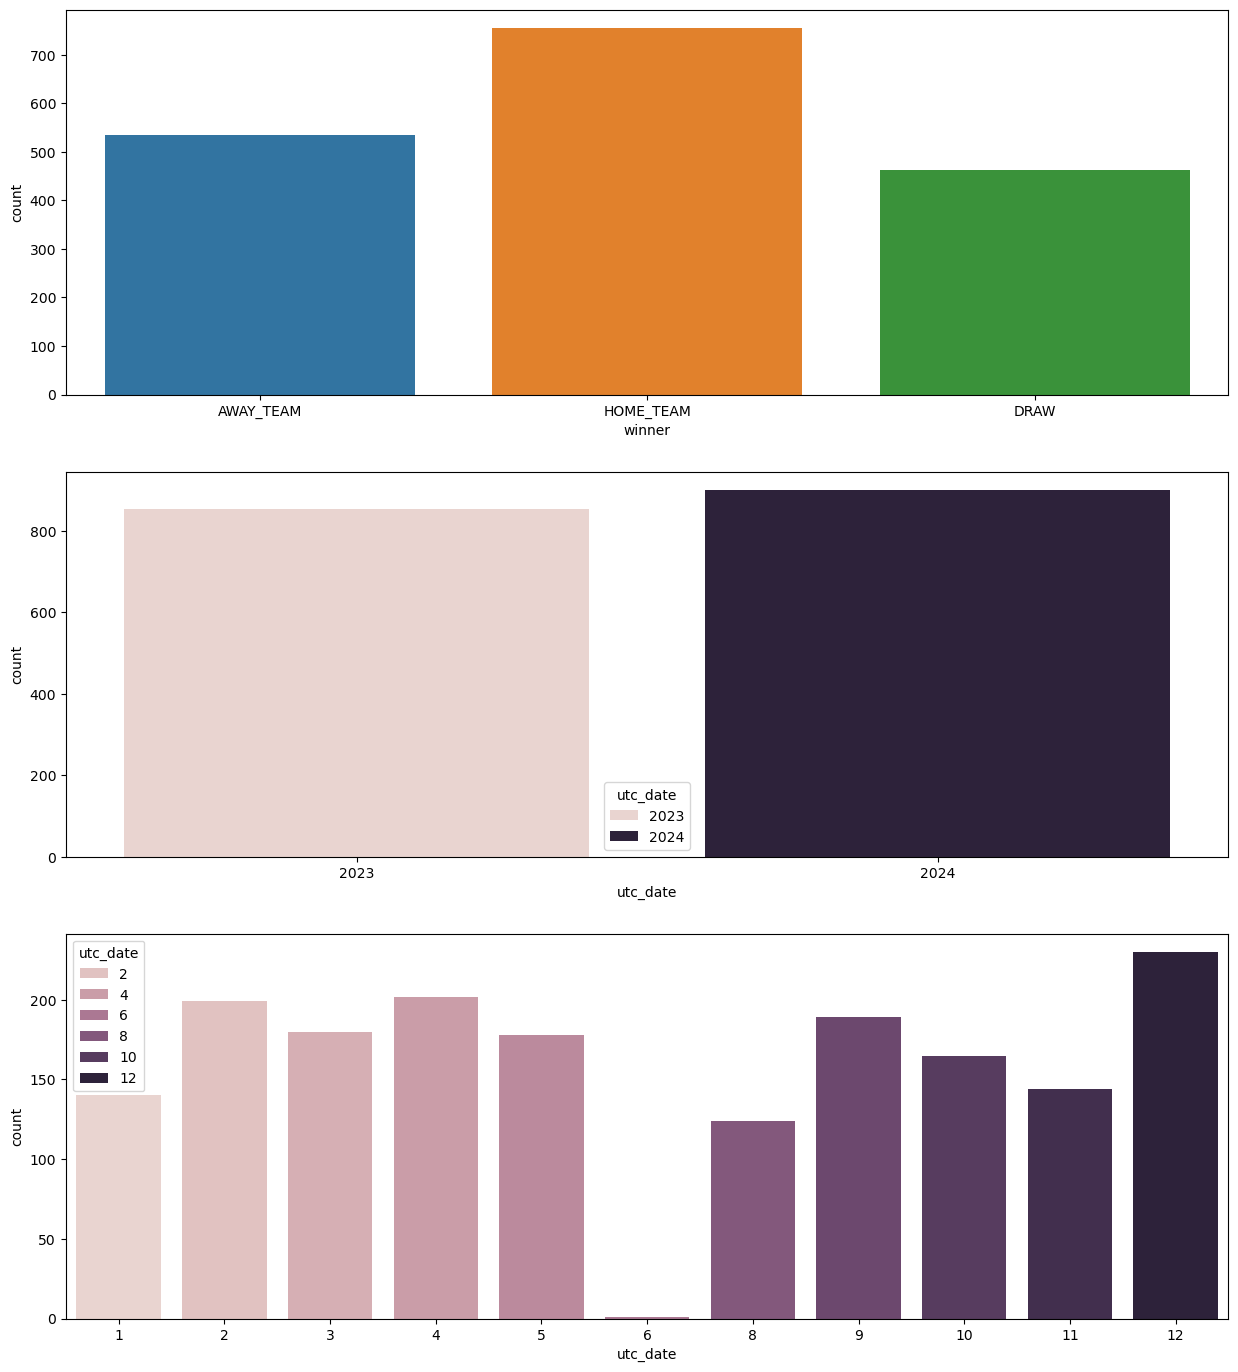

In [27]:
fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(15,17))
ax1=ax[0];ax2=ax[1];ax3=ax[2];

sns.countplot(data=df_matches,x="winner",hue="winner",ax=ax1)
sns.countplot(data=df_matches,x=df_matches["utc_date"].dt.year,hue=df_matches["utc_date"].dt.year,ax=ax2)
sns.countplot(data=df_matches,x=df_matches["utc_date"].dt.month,hue=df_matches["utc_date"].dt.month,ax=ax3);

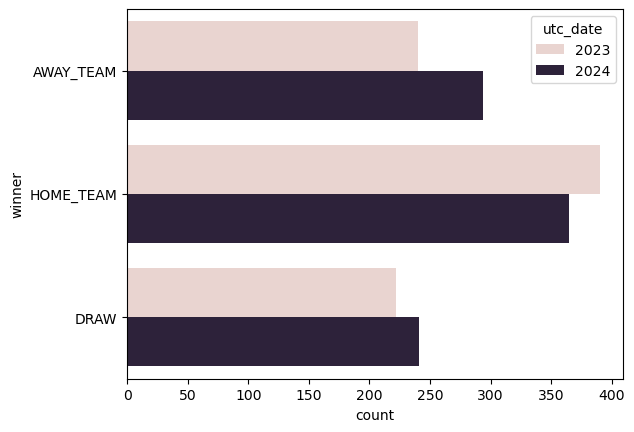

In [28]:
sns.countplot(data=df_matches,y="winner",hue=df_matches["utc_date"].dt.year);

### SUMMARY OF MATCHES DATASET
**winner:** *There are more matches won by home teams than by away teams or drawn. There are 755 matches won by home teams, 534 by away teams, and 463 matches drawn.*\
**utc_date:** *There are dates on which the matches were played on different dates. The most frequent dates were 19/05/2024 (33 times), 30/03/2024 (25 times), 30/09/2024 (23 times), etc.*\
**utc_date_month:** *There were months with more matches throughout the year. December had the most matches in some years.*

#### MULTIVARIABLE ANALYSIS
**winner vs years:** *The winners achieved different results in different years. Visiting teams had more wins in 2024 than in 2023, home teams had more wins in 2023 than in 2024, and there were more draws in 2024 than in 2023.*

## ANALYZING PLAYERS DATASET

In [29]:
df_players

player_id  team_id                  name    position date_of_birth  \
0          3222       65               Ederson  Goalkeeper    1993-08-17   
1          4172       65          Scott Carson  Goalkeeper    1985-09-03   
2          6958       65  Stefan Ortega Moreno  Goalkeeper    1992-11-06   
3        244993       65            True Grant  Goalkeeper    2005-11-02   
4           143       65         Manuel Akanji     Defence    1995-07-19   
...         ...      ...                   ...         ...           ...   
3145     252843      576         Vignon Ouotro     Offence    2005-09-13   
3146     252873      576        Tidiane Diallo     Offence    2006-05-28   
3147        280      548     Guillermo Maripán     Defence    1994-05-06   
3148       8913      546        Deiver Machado     Defence    1993-09-02   
3149     182199      521         Joffrey Bazie     Offence    2003-10-27   

       nationality  
0           Brazil  
1          England  
2          Germany  
3          England  
4      Switzerland  
...            ...  
3145   Ivory Coast  
3146        France  
3147         Chile  
3148      Colombia  
3149  Burkina Faso  

[3150 rows x 6 columns]

In [17]:
df_players_dict=df_players.sample(n=1000,random_state=42)
df_players_dict=df_players_dict.to_dict(orient="records")
template=ChatPromptTemplate.from_messages([
    ("system","You are an expert data scientist who analyzes charts and data frames professionally and analytically. You are concise in your answers and provide recommendations and your professional perspective."),
    ("user","Explain the dataset to me clearly and also tell me how to analyze it; that is, what graphs and operations would be useful to apply. The dataset is: {dataset}")    
])
chain=template|llm
response=chain.invoke({"dataset":df_players_dict})
display(Markdown(response.content))

This dataset provides a snapshot of football (soccer) players, detailing their basic biographical and career information. Each entry represents a unique player.

**Dataset Description:**

*   **`player_id`**: A unique numerical identifier for each player.
*   **`team_id`**: A numerical identifier for the team the player belongs to. (Note: Actual team names are not provided, only IDs).
*   **`name`**: The full name of the player.
*   **`position`**: The primary playing position of the player (e.g., 'Offence', 'Midfield', 'Defence', 'Goalkeeper').
*   **`date_of_birth`**: The player's birth date.
*   **`nationality`**: The player's country of origin.

---

**How to Analyze It (Useful Graphs and Operations):**

1.  **Data Preparation:**
    *   **Operation:** Convert `date_of_birth` to datetime objects.
    *   **Operation:** Calculate `age` for each player (e.g., `(current_date - date_of_birth) / 365.25`). This creates a crucial numerical feature.

2.  **Exploratory Data Analysis (EDA):**

    *   **Player Distribution by Position:**
        *   **Operation:** Count occurrences for each `position`.
        *   **Graph:** Bar Chart (e.g., `countplot`) to visualize the number of players in each role.
        *   **Insight:** Understand the general composition of players in the dataset.

    *   **Player Distribution by Nationality:**
        *   **Operation:** Count occurrences for each `nationality`.
        *   **Graph:** Bar Chart (for top N nationalities) or a Pie Chart (for overall distribution).
        *   **Insight:** Identify countries that are major sources of talent in this dataset.

    *   **Player Age Distribution:**
        *   **Operation:** Calculate descriptive statistics (mean, median, min, max, standard deviation) for `age`.
        *   **Graph:** Histogram or Box Plot of `age`.
        *   **Insight:** Understand the age range, central tendency, and spread of player ages. Identify if the dataset leans towards youth or veteran players.

    *   **Age Distribution by Position:**
        *   **Operation:** Group data by `position` and calculate age statistics for each group.
        *   **Graph:** Box Plots or Violin Plots of `age` per `position`.
        *   **Insight:** Determine if certain positions tend to have younger or older players (e.g., goalkeepers often have longer careers).

    *   **Nationality and Position Relationship:**
        *   **Operation:** Create a cross-tabulation of `nationality` and `position`.
        *   **Graph:** Stacked Bar Chart (if few categories) or a Heatmap to show the count/proportion of nationalities in each position.
        *   **Insight:** Discover if particular nationalities are overrepresented in specific positions.

    *   **Team Size (within this dataset):**
        *   **Operation:** Count players per `team_id`.
        *   **Graph:** Bar Chart (for top N `team_id`s).
        *   **Insight:** See which teams contribute the most players to this dataset.

---

**Professional Perspective & Recommendations:**

This dataset is foundational for understanding player demographics. To derive deeper insights, I recommend:

1.  **Contextualize `team_id`**: Without actual team names, `team_id` is less informative. If possible, enrich the dataset by joining with a team master data that provides team names and potentially league information.
2.  **Age Bucketing**: Consider creating age groups (e.g., "U18", "18-23", "24-29", "30+") to simplify analysis and identify trends related to youth development, peak performance, and veteran status.
3.  **Further Data Integration**: This data is most powerful when combined with performance statistics (goals, assists, tackles, saves), market values, or contract information. This would allow for analyses like:
    *   Performance by age and position.
    *   Market value trends across nationalities or positions.
    *   Correlation between age and specific performance metrics.

In [30]:

pd.read_sql("SELECT * FROM players WHERE player_id IS NULL OR team_id IS NULL OR name IS NULL OR position IS NULL OR date_of_birth IS NULL OR nationality IS NULL;",conn)

Empty DataFrame
Columns: [player_id, team_id, name, position, date_of_birth, nationality]
Index: []

In [31]:
df_players.describe()

player_id      team_id
count    3150.000000  3150.000000
mean    95978.993651   358.419048
std     88848.747023   822.850725
min         2.000000     1.000000
25%      7904.250000    66.000000
50%     77060.500000   107.000000
75%    179649.000000   511.000000
max    253004.000000  5911.000000

In [32]:
df_players.isnull().sum()

player_id        0
team_id          0
name             0
position         0
date_of_birth    0
nationality      0
dtype: int64

In [33]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   player_id      3150 non-null   int64 
 1   team_id        3150 non-null   int64 
 2   name           3150 non-null   object
 3   position       3150 non-null   object
 4   date_of_birth  3150 non-null   object
 5   nationality    3150 non-null   object
dtypes: int64(2), object(4)
memory usage: 147.8+ KB


In [34]:
df_players["date_of_birth"]=pd.to_datetime(df_players["date_of_birth"],format="ISO8601")
type(df_players["date_of_birth"][0])

pandas._libs.tslibs.timestamps.Timestamp

#### EXPLORATORY DATA ANALYSIS (EDA)

In [35]:
print(df_players["position"].value_counts())
print()
print(df_players["nationality"].value_counts())
print()
print(df_players["date_of_birth"].dt.year.value_counts().head(10))
print()
print(df_players["date_of_birth"].dt.month.value_counts().head(10))

position
Defence       1091
Midfield       992
Offence        671
Goalkeeper     396
Name: count, dtype: int64

nationality
Spain         506
France        402
Germany       319
England       300
Italy         299
             ... 
Panama          1
Honduras        1
Andorra         1
Luxembourg      1
Kenya           1
Name: count, Length: 107, dtype: int64

date_of_birth
2004    267
2001    225
2005    218
1997    217
2003    215
2000    210
1999    210
2002    202
1998    199
1996    186
Name: count, dtype: int64

date_of_birth
1     393
3     320
2     315
5     297
4     287
7     250
6     240
8     221
10    218
11    212
Name: count, dtype: int64


In [36]:
players_nationality=df_players["nationality"].value_counts().head(10).reset_index()
players_year=df_players["date_of_birth"].dt.year.value_counts().head(10).reset_index()
players_month=df_players["date_of_birth"].dt.month.value_counts().head(10).reset_index()

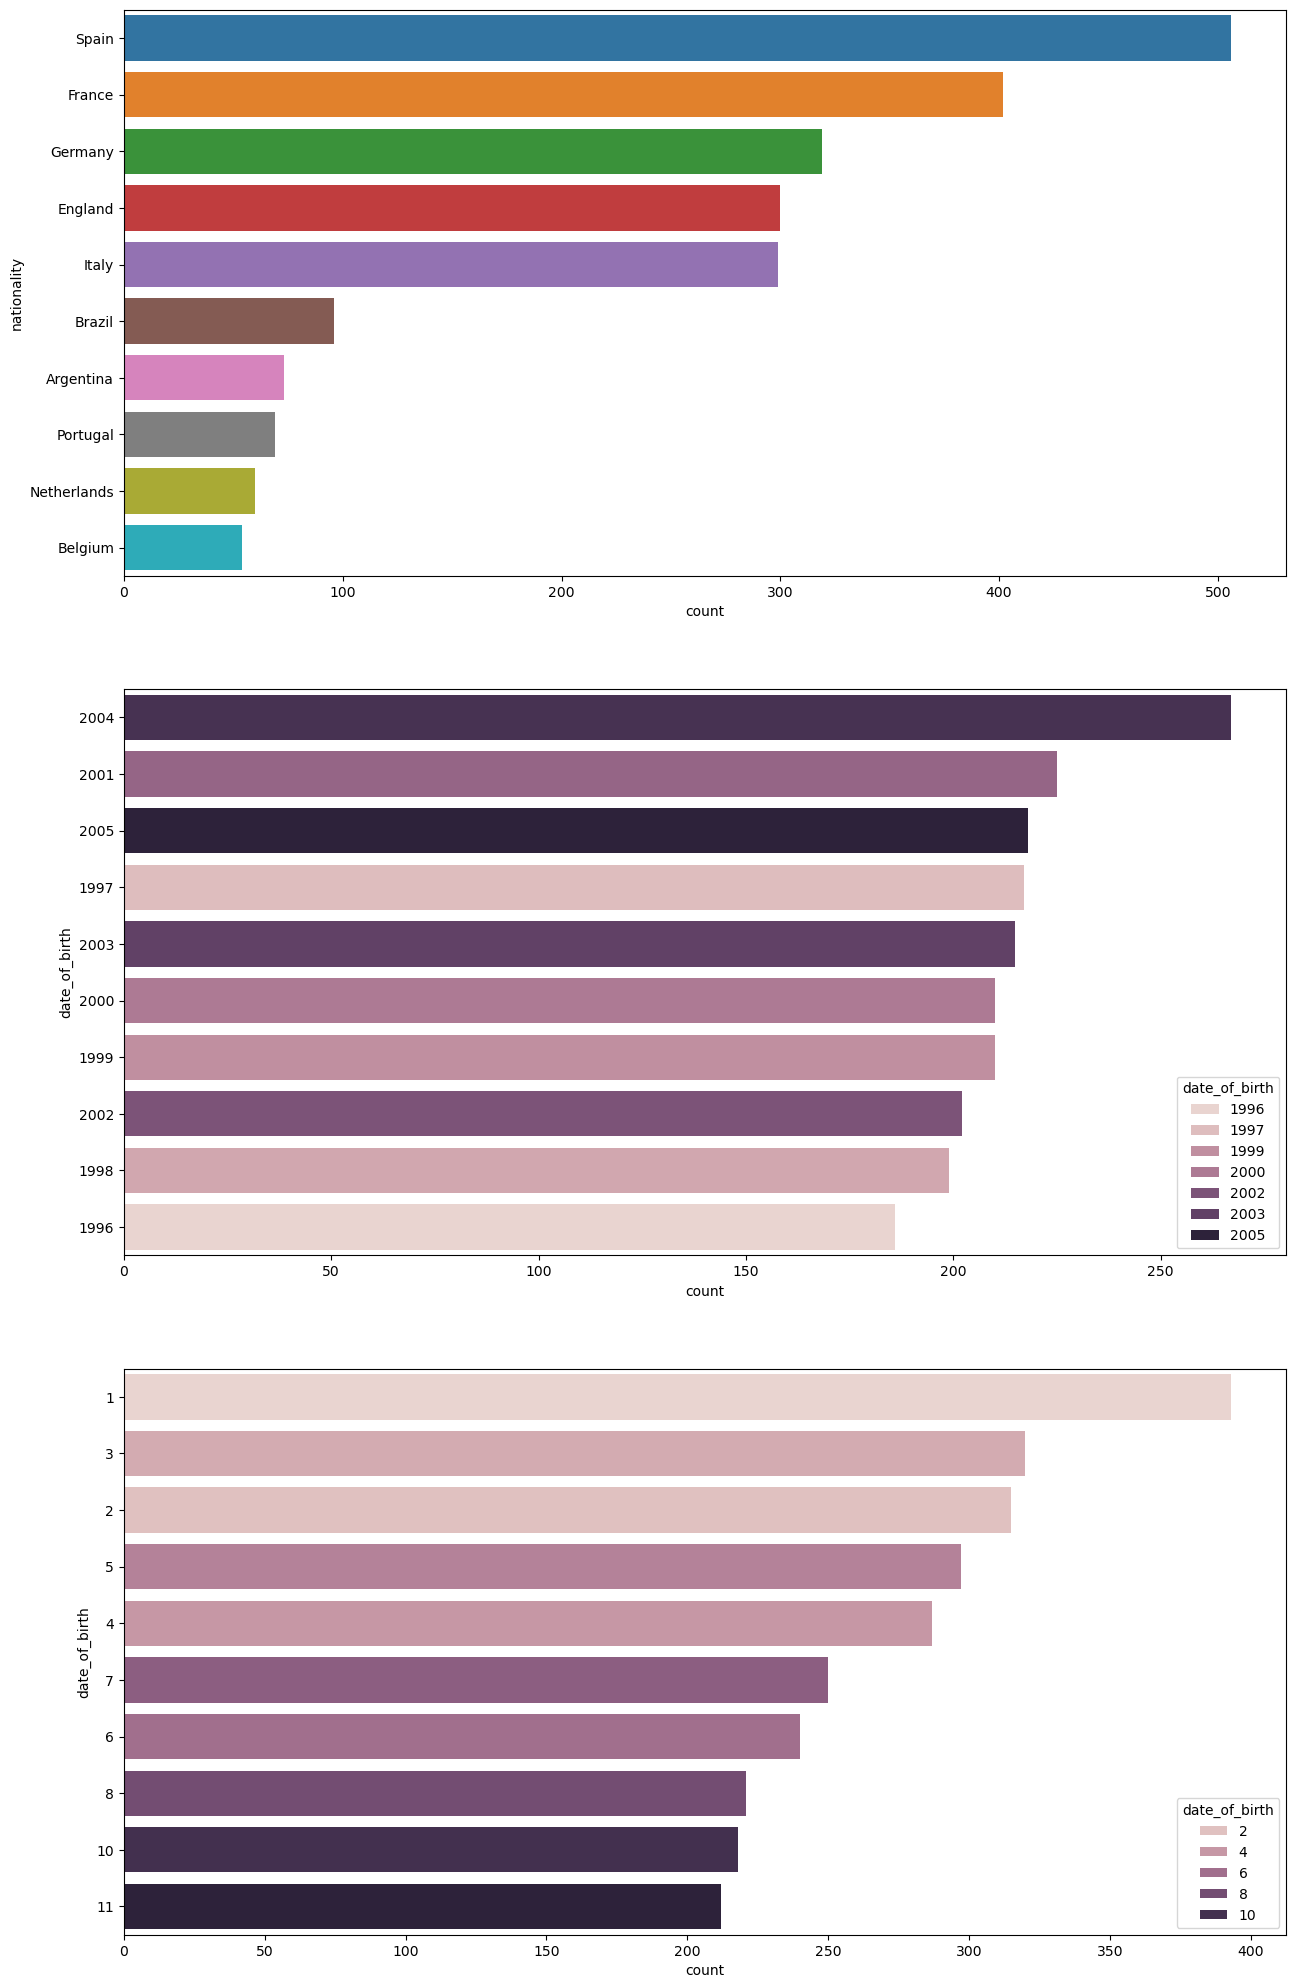

In [37]:
fig,ax=plt.subplots(nrows=3,ncols=1,figsize=(15,25))
ax1=ax[0];ax2=ax[1];ax3=ax[2];

sns.barplot(data=players_nationality,x="count",y="nationality",hue="nationality",ax=ax1)
sns.barplot(data=players_year,x="count",y=players_year["date_of_birth"].astype(str),hue="date_of_birth",ax=ax2)
sns.barplot(data=players_month,x="count",y=players_month["date_of_birth"].astype(str),hue="date_of_birth",ax=ax3);

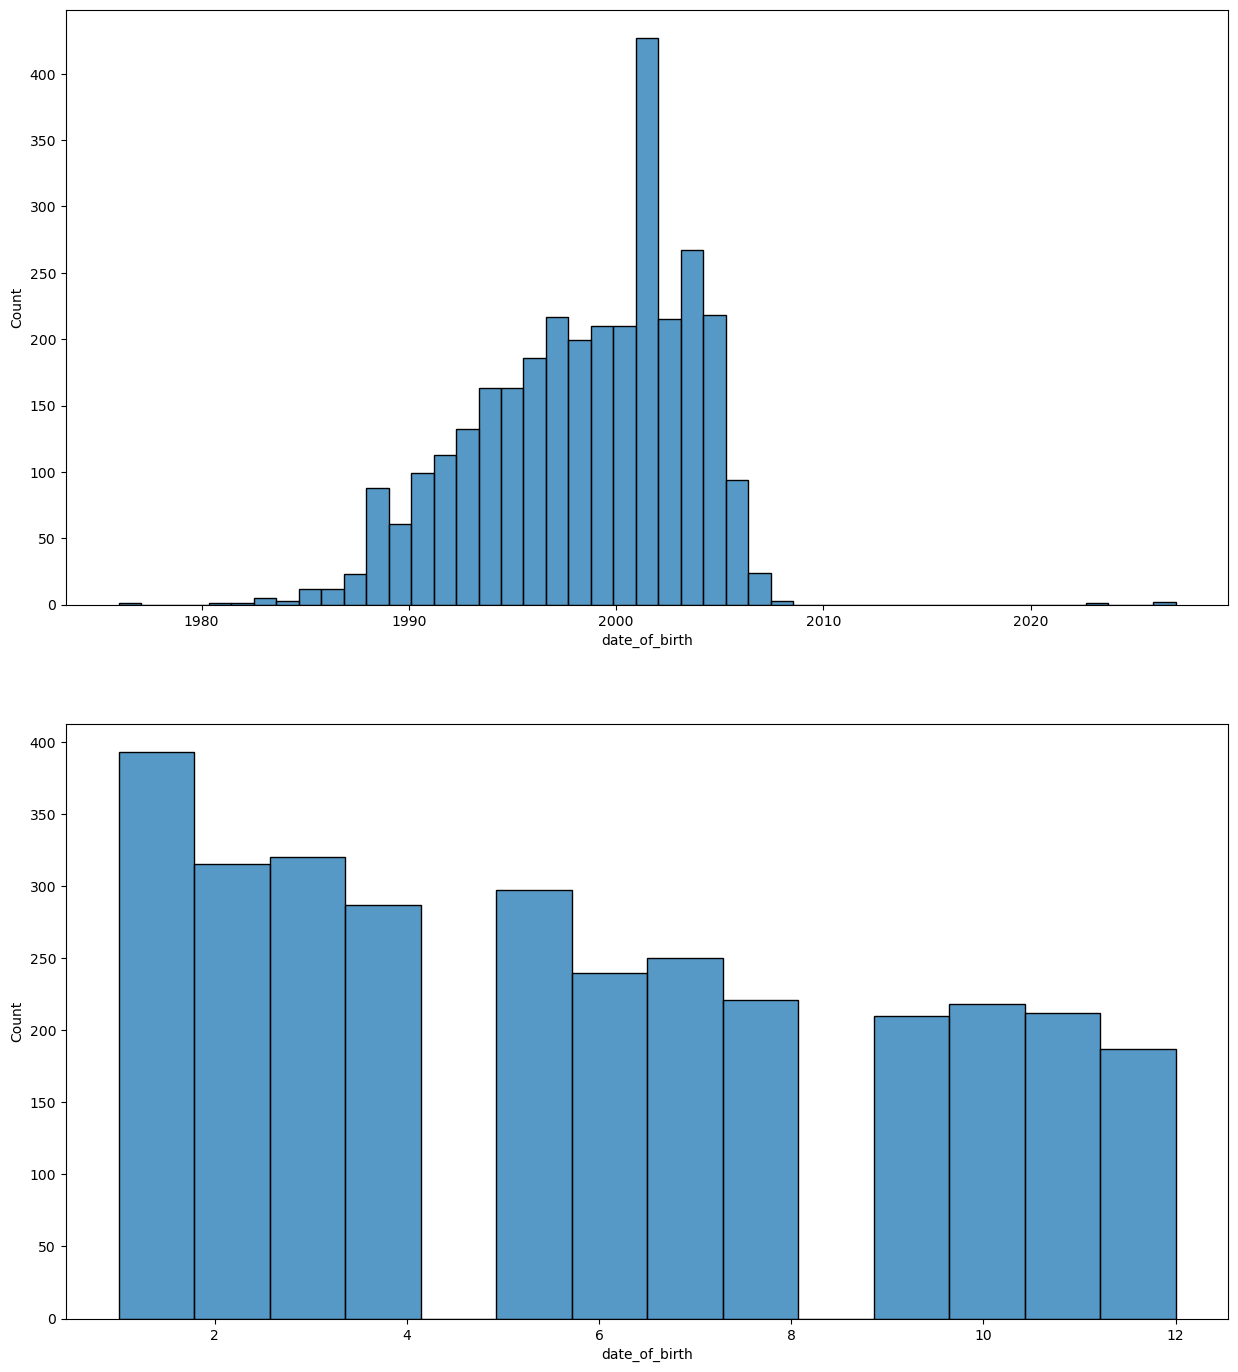

In [38]:
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,17))
ax1=ax[0];ax2=ax[1];

sns.histplot(data=df_players,x=df_players["date_of_birth"].dt.year,ax=ax1)
sns.histplot(data=players_year,x=df_players["date_of_birth"].dt.month,ax=ax2);

### MULTIVARIABLE DATA ANALYSIS

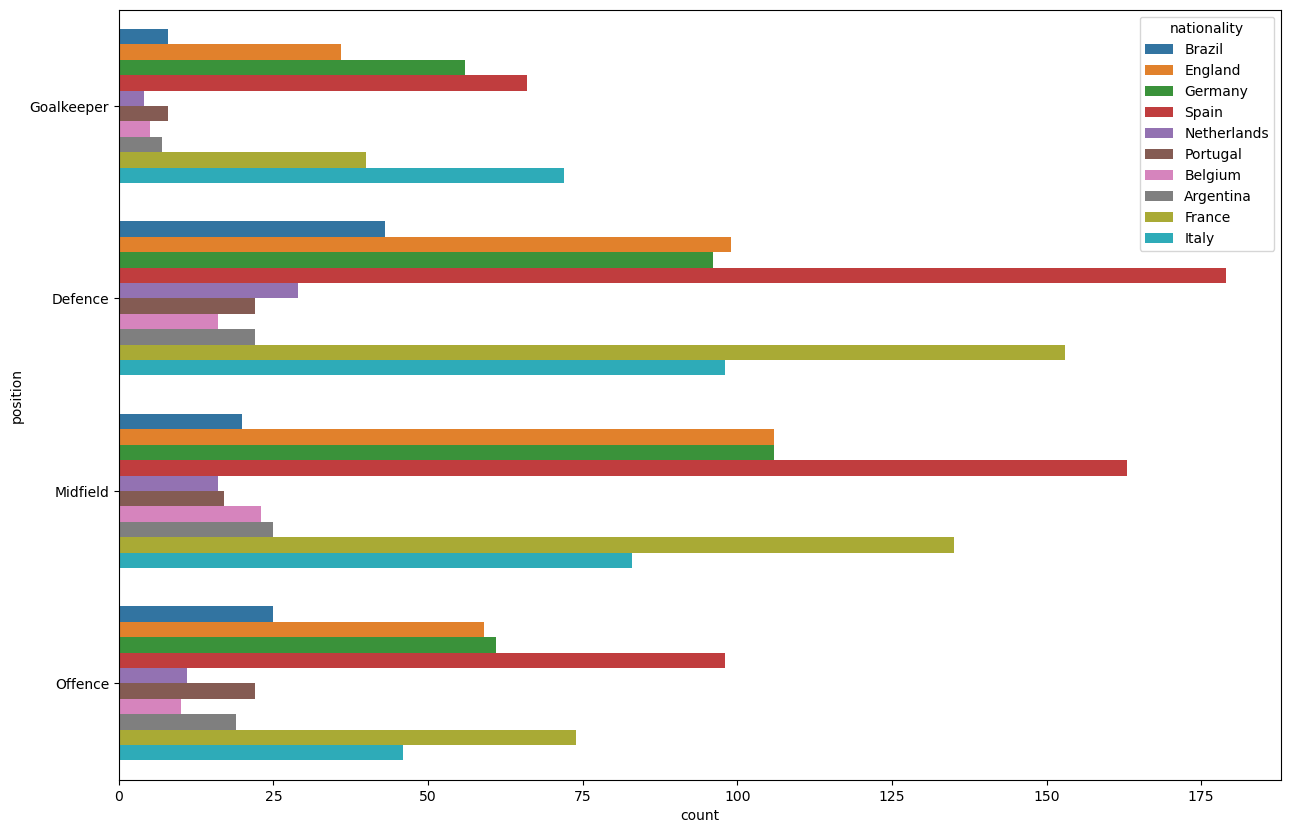

In [39]:
plt.figure(figsize=(15,10))
nationality=df_players[(df_players["nationality"].isin(df_players["nationality"].value_counts().head(10).index))]
sns.countplot(data=nationality,y="position",hue="nationality");

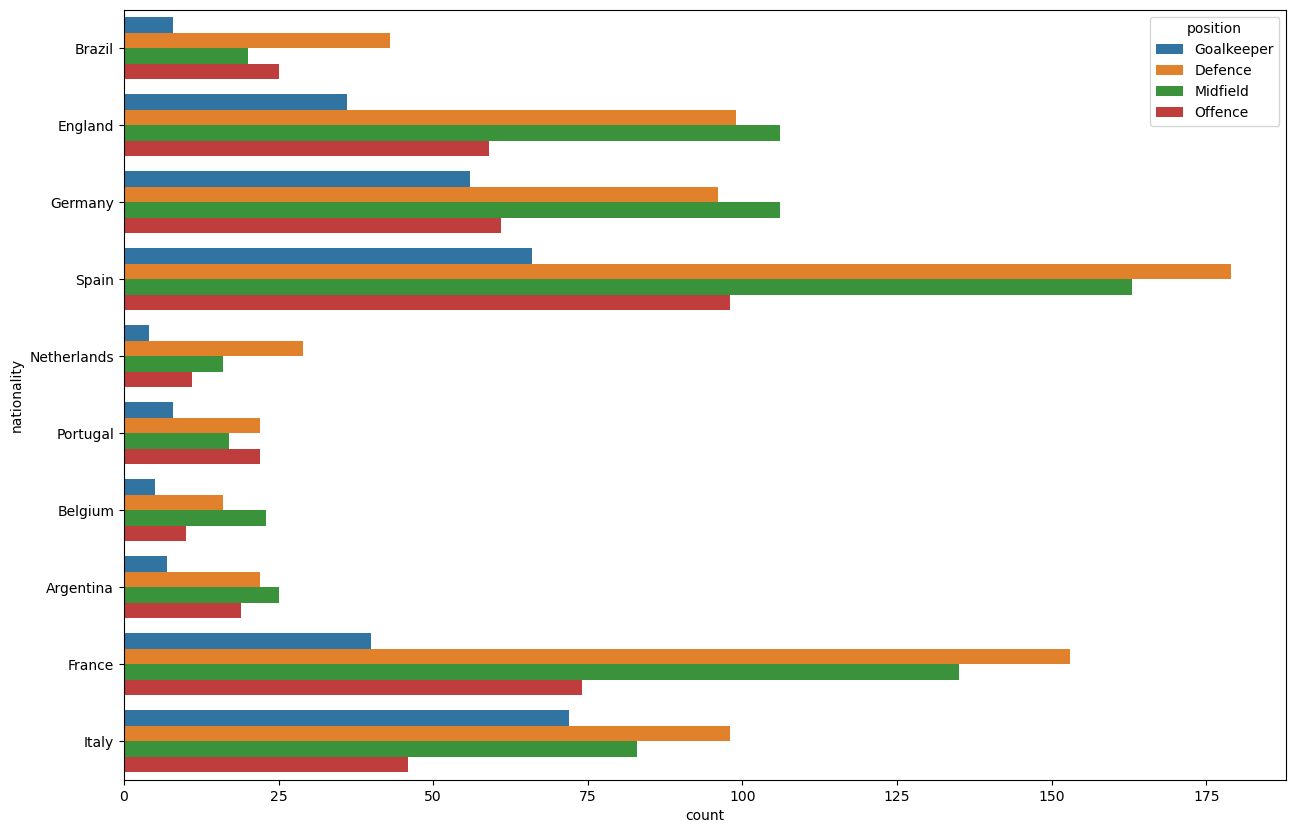

In [40]:
plt.figure(figsize=(15,10))
nationality=df_players[(df_players["nationality"].isin(df_players["nationality"].value_counts().head(10).index))]
sns.countplot(data=nationality,y="nationality",hue="position");

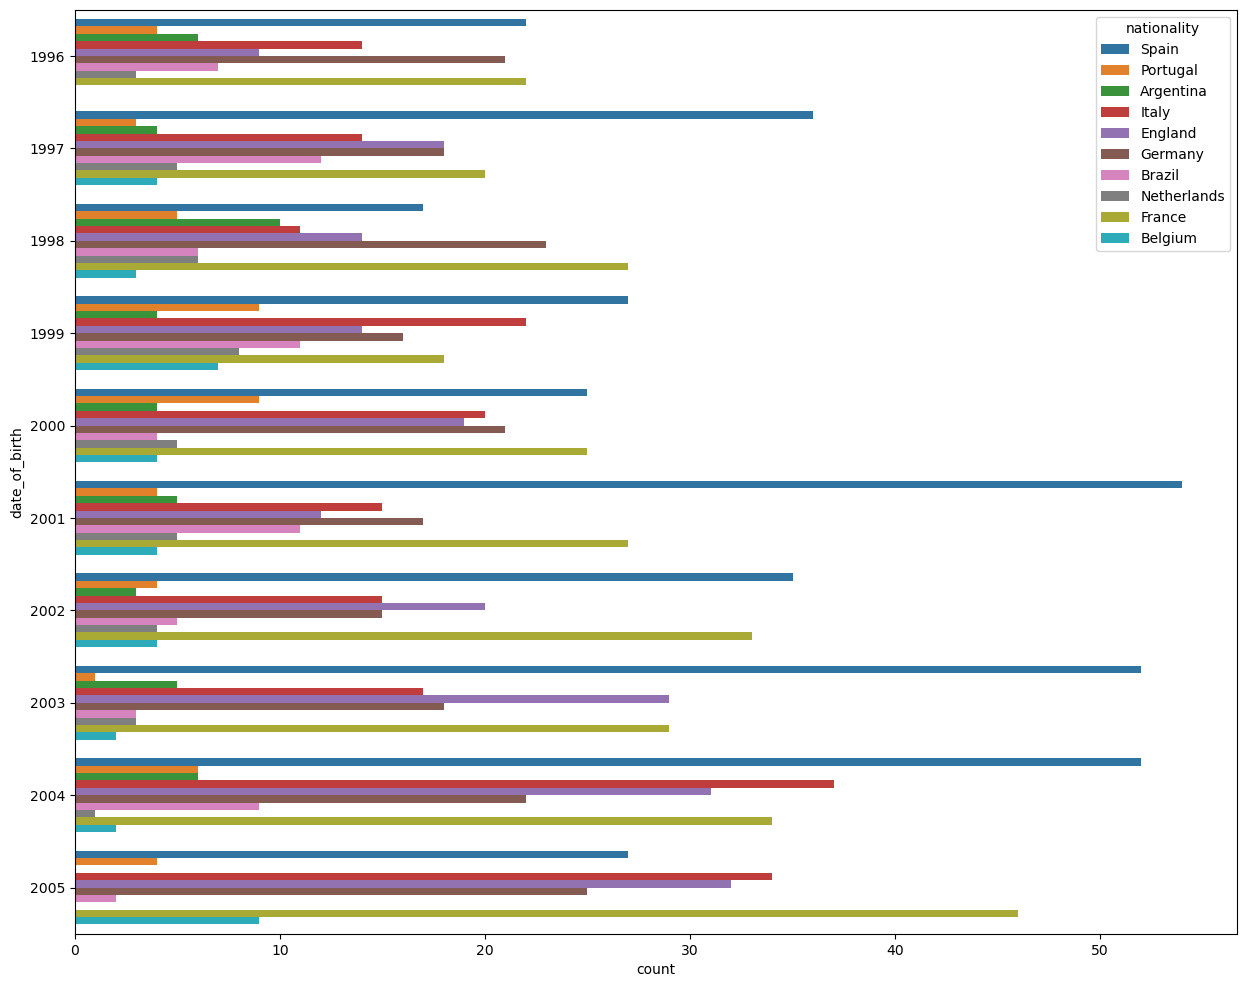

In [41]:

nationality=df_players[(df_players["nationality"].isin(df_players["nationality"].value_counts().head(10).index)) & (df_players["date_of_birth"].dt.year.isin(df_players["date_of_birth"].dt.year.value_counts().head(10).index))]
plt.figure(figsize=(15,12))
sns.countplot(data=nationality,y=nationality["date_of_birth"].dt.year,hue="nationality");

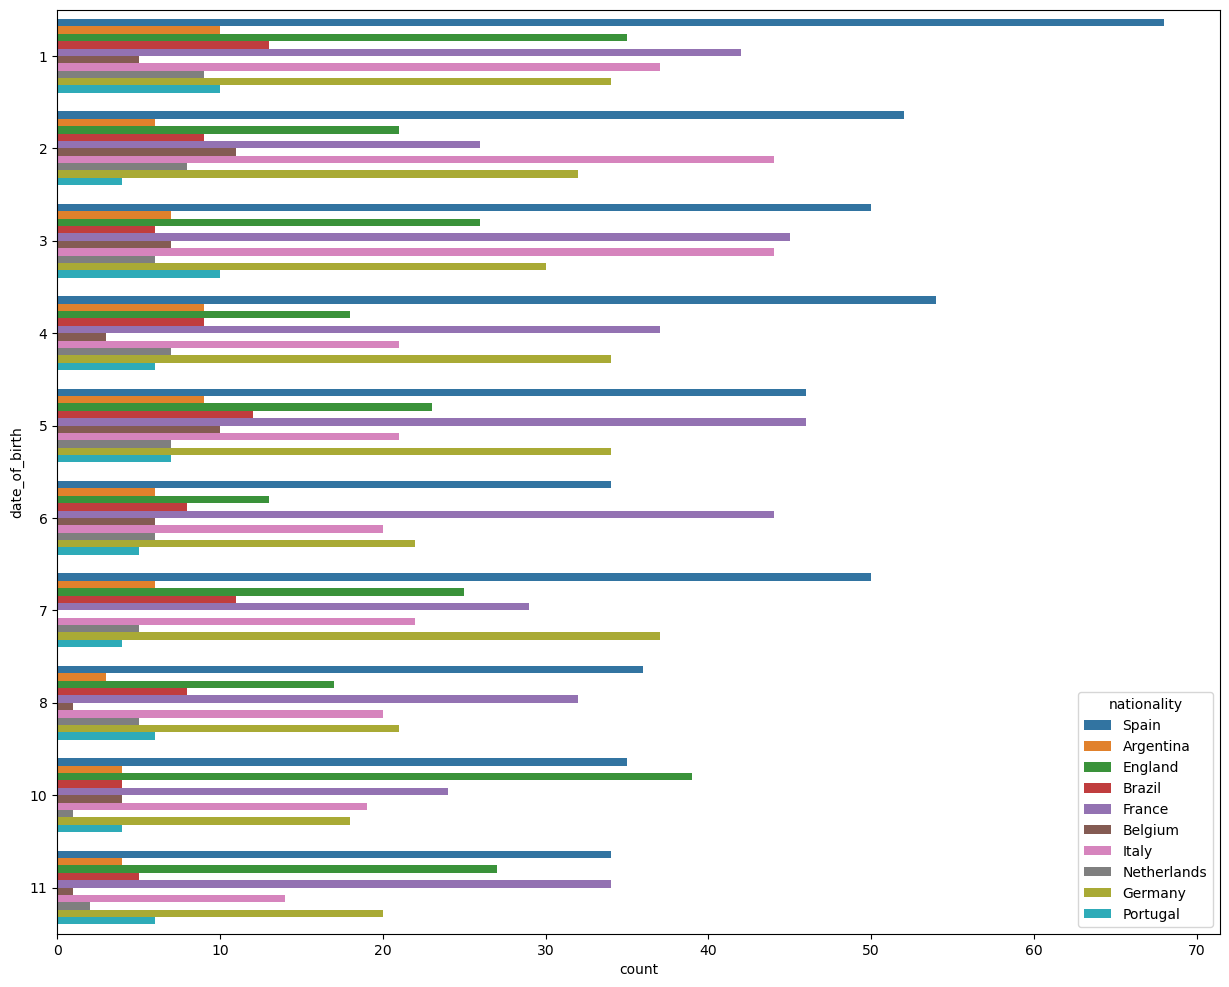

In [42]:

nationality=df_players[(df_players["nationality"].isin(df_players["nationality"].value_counts().head(10).index)) & (df_players["date_of_birth"].dt.month.isin(df_players["date_of_birth"].dt.month.value_counts().head(10).index))]
plt.figure(figsize=(15,12))
sns.countplot(data=nationality,y=nationality["date_of_birth"].dt.month,hue="nationality");

## SUMMARY OF PLAYERS DATASET
**position:** *There are more defenders in the dataset (1091), followed by midfielders (402), attackers (319) and finally goalkeepers (299).*\
**nationality:** *The Spanish have the largest number with 506 players in first place, followed by the French with 402 players, the Germans with 319 players, etc.*\
**date_of_birth_year:** *There are different years with the number of players' birthdays. 2004 has the highest number of birthdays (267), followed by 2001 (225), 2005 (218), etc.*\
**date_of_birth_month:** *There are different months with the number of players' birthdays. January has the higher number of birthdays (393),followed by March (320), February (315),etc.*

#### MULTIVARIABLE DATA ANALYSIS
**position vs nationality:** *There are differences between goalkeepers and other positions. Spain has the most players in various roles, ranking first in defense, midfield, and attack, except for goalkeeper. France is second in the same positions. However, when it comes to goalkeepers, Italy has the most players, followed by Spain, Germany, and so on.*\

## ANALYSING TEAMS DATASET

In [43]:
df_teams

team_id                     name  founded_year  stadium_id  league_id  \
0        77            Athletic Club        1898.0          61          3   
1        78  Club Atlético de Madrid        1903.0          62          3   
2        79               CA Osasuna        1920.0          63          3   
3        81             FC Barcelona        1899.0          64          3   
4        82                Getafe CF        1946.0          65          3   
..      ...                      ...           ...         ...        ...   
91      545                  FC Metz        1919.0          94          5   
92      546      Racing Club de Lens        1906.0          95          5   
93      547           Stade de Reims        1909.0          96          5   
94      548             AS Monaco FC        1919.0          97          5   
95      576     RC Strasbourg Alsace        1906.0          98          5   

    coach_id                                  cresturl  
0         61   https://crests.football-data.org/77.png  
1         62   https://crests.football-data.org/78.svg  
2         63   https://crests.football-data.org/79.svg  
3         64   https://crests.football-data.org/81.svg  
4         65   https://crests.football-data.org/82.png  
..       ...                                       ...  
91        94  https://crests.football-data.org/545.svg  
92        95  https://crests.football-data.org/546.png  
93        96  https://crests.football-data.org/547.png  
94        97  https://crests.football-data.org/548.png  
95        98  https://crests.football-data.org/576.png  

[96 rows x 7 columns]

In [121]:
df_teams_dict=df_teams.to_dict(orient="records")
template=ChatPromptTemplate.from_messages([
    ("system","You are an expert data scientist who analyzes charts and data frames professionally and analytically. You are concise in your answers and provide recommendations and your professional perspective."),
    ("user","Explain the dataset to me clearly and also tell me how to analyze it; that is, what graphs and operations would be useful to apply. The dataset is: {dataset}")    
])
chain=template|llm
response=chain.invoke({"dataset":df_teams_dict})
display(Markdown(response.content))

This dataset provides a list of football (soccer) teams, with each entry detailing specific attributes of a club.

**Dataset Description:**

Each dictionary in the list represents a unique football team and contains the following information:

*   **`team_id`**: A unique numerical identifier for the team.
*   **`name`**: The official name of the football club.
*   **`founded_year`**: The year the club was established. Note that some entries might have `nan` (Not a Number), indicating missing information.
*   **`stadium_id`**: A unique numerical identifier for the team's home stadium.
*   **`league_id`**: A unique numerical identifier for the league the team currently belongs to. This field indicates that teams from multiple leagues are present in the dataset.
*   **`coach_id`**: A unique numerical identifier for the team's coach.
*   **`cresturl`**: A URL pointing to the team's official crest or logo image.

**How to Analyze It (Graphs and Operations):**

**1. Data Preparation:**

*   **Handle Missing Values:** Address the `nan` values in `founded_year`. You might choose to:
    *   Impute them (e.g., with the median founding year, though this might not be ideal for historical data).
    *   Remove rows with `nan` if `founded_year` is critical for your analysis.
    *   Treat them as a separate category if you're categorizing teams by age.
*   **Data Type Conversion:** Convert `founded_year` to an integer type after handling `nan` values, as years are discrete.

**2. Useful Graphs and Operations:**

*   **League Distribution:**
    *   **Operation:** Group by `league_id` and count the number of teams in each league.
    *   **Graph:** **Bar Chart** to visualize the number of teams per `league_id`. This helps understand the representation of each league in the dataset.
*   **Team Founding Year Analysis:**
    *   **Operation:** Calculate descriptive statistics (mean, median, min, max, standard deviation) for `founded_year`.
    *   **Graph:** **Histogram** of `founded_year` to show the overall distribution of when teams were founded. This can reveal common eras for club establishment.
    *   **Graph:** **Box Plots** or **Violin Plots** of `founded_year` grouped by `league_id`. This allows for a comparison of the age profiles of teams across different leagues.
*   **Oldest/Newest Teams:**
    *   **Operation:** Sort the dataset by `founded_year` (ascending for oldest, descending for newest) to identify specific teams.
    *   **Graph:** A **Bar Chart** showing the `founded_year` for the top N oldest or newest teams can be insightful.
*   **Unique Identifiers (Stadiums/Coaches):**
    *   **Operation:** Count unique `stadium_id` and `coach_id` values. Compare these counts to the total number of teams to identify if any stadiums are shared (e.g., AC Milan and FC Internazionale Milano share 'San Siro', which would have the same `stadium_id`). Coaches should ideally be unique per team in a given season.
    *   **Graph:** (Less graphical, more tabular summary) A simple count or frequency table.

**Professional Perspective and Recommendations:**

1.  **Data Enrichment is Key:** This dataset provides identifiers (`league_id`, `stadium_id`, `coach_id`). To gain deeper insights, you should **join this data with other datasets** that contain details for these IDs. For example:
    *   A "Leagues" dataset (with `league_id`, `league_name`, `country`).
    *   A "Stadiums" dataset (with `stadium_id`, `stadium_name`, `capacity`, `city`).
    *   A "Coaches" dataset (with `coach_id`, `coach_name`, `nationality`).
    This would allow analysis like "Average team age per country" or "Which league has the highest average stadium capacity?"
2.  **Temporal Analysis:** With `founded_year`, you can create an "Age" column (e.g., `current_year - founded_year`). This allows you to analyze if older clubs have different characteristics or performance trends (if combined with performance data).
3.  **Visual Storytelling:** Once enriched, use interactive dashboards to allow users to filter by league, founding year range, or other attributes, making the data exploration more dynamic and insightful.
4.  **Data Quality Check:** Investigate the `nan` value for `founded_year` (Sheffield United). It's crucial to understand why this data is missing and whether it can be accurately retrieved, especially for historical analysis.

In [44]:
df_teams.describe()

team_id  founded_year  stadium_id  league_id    coach_id
count    96.000000     95.000000   96.000000  96.000000   96.000000
mean    364.958333   1907.631579   68.510417   2.937500   68.875000
std     842.966927     24.624435   28.625346   1.412817   28.393198
min       1.000000   1846.000000   21.000000   1.000000   21.000000
25%      65.750000   1896.500000   43.000000   2.000000   44.750000
50%     107.500000   1905.000000   68.500000   3.000000   68.500000
75%     513.000000   1919.500000   92.250000   4.000000   92.250000
max    5911.000000   2009.000000  118.000000   5.000000  118.000000

In [45]:
df_teams.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   team_id       96 non-null     int64  
 1   name          96 non-null     object 
 2   founded_year  95 non-null     float64
 3   stadium_id    96 non-null     int64  
 4   league_id     96 non-null     int64  
 5   coach_id      96 non-null     int64  
 6   cresturl      96 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 5.4+ KB


In [46]:
df_teams.isnull().sum()

team_id         0
name            0
founded_year    1
stadium_id      0
league_id       0
coach_id        0
cresturl        0
dtype: int64

In [47]:
df_teams[df_teams["founded_year"].isnull()]

team_id              name  founded_year  stadium_id  league_id  coach_id  \
61      356  Sheffield United           NaN          35          1        35   

                                    cresturl  
61  https://crests.football-data.org/356.svg

In [48]:
df_teams.fillna({"founded_year":1889},inplace=True)

### EXPLORATORY DATA ANALYSIS (EDA)

In [49]:
df_teams["founded_year"].value_counts().head(10)

founded_year
1904.0    5
1898.0    4
1903.0    4
1920.0    4
1899.0    4
1905.0    4
1919.0    4
1912.0    3
1906.0    3
1909.0    3
Name: count, dtype: int64

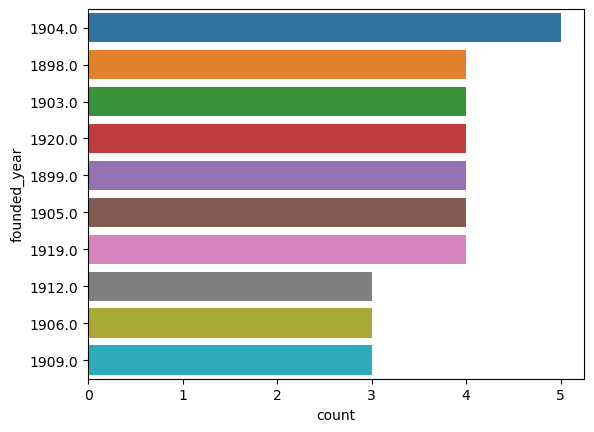

In [50]:
repeated_year=df_teams["founded_year"].value_counts().head(10).reset_index()
sns.barplot(data=repeated_year,x="count",y=repeated_year["founded_year"].astype(str),hue=repeated_year["founded_year"].astype(str));

### MULTIVARIABLE DATA ANALYSIS

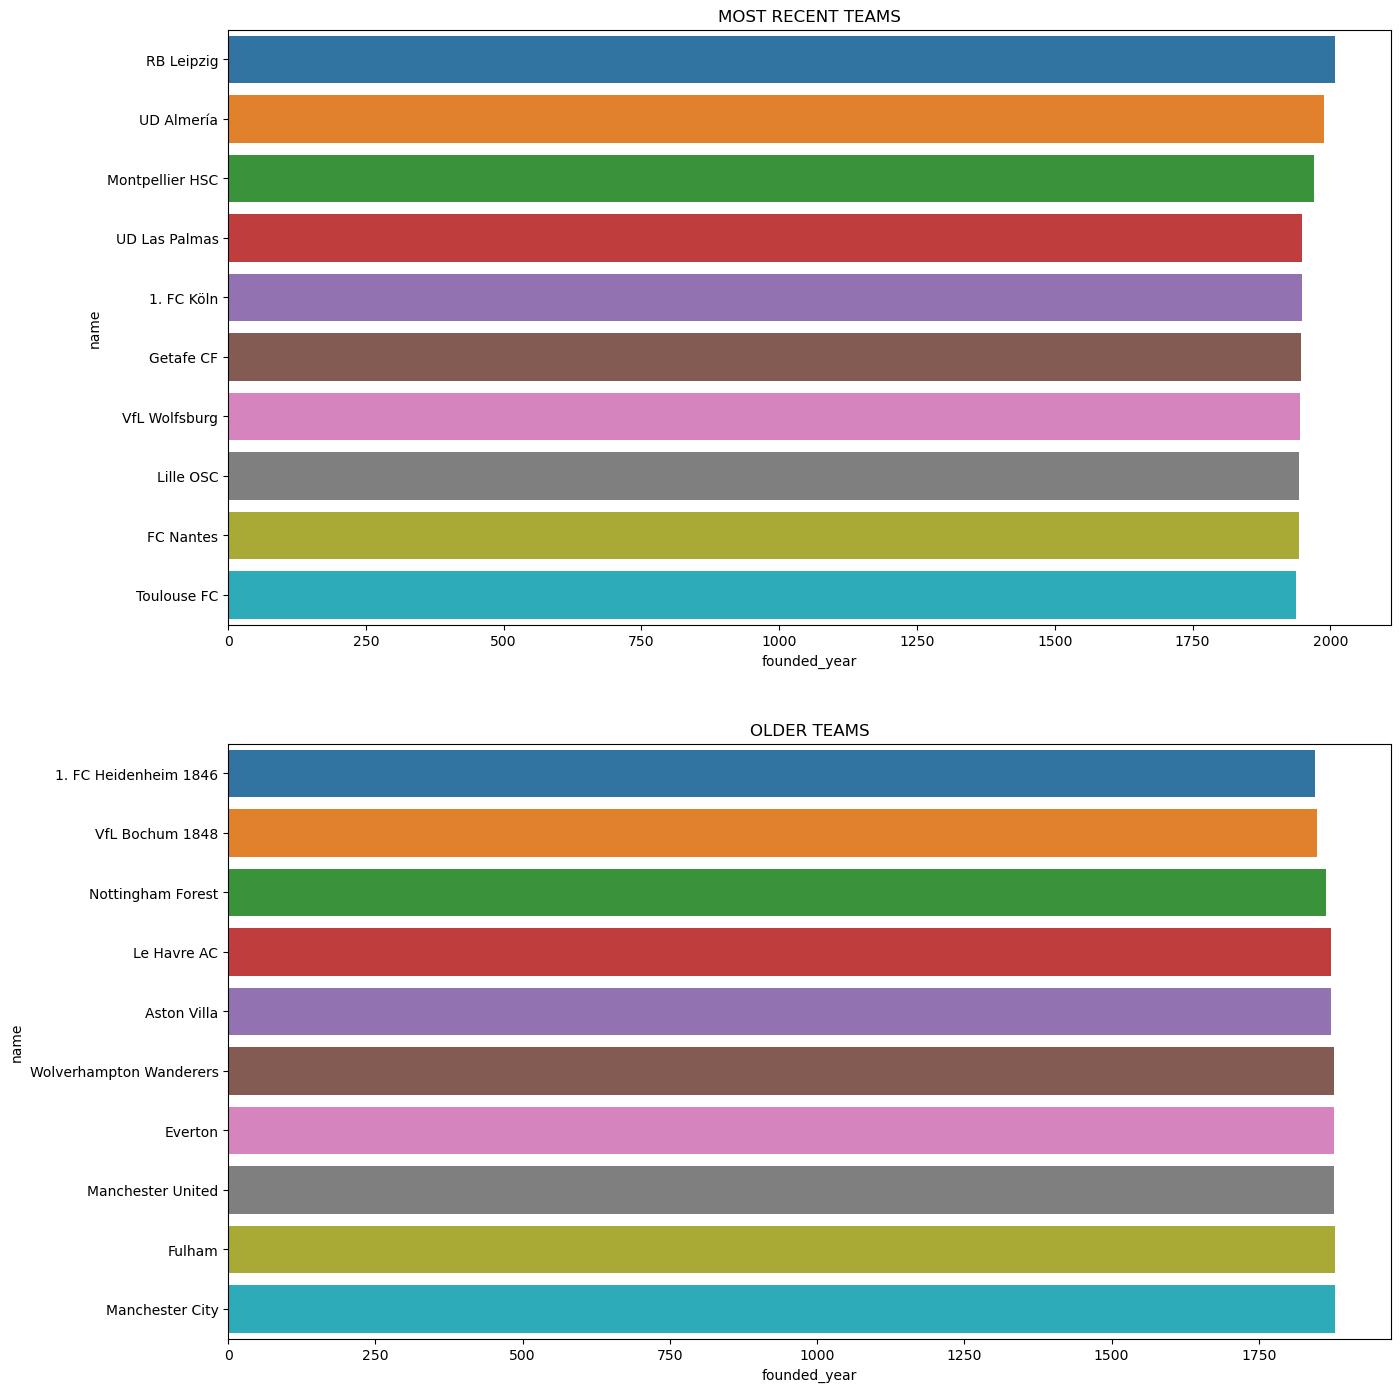

In [51]:
founded_year_asc=df_teams.sort_values(by="founded_year",ascending=True).head(10)
founded_year=df_teams.sort_values(by="founded_year",ascending=False).head(10)
fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,17))
ax1=ax[0];ax2=ax[1];

ax1.set_title("MOST RECENT TEAMS")
sns.barplot(data=founded_year,x="founded_year",y="name",hue="name",ax=ax1)

ax2.set_title("OLDER TEAMS")
sns.barplot(data=founded_year_asc,x="founded_year",y="name",hue="name",ax=ax2);

## SUMMARY OF TEAMS DATASET
**founded_year:** *The most frequently occurring years were 1904 (5 times), followed by 1898 (4 times), 1903 (4 times), etc.*
#### MULTIVARIABLE DATA ANALYSIS 
**name vs founded_year:** *The newest teams overall (without specifying the league) were RB Leipzig, UD Almería, Montpellier HSC, etc.*\
**name vs founded_year:** *The oldest teams overall (without specifying the league) were FC Heidenheim 1846, VfL Bochum 1848, Nottingham Forest, etc.*


## ANALYSING REFEREE DATASET

In [52]:
df_referee

referee_id                name nationality
0         11585        Craig Pawson     England
1         11605      Michael Oliver     England
2         11309        Peter Bankes     England
3         11556         David Coote     England
4         11494      Stuart Attwell     England
..          ...                 ...         ...
127       15545       Benoît Millot      France
128       64829        Gaël Angoula      France
129       64781     Marc Bollengier      France
130       25786  Stéphanie Frappart      France
131       40158     Miguel Nogueira    Portugal

[132 rows x 3 columns]

In [53]:
df_referee.isnull().sum()

referee_id     0
name           0
nationality    0
dtype: int64

In [54]:
df_referee_dict=df_referee.to_dict(orient="records")
template=ChatPromptTemplate.from_messages([
    ("system","You are an expert data scientist who analyzes charts and data frames professionally and analytically. You are concise in your answers and provide recommendations and your professional perspective."),
    ("user","Explain the dataset to me clearly and also tell me how to analyze it; that is, what graphs and operations would be useful to apply. The dataset is: {dataset}")    
])
chain=template|llm
response=chain.invoke({"dataset":df_referee_dict})
display(Markdown(response.content))

This dataset provides a list of football referees, with each entry containing:

*   **`referee_id`**: A unique identifier for the referee.
*   **`name`**: The full name of the referee.
*   **`nationality`**: The country the referee represents.

### How to Analyze It

Given this dataset, the primary analytical focus would be on understanding the demographics of the referees, specifically their nationalities.

**Useful Operations:**

1.  **Count by Nationality:** Determine how many referees come from each country. This is the most crucial operation for this dataset.
    *   *Example:* Group by `nationality` and count the occurrences.
2.  **Identify Unique Referees:** Verify the number of distinct referees using `referee_id`.
3.  **Handle Missing Data:** Check for `NULL` or missing values in the `nationality` column (e.g., 'Javier Alberola Rojas' has 'NULL' nationality). Decide how to treat these (e.g., exclude, label as 'Unknown').
4.  **Top Nationalities:** Identify the countries with the most referees.

**Useful Graphs:**

1.  **Bar Chart (Nationality Distribution):**
    *   **X-axis:** Nationality
    *   **Y-axis:** Count of Referees
    *   **Purpose:** Clearly visualize the distribution of referees across different countries and highlight the dominant nationalities.

### Professional Perspective and Recommendations

*   **Descriptive Analysis:** This dataset is purely descriptive. Its immediate value lies in understanding the composition of the referee pool by nationality.
*   **Data Quality:** The presence of `NULL` in the `nationality` field for some referees indicates a need for data cleaning or investigation into why that information is missing.
*   **Limited Scope:** While useful for an overview, this dataset alone offers limited insights into referee performance, bias, or match impact.
*   **Augmentation Potential:** To derive deeper insights, this dataset should be joined with other data sources, such as:
    *   **Match Data:** Number of matches officiated, league, date, teams involved.
    *   **Performance Metrics:** Average cards per game, penalty decisions, VAR overturns, match ratings.
    *   **Demographic Data:** Age, experience level (if available).
*   **Recommendation:** Prioritize cleaning the `nationality` column. Then, use the bar chart to quickly grasp the national representation. For advanced analysis, integrate this with match statistics to explore potential correlations between nationality and refereeing style or match outcomes.

### EXPLORATORY DATA ANALYSIS (EDA)

In [55]:
print(df_referee["name"].value_counts().head(10))
print()
print(df_referee["nationality"].value_counts())

name
Craig Pawson             1
Juan Martínez Munuera    1
Matthias Jöllenbeck      1
Benjamin Brand           1
Frank Willenborg         1
Harm Osmers              1
Tobias Stieler           1
Deniz Aytekin            1
Daniel Siebert           1
Daniel Schlager          1
Name: count, dtype: int64

nationality
Italy        38
England      27
Germany      25
France       20
Spain        19
Australia     1
NULL          1
Portugal      1
Name: count, dtype: int64


In [56]:
df_referee[df_referee["nationality"]=="NULL"]

referee_id                   name nationality
66       80747  Javier Alberola Rojas        NULL

In [57]:
#ADDING NATIONALITY
df_referee.loc[66,"nationality"]="Spain"

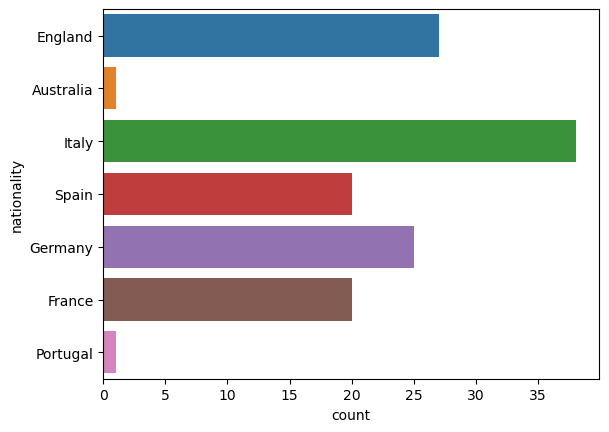

In [58]:
sns.countplot(data=df_referee,y="nationality",hue="nationality");

## SUMMARY OF REFEREEE DATASET
**nationality:** *The nationality with the highest number of referees was Italy, followed by England, Germany, etc.*

## ANALYZING STADIUM DATASET

In [59]:
df_stadiums

stadium_id                      name  \
0           81         Stadium Municipal   
1           82      Stade Francis-Le Blé   
2           83          Orange Vélodrome   
3           21          Emirates Stadium   
4           22                Villa Park   
..         ...                       ...   
89          94    Stade Saint-Symphorien   
90          95    Stade Bollaert-Delelis   
91          96  Stade Auguste-Delaune II   
92          97           Stade Louis II.   
93          98        Stade de la Meinau   

                                             location  capacity  
0    1 allée Gabriel Biénèsm, BP 54023 Toulouse 31028       NaN  
1   Port de Plaisance, 470 bis rue Alain Colas Bre...       NaN  
2   La Commanderie, 33, traverse de La Martine Mar...       NaN  
3                                          London, UK   60704.0  
4                                      Birmingham, UK   42640.0  
..                                                ...       ...  
89      3, allée Saint Symphonien, BP 40292 Metz 5700       NaN  
90                 33 rue Arthur Lamendin Avion 62210       NaN  
91                   26 rue Robert-Fulton Reims 51100       NaN  
92                 Avenue des Castellans Monaco 98000       NaN  
93                12 Rue Extenwoerth Strasbourg 67000       NaN  

[94 rows x 4 columns]

In [60]:
df_stadiums.isnull().sum()

stadium_id     0
name           0
location       0
capacity      74
dtype: int64

## ANALYZING LEAGUE DATASET

In [61]:
df_leagues

league_id            name  country  country_id  \
0          2         Serie A    Italy           2   
1          3         La Liga    Spain           3   
2          4      Bundesliga  Germany           4   
3          5         Ligue 1   France           5   
4          1  Premier League  England           1   

                                   icon_url  cl_spot  uel_spot  \
0   https://crests.football-data.org/SA.png        4         5   
1   https://crests.football-data.org/PD.png        4         5   
2  https://crests.football-data.org/BL1.png        4         5   
3  https://crests.football-data.org/FL1.png        3         4   
4   https://crests.football-data.org/PL.png        4         6   

   relegation_spot  
0               18  
1               18  
2               16  
3               17  
4               18

In [62]:
df_leagues.isnull().sum()

league_id          0
name               0
country            0
country_id         0
icon_url           0
cl_spot            0
uel_spot           0
relegation_spot    0
dtype: int64

## ANALYZING SCORES DATASET

In [63]:
df_scores

score_id  match_id  full_time_home  full_time_away  half_time_home  \
0            1    435943               0               3               0   
1            2    435944               2               1               2   
2            3    435945               1               1               0   
3            4    435946               4               1               1   
4            5    435947               0               1               0   
...        ...       ...             ...             ...             ...   
1747      1748    443008               0               3               0   
1748      1749    443009               2               1               1   
1749      1750    443010               2               2               0   
1750      1751    443011               2               2               2   
1751      1752    443012               2               1               0   

      half_time_away  
0                  2  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1747               0  
1748               0  
1749               1  
1750               0  
1751               0  

[1752 rows x 6 columns]

In [64]:
df_scores.isnull().sum()

score_id          0
match_id          0
full_time_home    0
full_time_away    0
half_time_home    0
half_time_away    0
dtype: int64

In [92]:
df_scores_dict=df_scores.to_dict(orient="records")
template=ChatPromptTemplate.from_messages([
    ("system","You are an expert data scientist who analyzes charts and data frames professionally and analytically. You are concise in your answers and provide recommendations and your professional perspective."),
    ("user","Explain the dataset to me clearly and also tell me how to analyze it; that is, what graphs and operations would be useful to apply. The dataset is: {dataset}")    
])
chain=template|llm
response=chain.invoke({"dataset":df_scores_dict})
display(Markdown(response.content))

This dataset contains scores for individual football (soccer) matches, providing details on goals scored by both home and away teams at both half-time and full-time.

**Dataset Explanation:**

Each entry (dictionary) represents a single match's score record:

*   **`score_id`**: A unique identifier for this specific score record.
*   **`match_id`**: A unique identifier for the match itself. Multiple score records are not expected for the same match_id.
*   **`full_time_home`**: The total number of goals scored by the home team by the end of the match.
*   **`full_time_away`**: The total number of goals scored by the away team by the end of the match.
*   **`half_time_home`**: The total number of goals scored by the home team at the end of the first half.
*   **`half_time_away`**: The total number of goals scored by the away team at the end of the first half.

**How to Analyze It (Graphs and Operations):**

The dataset allows for analysis of scoring patterns, home/away advantage, and match dynamics.

**1. Data Preparation / Feature Engineering (Operations):**

*   **Total Goals**:
    *   `total_full_time_goals` = `full_time_home` + `full_time_away`
    *   `total_half_time_goals` = `half_time_home` + `half_time_away`
*   **Second Half Goals**:
    *   `second_half_home_goals` = `full_time_home` - `half_time_home`
    *   `second_half_away_goals` = `full_time_away` - `half_time_away`
*   **Match Outcome**:
    *   Categorical: 'Home Win' (if `full_time_home` > `full_time_away`), 'Away Win' (if `full_time_away` > `full_time_home`), 'Draw' (if `full_time_home` == `full_time_away`).
*   **Half-time Outcome**:
    *   Categorical: 'Home Leading', 'Away Leading', 'Draw' (based on `half_time_home` vs. `half_time_away`).
*   **Goal Difference**:
    *   `full_time_goal_difference` = `full_time_home` - `full_time_away`

**2. Descriptive Statistics (Operations):**

*   Calculate mean, median, mode, and standard deviation for all goal columns (full-time, half-time, total goals, second-half goals).
*   Count and percentage of each `Match Outcome` and `Half-time Outcome`.

**3. Useful Graphs:**

*   **Histograms**:
    *   **`full_time_home`**, **`full_time_away`**, **`total_full_time_goals`**: To visualize the distribution of goals scored by home/away teams and in total.
    *   **`second_half_home_goals`**, **`second_half_away_goals`**: To see scoring patterns in the second half.
*   **Bar Charts**:
    *   **`Match Outcome`**: To show the proportion of home wins, away wins, and draws.
    *   **`Half-time Outcome`**: To show the proportion of half-time leaders/draws.
    *   **Average Goals per Half (Home/Away)**: Grouped bar chart comparing `half_time_home` vs. `second_half_home_goals` and `half_time_away` vs. `second_half_away_goals`.
*   **Box Plots / Violin Plots**:
    *   Compare distributions of `full_time_home` vs. `full_time_away` goals to visually assess home advantage.
*   **Stacked Bar Charts / Heatmaps**:
    *   **`Half-time Outcome` vs. `Match Outcome`**: To analyze how often a half-time lead converts to a full-time win, or how often comebacks/collapses occur.
*   **Scatter Plot (Optional)**:
    *   `total_half_time_goals` vs. `total_full_time_goals`: To see the correlation and how scores tend to evolve.

**Professional Perspective & Recommendations:**

This dataset is ideal for understanding fundamental football match dynamics. Key insights to pursue include:

1.  **Home Advantage**: Quantify if playing at home significantly impacts the number of goals scored and the likelihood of winning.
2.  **Scoring Dynamics**: Determine if more goals are typically scored in the first or second half, and if there are common "comeback" scenarios after half-time.
3.  **Predictive Potential**: While limited without team identifiers, understanding the relationship between half-time and full-time scores is crucial for in-game predictions or betting strategies.
4.  **Common Scorelines**: Identify the most frequent final scores to understand typical match competitiveness.

By applying these operations and visualizations, you can gain a comprehensive understanding of the scoring patterns and outcomes within this collection of football matches.

In [65]:
df_scores.describe()

score_id       match_id  full_time_home  full_time_away  \
count  1752.000000    1752.000000     1752.000000     1752.000000   
mean    876.500000  440673.582192        1.591895        1.292808   
std     505.903153    3092.403007        1.307887        1.190767   
min       1.000000  435943.000000        0.000000        0.000000   
25%     438.750000  438531.750000        1.000000        0.000000   
50%     876.500000  441904.500000        1.000000        1.000000   
75%    1314.250000  442954.250000        2.000000        2.000000   
max    1752.000000  444633.000000        8.000000        8.000000   

       half_time_home  half_time_away  
count     1752.000000     1752.000000  
mean         0.699201        0.575342  
std          0.823165        0.771440  
min          0.000000        0.000000  
25%          0.000000        0.000000  
50%          1.000000        0.000000  
75%          1.000000        1.000000  
max          4.000000        5.000000

In [66]:
df_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1752 entries, 0 to 1751
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   score_id        1752 non-null   int64
 1   match_id        1752 non-null   int64
 2   full_time_home  1752 non-null   int64
 3   full_time_away  1752 non-null   int64
 4   half_time_home  1752 non-null   int64
 5   half_time_away  1752 non-null   int64
dtypes: int64(6)
memory usage: 82.3 KB


### EXPLORATORY DATA ANALYSIS (EDA)

In [67]:
print(df_scores["full_time_home"].value_counts().head(10))
print()
print(df_scores["full_time_away"].value_counts().head(10))
print()
print(df_scores["half_time_home"].value_counts().head(10))
print()
print(df_scores["half_time_away"].value_counts().head(10))

full_time_home
1    566
2    425
0    375
3    240
4     94
5     42
6      5
7      3
8      2
Name: count, dtype: int64

full_time_away
1    590
0    514
2    385
3    183
4     55
5     17
6      6
8      1
7      1
Name: count, dtype: int64

half_time_home
0    868
1    602
2    232
3     41
4      9
Name: count, dtype: int64

half_time_away
0    991
1    560
2    166
3     27
4      5
5      3
Name: count, dtype: int64


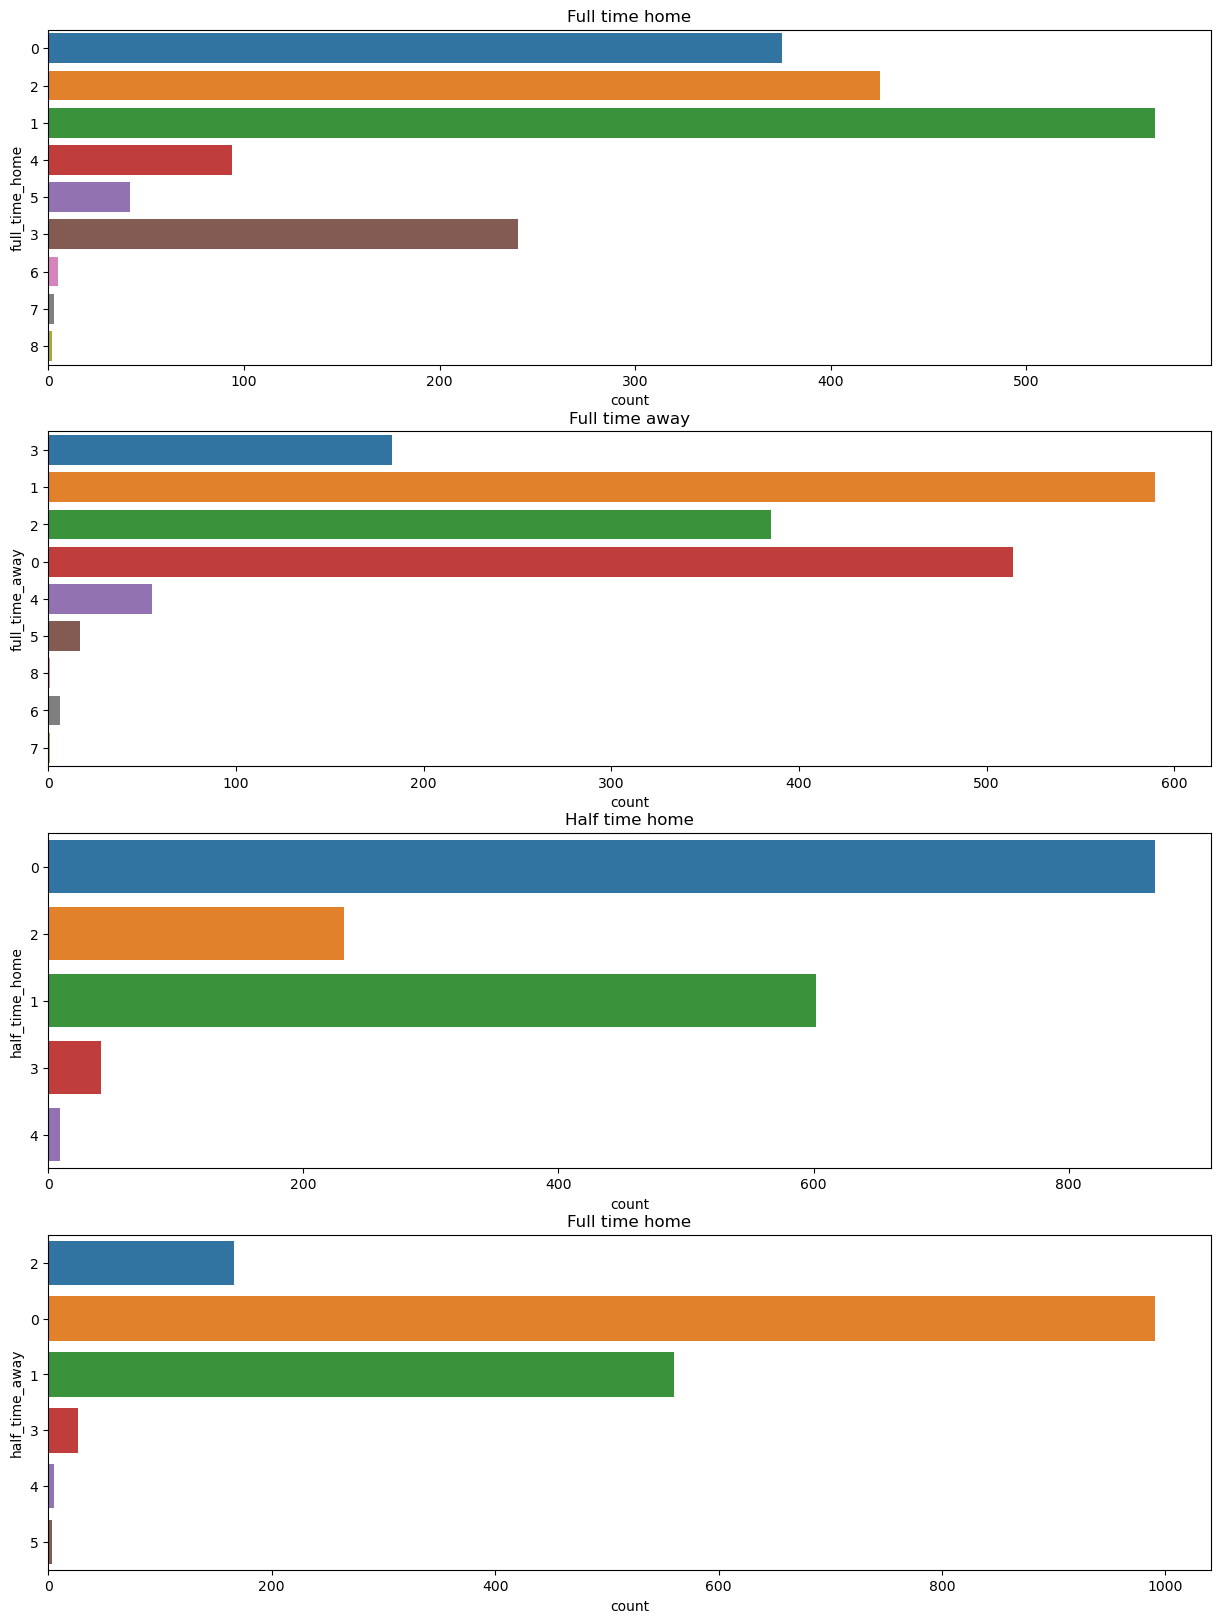

In [68]:
fig,ax=plt.subplots(nrows=4,ncols=1,figsize=(15,20))
ax1=ax[0];ax2=ax[1];ax3=ax[2];ax4=ax[3];

ax1.set_title("Full time home")
sns.countplot(data=df_scores,y=df_scores["full_time_home"].astype(str),hue=df_scores["full_time_home"].astype(str),ax=ax1)

ax2.set_title("Full time away")
sns.countplot(data=df_scores,y=df_scores["full_time_away"].astype(str),hue=df_scores["full_time_away"].astype(str),ax=ax2)

ax3.set_title("Half time home")
sns.countplot(data=df_scores,y=df_scores["half_time_home"].astype(str),hue=df_scores["half_time_home"].astype(str),ax=ax3)

ax4.set_title("Full time home")
sns.countplot(data=df_scores,y=df_scores["half_time_away"].astype(str),hue=df_scores["half_time_away"].astype(str),ax=ax4);

### MULTIVARIABLE DATA ANALYSIS

In [69]:
x = np.array(df_scores["full_time_away"])
y = np.array(df_scores["half_time_away"]) # Correlación positiva perfecta

# Cálculo de la matriz de correlación
matriz_corr = np.corrcoef(x, y)

# El coeficiente de Pearson (r)
r = matriz_corr[0, 1]
print(f"Matriz de correlación:\n{matriz_corr}")
print(f"Coeficiente de Pearson: {r}")
# Salida: 1.0 (relación lineal directa)


Matriz de correlación:
[[1.         0.69062124]
 [0.69062124 1.        ]]
Coeficiente de Pearson: 0.6906212444095178


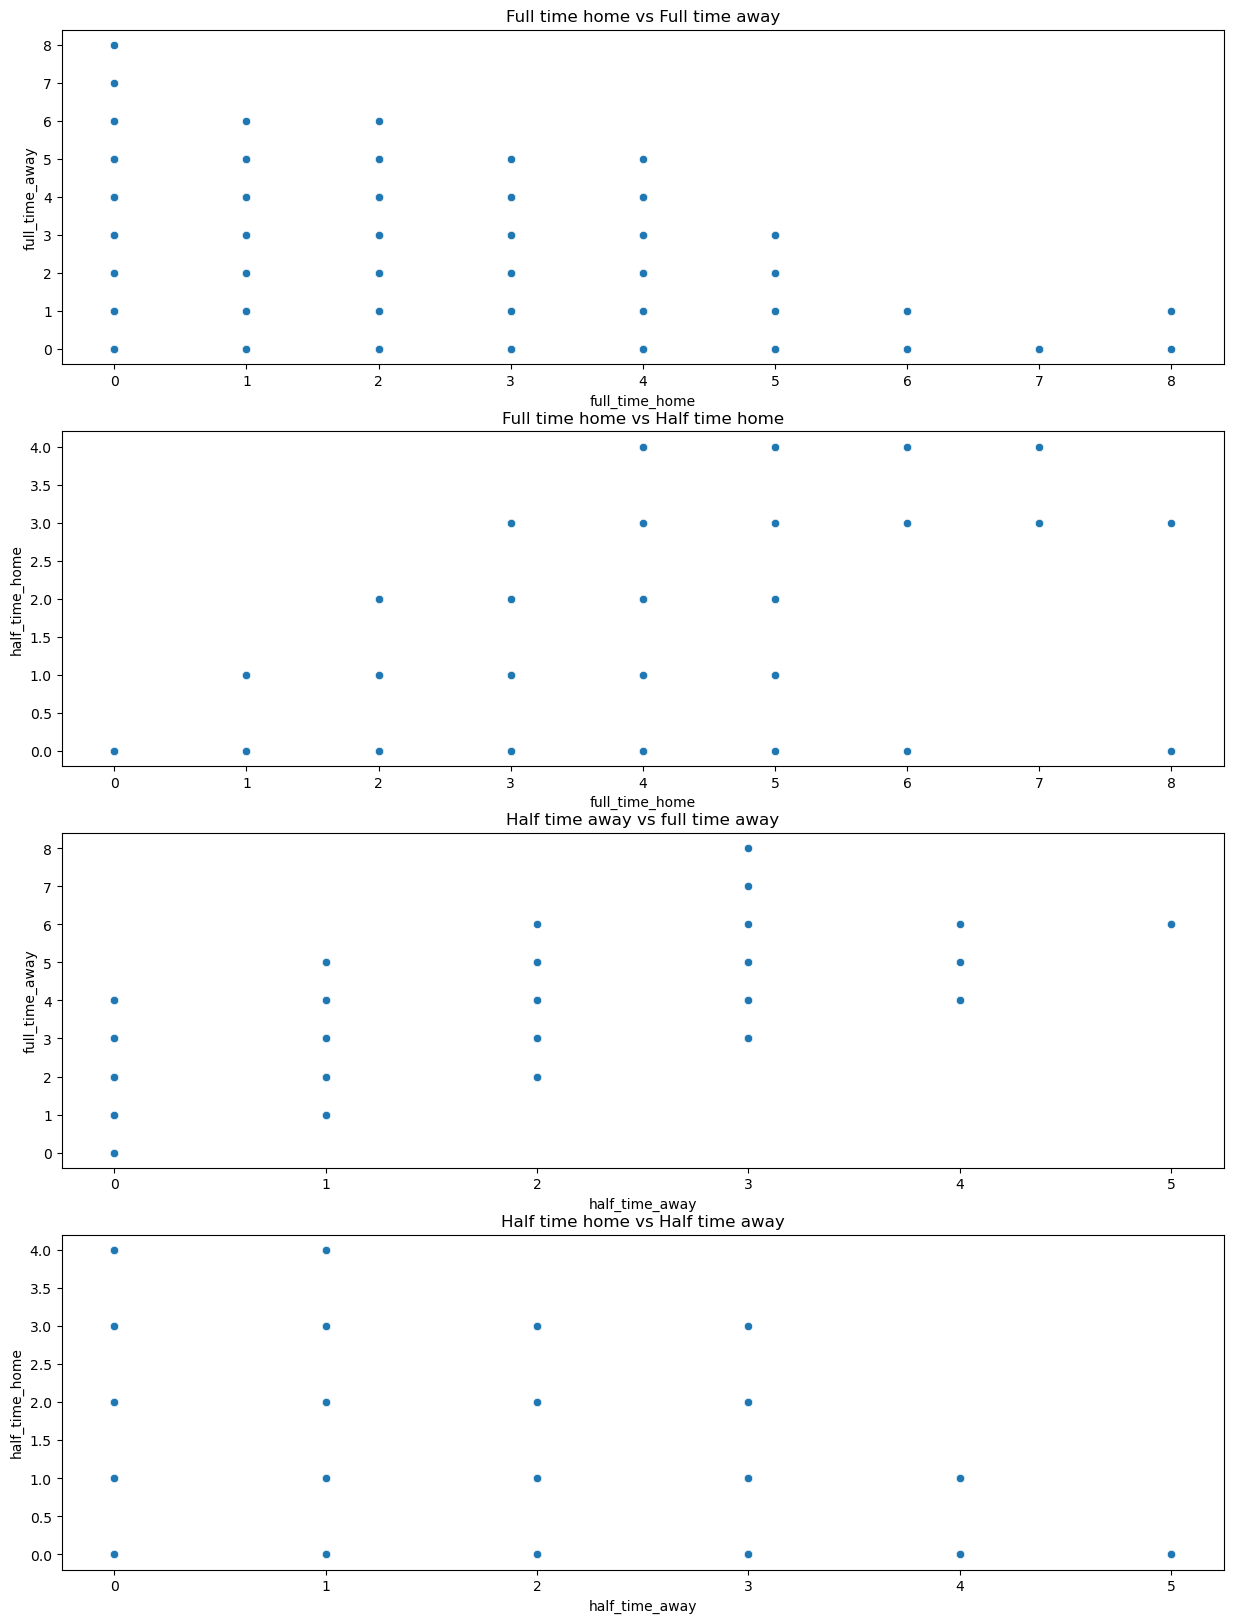

In [70]:
fig,ax=plt.subplots(nrows=4,ncols=1,figsize=(15,20))
ax1=ax[0];ax2=ax[1];ax3=ax[2];ax4=ax[3];

ax1.set_title("Full time home vs Full time away")
sns.scatterplot(data=df_scores,x=df_scores["full_time_home"],y=df_scores["full_time_away"],ax=ax1)

ax2.set_title("Full time home vs Half time home")
sns.scatterplot(data=df_scores,x=df_scores["full_time_home"],y=df_scores["half_time_home"],ax=ax2)

ax3.set_title("Half time away vs full time away")
sns.scatterplot(data=df_scores,x=df_scores["half_time_away"],y=df_scores["full_time_away"],ax=ax3)

ax4.set_title("Half time home vs Half time away")
sns.scatterplot(data=df_scores,x=df_scores["half_time_away"],y=df_scores["half_time_home"],ax=ax4);

### SUMMARY OF SCORES DATASET
**full_time_home:** *The highest number of goals scored in home it was 1 goal (566 goals), 2 goal (425 goals), 0 goal (375 goals), etc. Teams in home scored more numbers of goals in the next order: 1 goal,2 goal,0 goal,etc.*\
**full_time_away:** *The highest number of goals scored away from home was 1 goal (566 goals), 2 goals (425 goals), 0 goals (375 goals), etc. Away teams scored the most goals in the following order: 1 goal, 2 goals, 0 goals, etc.*\
**half_time_home:** *As the home team, the teams scored 0 goals (868 times) in the first half, followed by 1 goal (602 times), 2 goals (232 times), etc. This means that the highest score at home was 0 goals in the first half.*\
**half_time_away:** *As the away team, the teams scored 0 goals (991 goals) in the first half, followed by 1 goal (560 times), 2 goals (166 times). This means that as the away team there was no goals.*\

#### MULTIVARIABLE ANALYSIS
**full_time_home vs full_time_away:** *There is no relationship between these two cases. There is an inverse (negative) relationship; that is, when a team doesn't score goals at home, it will probably score more goals away.*\
**full_time_home vs half_time_home:** *There is a moderate and positive correlation between these two cases. This is obviously because we are talking about the same matches, but with different timeframes. This graph shows cases where teams do not score goals in the first half, but do score them after halftime. Max goals in the first half time it was of 4 goals.*\
**full_time_away vs half_time_away:** *There is a moderate and positive relationship between these two cases. This graph shows cases where teams do not score goals in the first half, but do score them after halftime. Max goals in the first half time it was of 5 goals.*\

## ANALYZING MULTIPLE DATASETS WITH MATCH DATASET

In [71]:

df_matches_all = pd.read_sql("""SELECT matches.matchday,matches.winner,matches.utc_date,scores.full_time_home,scores.full_time_away,seasons.year AS season,
                                leagues.name AS league,leagues.country AS country_league,home_teams.name AS home_teams,away_teams.name AS away_teams, 
                                home_teams.founded_year FROM matches 
                                LEFT JOIN scores ON matches.match_id=scores.match_id 
                                LEFT JOIN seasons ON matches.season_id=seasons.season_id
                                LEFT JOIN leagues ON matches.league_id=leagues.league_id
                                LEFT JOIN teams AS home_teams ON matches.home_team_id=home_teams.team_id
                                LEFT JOIN teams AS away_teams ON matches.away_team_id=away_teams.team_id;""",conn)
df_matches_all

matchday     winner    utc_date  full_time_home  full_time_away  \
0            1  AWAY_TEAM  2023-08-11               0               3   
1            1  HOME_TEAM  2023-08-12               2               1   
2            1       DRAW  2023-08-12               1               1   
3            1  HOME_TEAM  2023-08-12               4               1   
4            1  AWAY_TEAM  2023-08-12               0               1   
...        ...        ...         ...             ...             ...   
1747        34  AWAY_TEAM  2024-05-19               0               3   
1748        34  HOME_TEAM  2024-05-19               2               1   
1749        34       DRAW  2024-05-19               2               2   
1750        34       DRAW  2024-05-19               2               2   
1751        34  HOME_TEAM  2024-05-19               2               1   

         season          league country_league              home_teams  \
0     2023-2024  Premier League        England                 Burnley   
1     2023-2024  Premier League        England                 Arsenal   
2     2023-2024  Premier League        England         AFC Bournemouth   
3     2023-2024  Premier League        England  Brighton & Hove Albion   
4     2023-2024  Premier League        England                 Everton   
...         ...             ...            ...                     ...   
1747  2023-2024         Ligue 1         France             Toulouse FC   
1748  2023-2024         Ligue 1         France      Olympique Lyonnais   
1749  2023-2024         Ligue 1         France               Lille OSC   
1750  2023-2024         Ligue 1         France     Racing Club de Lens   
1751  2023-2024         Ligue 1         France          Stade de Reims   

                 away_teams  founded_year  
0           Manchester City        1881.0  
1         Nottingham Forest        1886.0  
2           West Ham United        1890.0  
3                Luton Town        1898.0  
4                    Fulham        1878.0  
...                     ...           ...  
1747      Stade Brestois 29        1937.0  
1748   RC Strasbourg Alsace        1896.0  
1749               OGC Nice        1944.0  
1750        Montpellier HSC        1906.0  
1751  Stade Rennais FC 1901        1909.0  

[1752 rows x 11 columns]

In [72]:
df_matches_all["utc_date"] = pd.to_datetime(df_matches_all["utc_date"],format="ISO8601")

In [71]:
df_matches_all_dict = df_matches_all.sample(n=1000,random_state=42)
df_matches_all_dict=df_matches_all_dict.to_dict(orient="records")
template=ChatPromptTemplate.from_messages([
    ("system","You are an expert data scientist who analyzes charts and data frames professionally and analytically. You are concise in your answers and provide recommendations and your professional perspective."),
    ("user","Explain the dataset to me clearly and also tell me how to analyze it; that is, what graphs and operations would be useful to apply. The dataset is: {dataset}")    
])
chain=template|llm
response=chain.invoke({"dataset":df_matches_all_dict})
display(Markdown(response.content))

This dataset contains information about football (soccer) matches from various European leagues during the 2023-2024 season. Each entry represents a single match.

**Dataset Explanation:**

*   **`match_id`**: A unique identifier for each match.
*   **`matchday`**: The specific round or week of the league season when the match was played.
*   **`home_team_id`**: A unique identifier for the home team.
*   **`away_team_id`**: A unique identifier for the away team.
*   **`winner`**: The outcome of the match, indicating whether the 'HOME\_TEAM' won, the 'AWAY\_TEAM' won, or it was a 'DRAW'.
*   **`utc_date`**: The date of the match in Coordinated Universal Time (UTC).
*   **`full_time_home`**: The number of goals scored by the home team at the end of regular time.
*   **`full_time_away`**: The number of goals scored by the away team at the end of regular time.
*   **`season`**: The football season to which the match belongs (e.g., '2023-2024').
*   **`league`**: The name of the football league (e.g., 'Premier League', 'Serie A').
*   **`country_league`**: The country where the league is played (e.g., 'England', 'Italy').
*   **`home_teams`**: The name of the home team.
*   **`away_teams`**: The name of the away team.

**How to Analyze It & Useful Graphs/Operations:**

This dataset is ideal for understanding league dynamics, team performance, and home advantage.

**1. Overall League Statistics:**

*   **Operations:**
    *   Calculate the total number of matches, home wins, away wins, and draws.
    *   Calculate the average goals scored per match (total, home, away).
    *   Calculate the overall home advantage (percentage of home wins).
*   **Graphs:**
    *   **Bar Chart**: Distribution of match outcomes (`winner`).
    *   **Histogram**: Distribution of `full_time_home` and `full_time_away` goals to see common scorelines.
    *   **Bar Chart**: Total goals scored per league.

**2. Team Performance Analysis:**

*   **Operations:**
    *   **Feature Engineering**: Create new columns for `total_goals_scored` and `total_goals_conceded` for each team.
    *   **Feature Engineering**: Calculate `points` for each team (e.g., 3 for a win, 1 for a draw, 0 for a loss). This requires processing each match to assign points to both home and away teams.
    *   Group data by team name (both `home_teams` and `away_teams`) to aggregate wins, losses, draws, goals scored, and goals conceded.
    *   Calculate win rate, draw rate, and loss rate for each team.
    *   Determine team strength based on points or goal difference.
*   **Graphs:**
    *   **Bar Chart**: Top N teams by points in each league.
    *   **Bar Chart**: Goals scored/conceded by specific teams.
    *   **Grouped Bar Chart**: Compare home wins vs. away wins for selected teams.

**3. League and Country Comparison:**

*   **Operations:**
    *   Group data by `league` and `country_league`.
    *   Calculate average goals per match, average goal difference, and win/draw/loss percentages for each league/country.
*   **Graphs:**
    *   **Grouped Bar Chart**: Compare home win percentages across different leagues.
    *   **Box Plot**: Distribution of total goals per match across different leagues to assess scoring patterns.

**4. Home Advantage Analysis:**

*   **Operations:**
    *   Calculate the overall percentage of home wins, away wins, and draws.
    *   Calculate the average goal difference for home teams (`full_time_home - full_time_away`).
*   **Graphs:**
    *   **Pie Chart/Bar Chart**: Visualise the proportion of Home Wins, Away Wins, and Draws.

**Professional Perspective:**

This dataset provides a solid foundation for descriptive analytics in football. For deeper insights, consider:

*   **Season-long aggregation**: With more match data for a full season, you could build a comprehensive league table including points, goal difference, and form.
*   **Temporal trends**: If you had data across multiple seasons, you could analyze how team performance or league characteristics evolve over time.
*   **Feature engineering**: The `matchday` and `utc_date` fields could be used to analyze trends over the course of a season, such as teams improving or declining.
*   **Predictive modeling**: While this sample is small, a larger dataset could be used to build models to predict match outcomes based on historical performance.

### EXPLORATORY DATA ANALYSIS (EDA)

In [73]:
df_matches_all.isnull().sum()

matchday           0
winner             0
utc_date           0
full_time_home     0
full_time_away     0
season             0
league             0
country_league     0
home_teams         0
away_teams         0
founded_year      19
dtype: int64

In [74]:
df_matches_all.describe()

matchday                       utc_date  full_time_home  \
count  1752.000000                           1752     1752.000000   
mean     18.801370  2024-01-06 12:21:22.191780864        1.591895   
min       1.000000            2023-08-11 00:00:00        0.000000   
25%      10.000000            2023-10-28 00:00:00        1.000000   
50%      19.000000            2024-01-12 00:00:00        1.000000   
75%      28.000000            2024-03-17 00:00:00        2.000000   
max      38.000000            2024-06-02 00:00:00        8.000000   
std      10.622618                            NaN        1.307887   

       full_time_away  founded_year  
count     1752.000000   1733.000000  
mean         1.292808   1907.466244  
min          0.000000   1846.000000  
25%          0.000000   1896.000000  
50%          1.000000   1905.000000  
75%          2.000000   1920.000000  
max          8.000000   2009.000000  
std          1.190767     24.281729

In [75]:
df_matches_home=df_matches_all.groupby(by="home_teams")["full_time_home"].sum().reset_index().head(10)
df_matches_home=df_matches_home.sort_values(by="full_time_home",ascending=False)

df_matches_away=df_matches_all.groupby(by="away_teams")["full_time_away"].sum().reset_index().head(10)
df_matches_away=df_matches_away.sort_values(by="full_time_away",ascending=False)

df_matches_home_low=df_matches_all.groupby(by="home_teams")["full_time_home"].sum().reset_index().tail(10)
df_matches_home_low=df_matches_home_low.sort_values(by="full_time_home",ascending=True)

df_matches_away_low=df_matches_all.groupby(by="away_teams")["full_time_away"].sum().reset_index().tail(10)
df_matches_away_low=df_matches_away_low.sort_values(by="full_time_away",ascending=True)

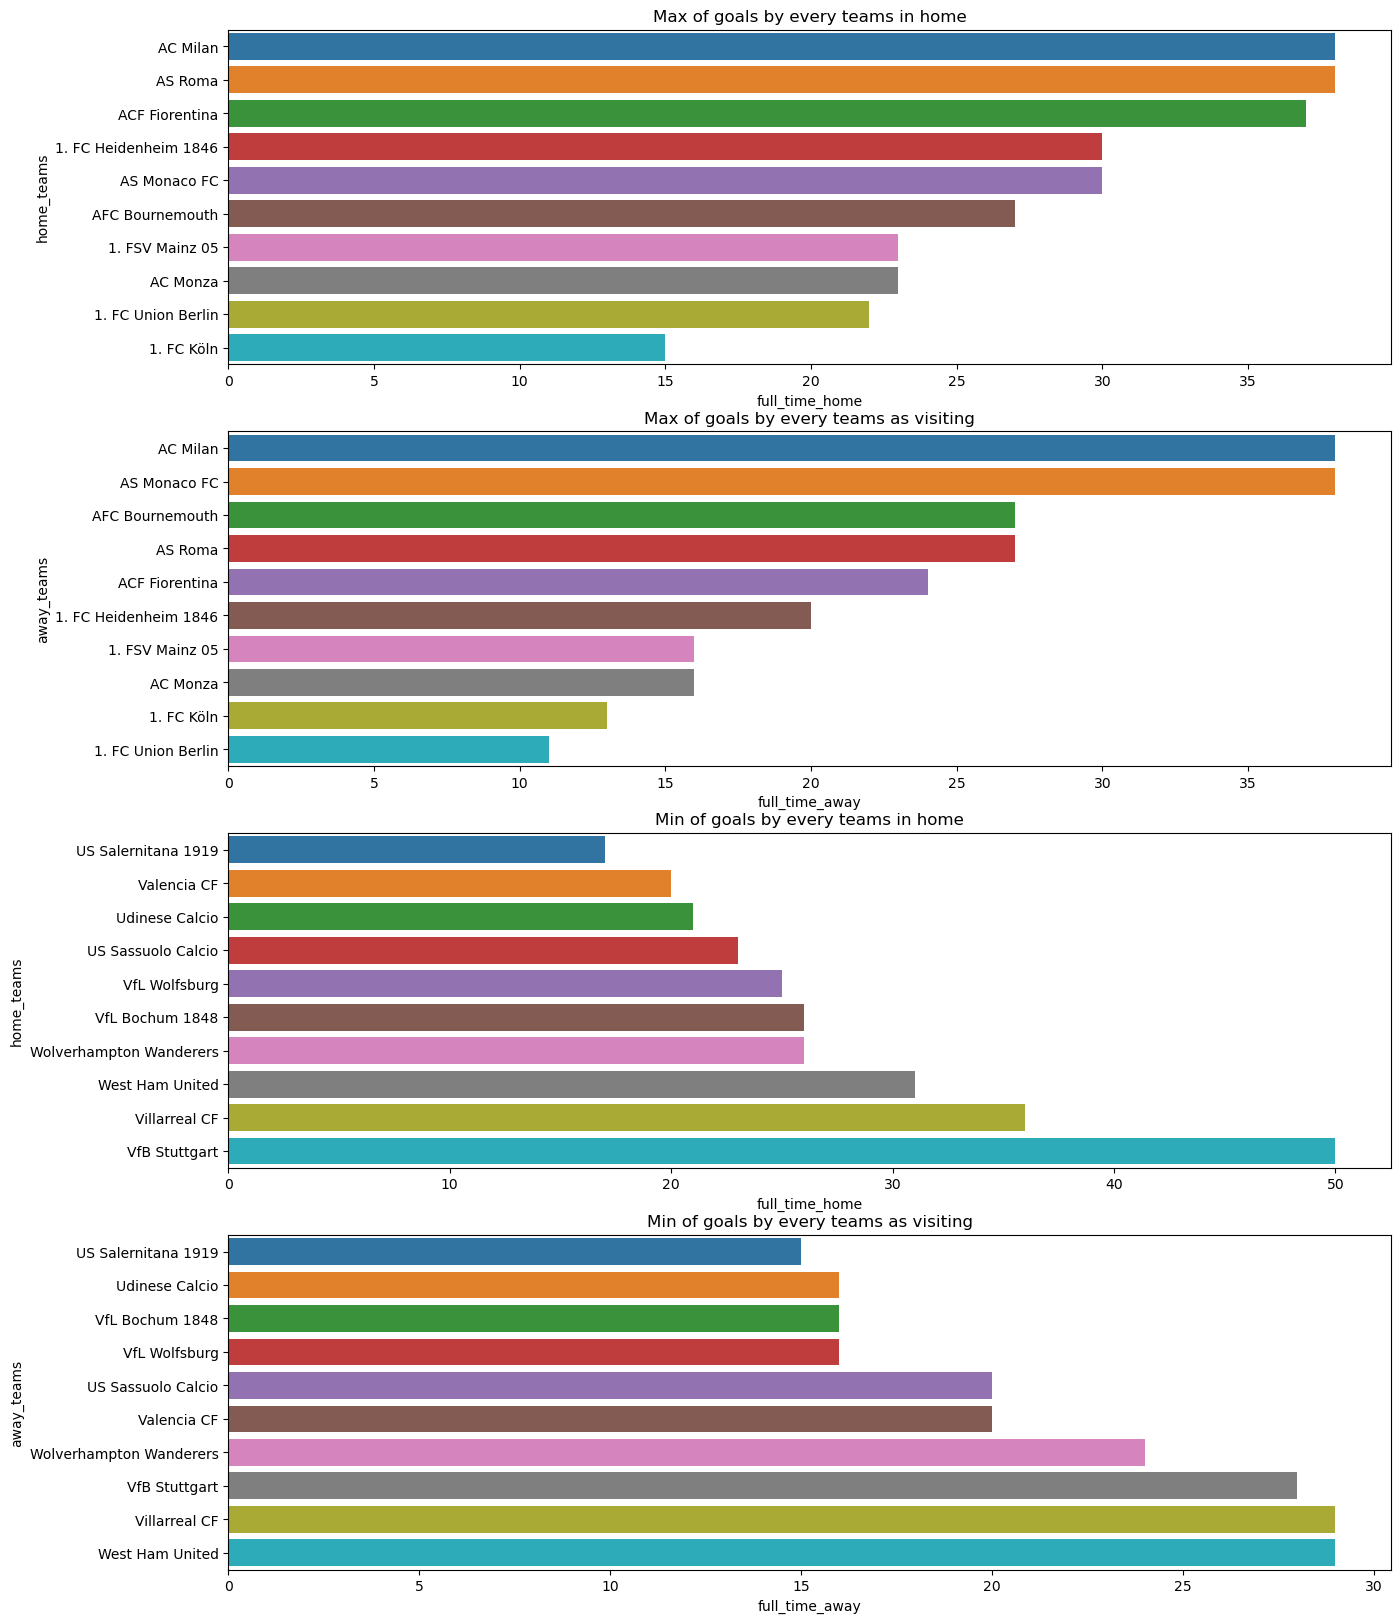

In [76]:
fig,ax=plt.subplots(nrows=4,ncols=1,figsize=(15,20))
ax1=ax[0];ax2=ax[1];ax3=ax[2];ax4=ax[3];

ax1.set_title("Max of goals by every teams in home")
sns.barplot(data=df_matches_home,x="full_time_home",y="home_teams",hue="home_teams",ax=ax1)

ax2.set_title("Max of goals by every teams as visiting")
sns.barplot(data=df_matches_away,x="full_time_away",y="away_teams",hue="away_teams",ax=ax2)

ax3.set_title("Min of goals by every teams in home")
sns.barplot(data=df_matches_home_low,x="full_time_home",y="home_teams",hue="home_teams",ax=ax3)

ax4.set_title("Min of goals by every teams as visiting")
sns.barplot(data=df_matches_away_low,x="full_time_away",y="away_teams",hue="away_teams",ax=ax4);

#### PREMIER LEAGUE ANALYSIS

In [77]:
premier_league=df_matches_all.loc[df_matches_all["league"]=="Premier League"].copy()
df_test = premier_league.groupby(by="home_teams")["full_time_home"].sum().reset_index()
df_test2=premier_league.groupby(by="away_teams")["full_time_away"].sum().reset_index()
df_premier_league=df_test.copy()
df_premier_league["full_time_away"]=df_test2["full_time_away"]
df_premier_league["total_goals"]=df_premier_league["full_time_home"]+df_premier_league["full_time_away"]
df_premier_league=df_premier_league.sort_values(by="total_goals",ascending=False)

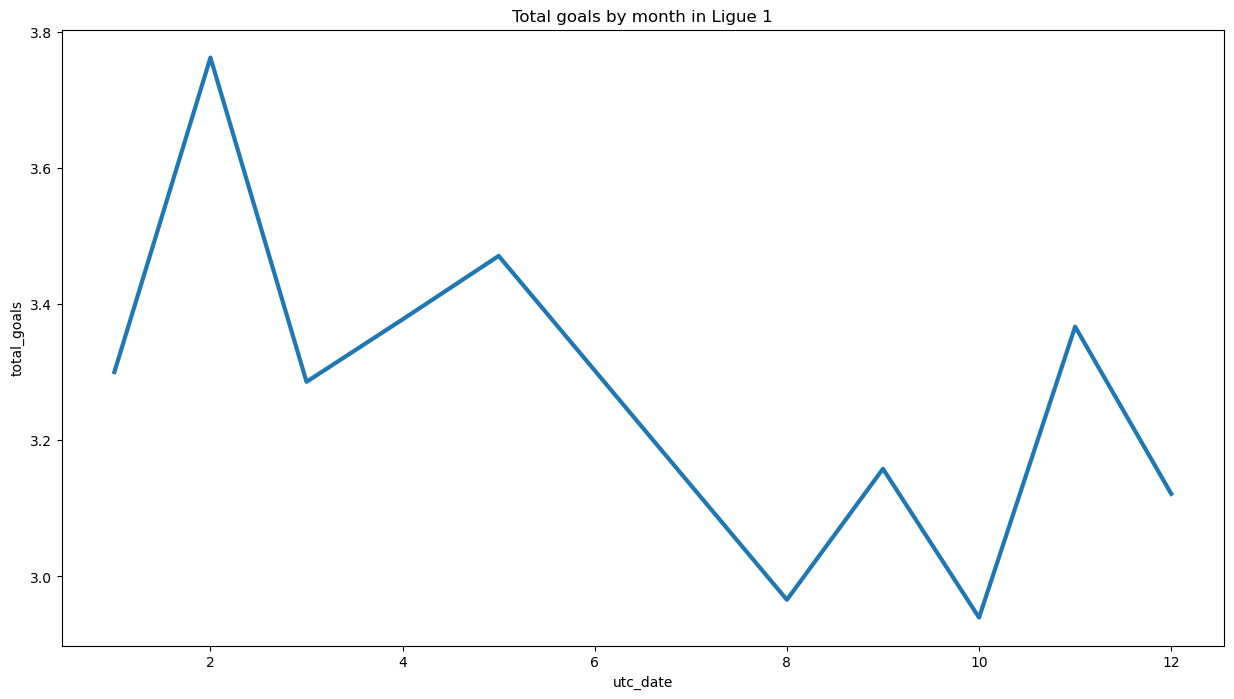

In [78]:
premier_league.loc[:,"total_goals"]=(premier_league["full_time_home"]+premier_league["full_time_away"])
plt.figure(figsize=(15,8))
plt.title("Total goals by month in Ligue 1")
sns.lineplot(data=premier_league,x=premier_league["utc_date"].dt.month,y=premier_league["total_goals"],linestyle="-",errorbar=None,linewidth=3);

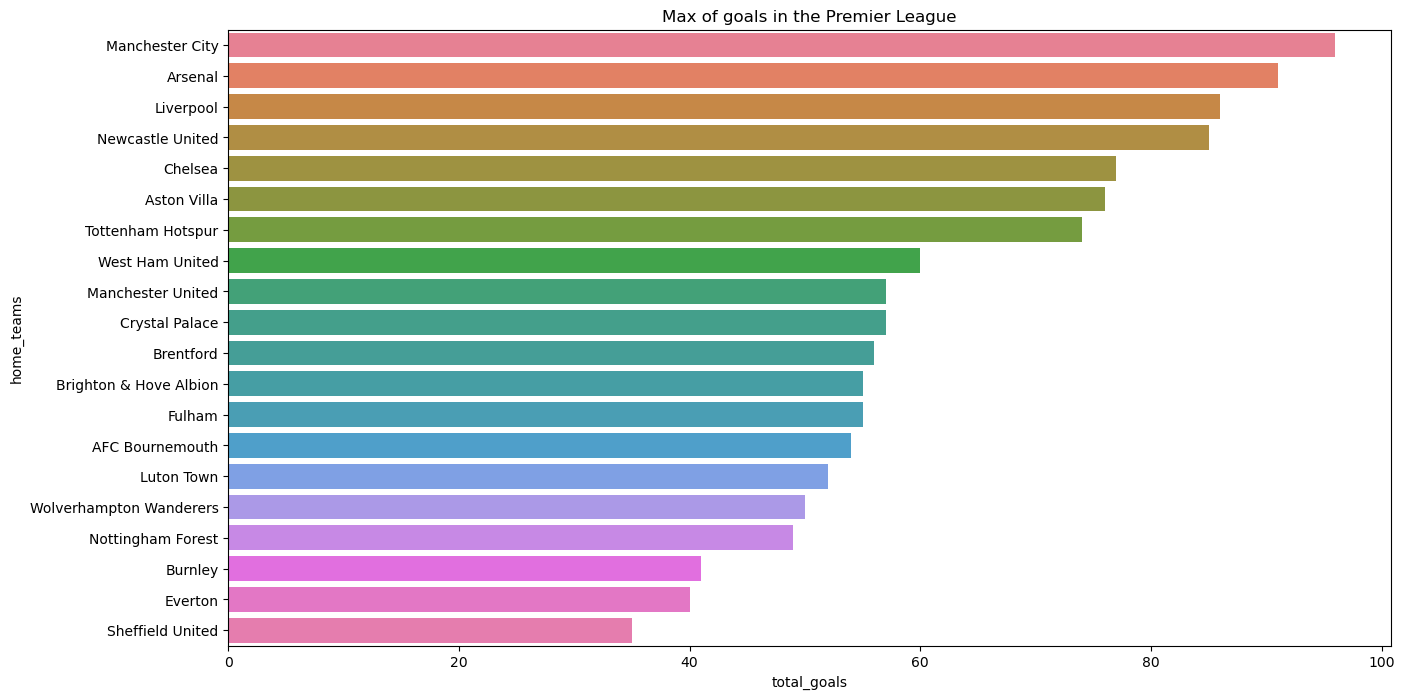

In [79]:
plt.figure(figsize=(15,8))

plt.title("Max of goals in the Premier League")
sns.barplot(data=df_premier_league,x="total_goals",y="home_teams",hue="home_teams");

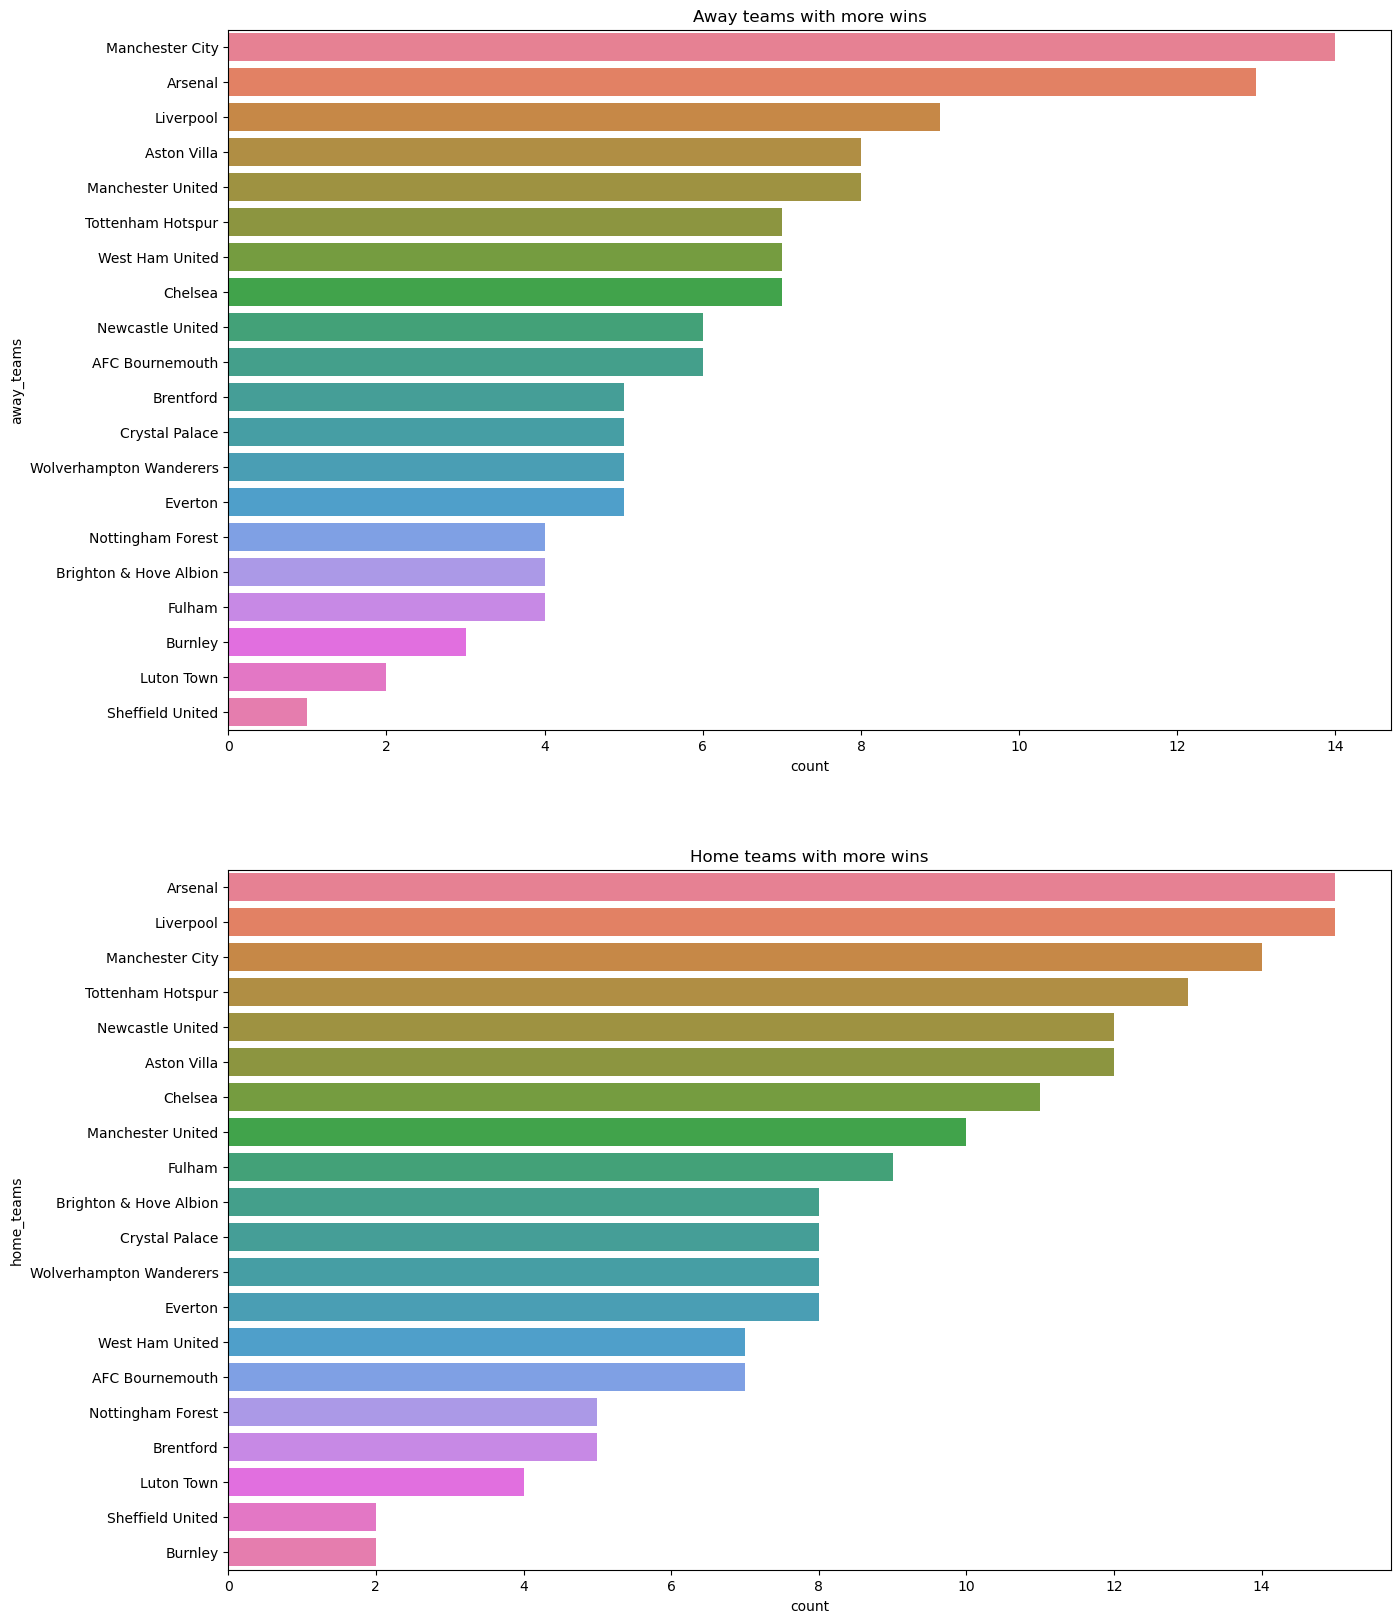

In [80]:
premier_league_away=premier_league[premier_league["winner"]=="AWAY_TEAM"]
premier_league_away=premier_league_away["away_teams"].value_counts().reset_index() 

premier_league_home=premier_league[premier_league["winner"]=="HOME_TEAM"]
premier_league_home=premier_league_home["home_teams"].value_counts().reset_index()

fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,20))
ax1=ax[0];ax2=ax[1];

ax1.set_title("Away teams with more wins")
sns.barplot(data=premier_league_away,x="count",y="away_teams",hue="away_teams",ax=ax1)

ax2.set_title("Home teams with more wins")
sns.barplot(data=premier_league_home,x="count",y="home_teams",hue="home_teams",ax=ax2);

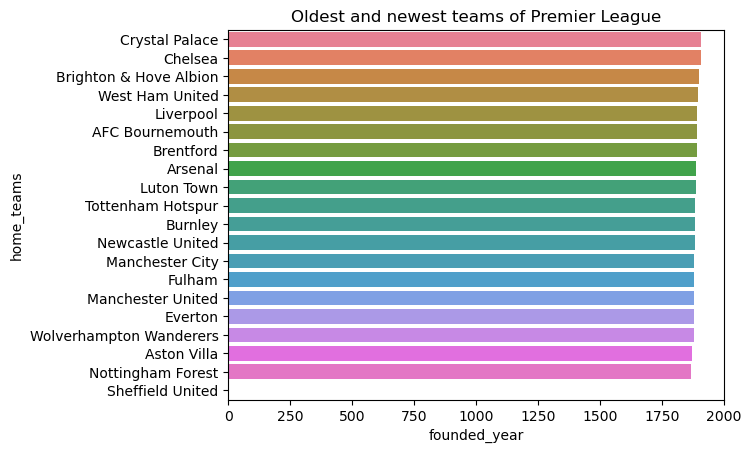

In [81]:
premier_league_year=premier_league.sort_values(by="founded_year",ascending=False)
premier_league_year.drop_duplicates(subset="home_teams",inplace=True)
plt.title("Oldest and newest teams of Premier League")
sns.barplot(data=premier_league_year,y=premier_league_year["home_teams"],x=premier_league_year["founded_year"],hue="home_teams");

In [82]:
premier_league.groupby(by="home_teams")["full_time_home"].mean()

home_teams
AFC Bournemouth            1.421053
Arsenal                    2.526316
Aston Villa                2.526316
Brentford                  1.526316
Brighton & Hove Albion     1.578947
Burnley                    1.000000
Chelsea                    2.315789
Crystal Palace             1.947368
Everton                    1.157895
Fulham                     1.631579
Liverpool                  2.578947
Luton Town                 1.473684
Manchester City            2.684211
Manchester United          1.631579
Newcastle United           2.578947
Nottingham Forest          1.421053
Sheffield United           1.000000
Tottenham Hotspur          2.000000
West Ham United            1.631579
Wolverhampton Wanderers    1.368421
Name: full_time_home, dtype: float64

In [83]:
s=df_premier_league.copy()
f=premier_league.groupby(by="home_teams")["full_time_home"].mean().reset_index()
#f.sort_values(by="full_time_home",ascending=False,inplace=True)
#s.loc[:,"goals_mean"]=f["full_time_home"]
j=pd.merge(s,f,on="home_teams",how="left")
j

home_teams  full_time_home_x  full_time_away  total_goals  \
0           Manchester City                51              45           96   
1                   Arsenal                48              43           91   
2                 Liverpool                49              37           86   
3          Newcastle United                49              36           85   
4                   Chelsea                44              33           77   
5               Aston Villa                48              28           76   
6         Tottenham Hotspur                38              36           74   
7           West Ham United                31              29           60   
8         Manchester United                31              26           57   
9            Crystal Palace                37              20           57   
10                Brentford                29              27           56   
11   Brighton & Hove Albion                30              25           55   
12                   Fulham                31              24           55   
13          AFC Bournemouth                27              27           54   
14               Luton Town                28              24           52   
15  Wolverhampton Wanderers                26              24           50   
16        Nottingham Forest                27              22           49   
17                  Burnley                19              22           41   
18                  Everton                22              18           40   
19         Sheffield United                19              16           35   

    full_time_home_y  
0           2.684211  
1           2.526316  
2           2.578947  
3           2.578947  
4           2.315789  
5           2.526316  
6           2.000000  
7           1.631579  
8           1.631579  
9           1.947368  
10          1.526316  
11          1.578947  
12          1.631579  
13          1.421053  
14          1.473684  
15          1.368421  
16          1.421053  
17          1.000000  
18          1.157895  
19          1.000000

In [84]:
premier_league

matchday     winner   utc_date  full_time_home  full_time_away  \
0           1  AWAY_TEAM 2023-08-11               0               3   
1           1  HOME_TEAM 2023-08-12               2               1   
2           1       DRAW 2023-08-12               1               1   
3           1  HOME_TEAM 2023-08-12               4               1   
4           1  AWAY_TEAM 2023-08-12               0               1   
..        ...        ...        ...             ...             ...   
375        38  HOME_TEAM 2024-05-19               5               0   
376        38  HOME_TEAM 2024-05-19               2               0   
377        38  AWAY_TEAM 2024-05-19               2               4   
378        38  HOME_TEAM 2024-05-19               3               1   
379        38  AWAY_TEAM 2024-05-19               0               3   

        season          league country_league              home_teams  \
0    2023-2024  Premier League        England                 Burnley   
1    2023-2024  Premier League        England                 Arsenal   
2    2023-2024  Premier League        England         AFC Bournemouth   
3    2023-2024  Premier League        England  Brighton & Hove Albion   
4    2023-2024  Premier League        England                 Everton   
..         ...             ...            ...                     ...   
375  2023-2024  Premier League        England          Crystal Palace   
376  2023-2024  Premier League        England               Liverpool   
377  2023-2024  Premier League        England              Luton Town   
378  2023-2024  Premier League        England         Manchester City   
379  2023-2024  Premier League        England        Sheffield United   

                  away_teams  founded_year  total_goals  
0            Manchester City        1881.0            3  
1          Nottingham Forest        1886.0            3  
2            West Ham United        1890.0            2  
3                 Luton Town        1898.0            5  
4                     Fulham        1878.0            1  
..                       ...           ...          ...  
375              Aston Villa        1905.0            5  
376  Wolverhampton Wanderers        1892.0            2  
377                   Fulham        1885.0            6  
378          West Ham United        1880.0            4  
379        Tottenham Hotspur           NaN            3  

[380 rows x 12 columns]

#### SERIE A ANALYSIS

In [85]:
serieA=df_matches_all.loc[df_matches_all["league"]=="Serie A"].copy()
df_test = serieA.groupby(by="home_teams")["full_time_home"].sum().reset_index()
df_test2=serieA.groupby(by="away_teams")["full_time_away"].sum().reset_index()
df_serieA=df_test.copy()
df_serieA["full_time_away"]=df_test2["full_time_away"]
df_serieA["total_goals"]=df_serieA["full_time_home"]+df_serieA["full_time_away"]
df_serieA=df_serieA.sort_values(by="total_goals",ascending=False)

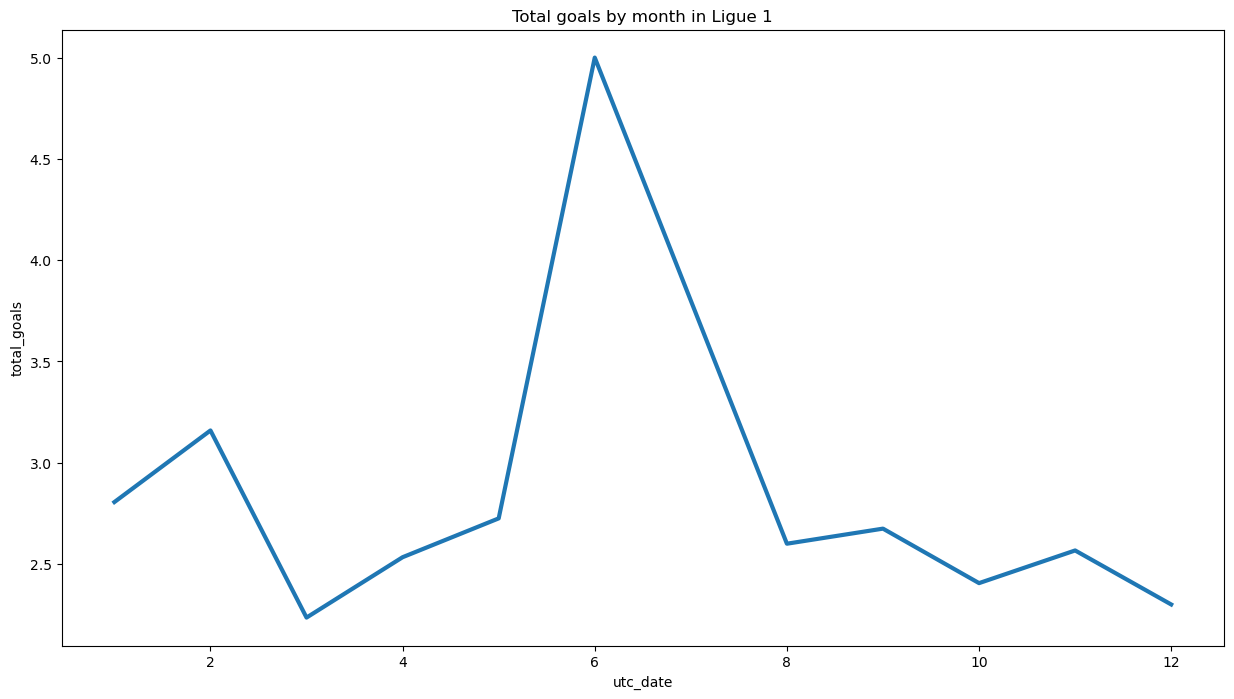

In [86]:
serieA.loc[:,"total_goals"]=(serieA["full_time_home"]+serieA["full_time_away"])
plt.figure(figsize=(15,8))
plt.title("Total goals by month in Ligue 1")
sns.lineplot(data=serieA,x=serieA["utc_date"].dt.month,y=serieA["total_goals"],linestyle="-",errorbar=None,linewidth=3);

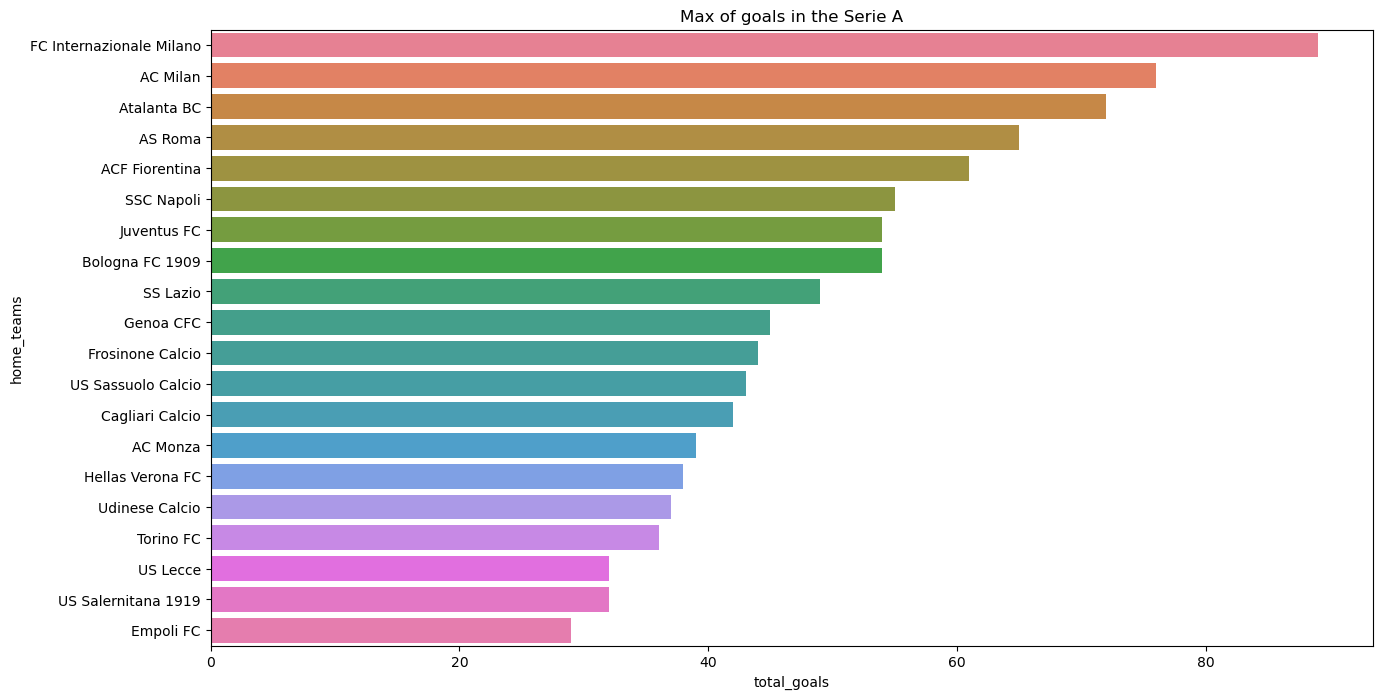

In [87]:
plt.figure(figsize=(15,8))

plt.title("Max of goals in the Serie A")
sns.barplot(data=df_serieA,x="total_goals",y="home_teams",hue="home_teams");

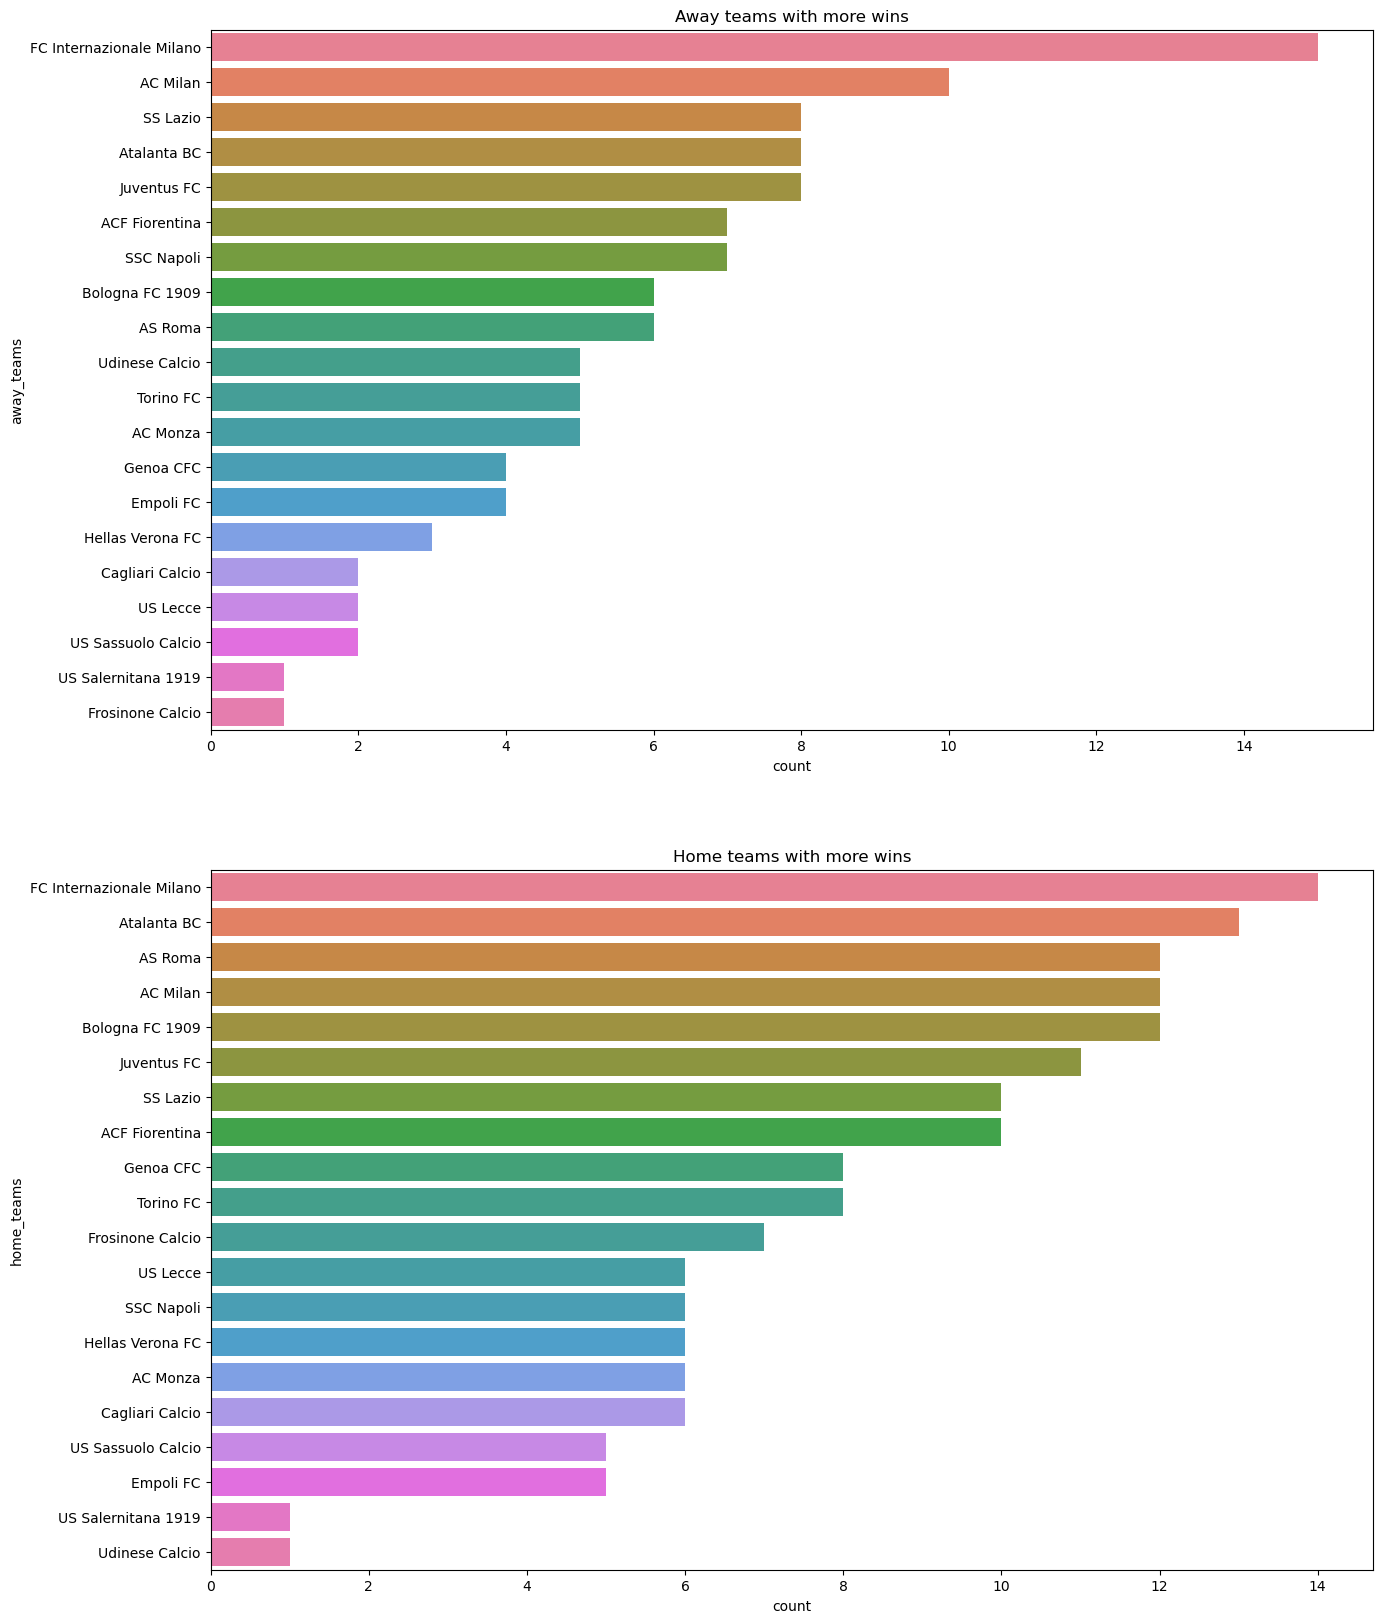

In [88]:
serieA_away=serieA[serieA["winner"]=="AWAY_TEAM"]
serieA_away=serieA_away["away_teams"].value_counts().reset_index() 

serieA_home=serieA[serieA["winner"]=="HOME_TEAM"]
serieA_home=serieA_home["home_teams"].value_counts().reset_index()

fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,20))
ax1=ax[0];ax2=ax[1];

ax1.set_title("Away teams with more wins")
sns.barplot(data=serieA_away,x="count",y="away_teams",hue="away_teams",ax=ax1)

ax2.set_title("Home teams with more wins")
sns.barplot(data=serieA_home,x="count",y="home_teams",hue="home_teams",ax=ax2);

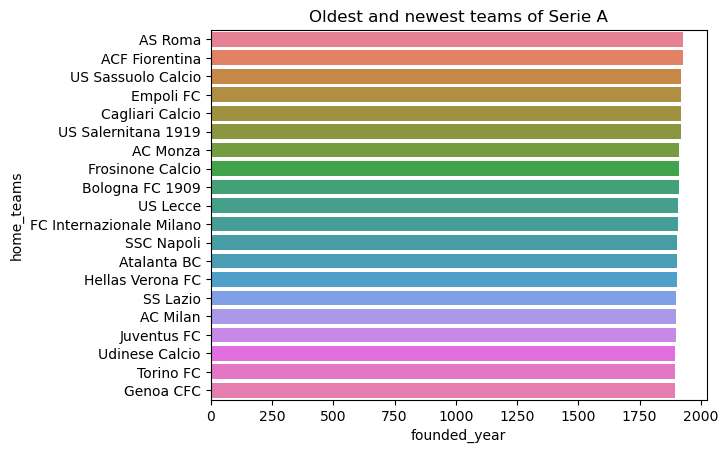

In [89]:
serieA_year=serieA.sort_values(by="founded_year",ascending=False)
serieA_year.drop_duplicates(subset="home_teams",inplace=True)
plt.title("Oldest and newest teams of Serie A")
sns.barplot(data=serieA_year,y="home_teams",x="founded_year",hue="home_teams");

#### LA LIGA ANALYSIS

In [90]:
laLiga=df_matches_all.loc[df_matches_all["league"]=="La Liga"].copy()
df_test = laLiga.groupby(by="home_teams")["full_time_home"].sum().reset_index()
df_test2=laLiga.groupby(by="away_teams")["full_time_away"].sum().reset_index()
df_laLiga=df_test.copy()
df_laLiga["full_time_away"]=df_test2["full_time_away"]
df_laLiga["total_goals"]=df_laLiga["full_time_home"]+df_laLiga["full_time_away"]
df_laLiga=df_laLiga.sort_values(by="total_goals",ascending=False)

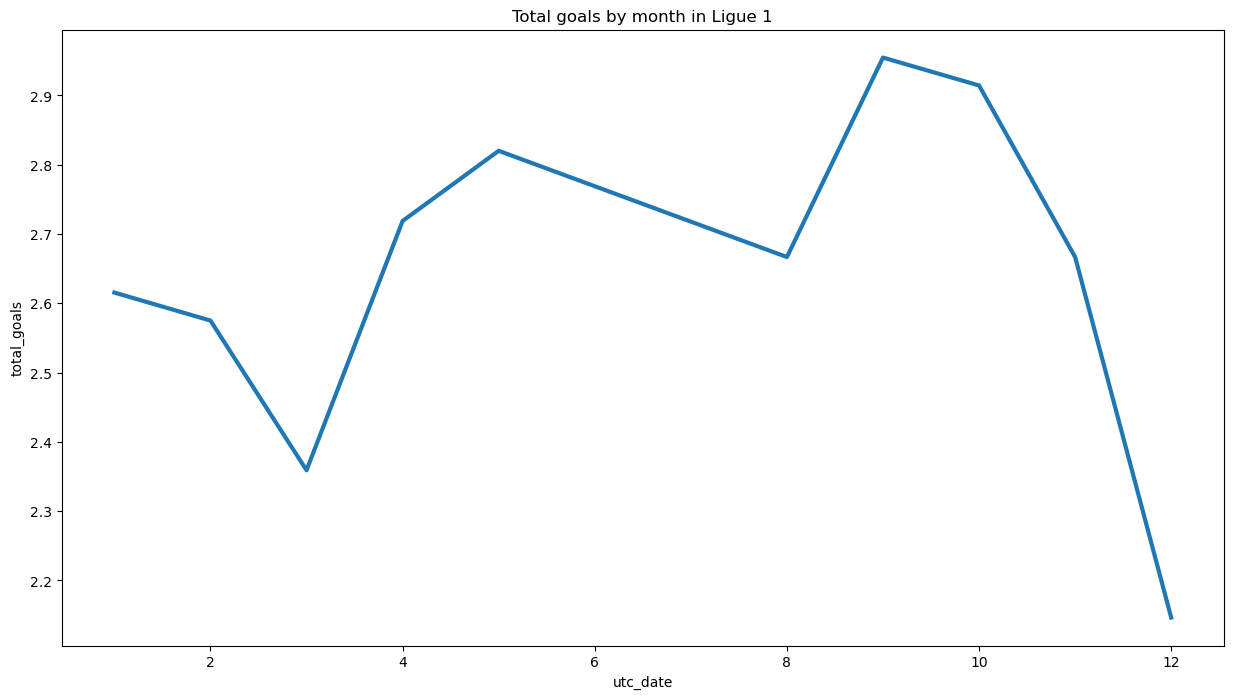

In [91]:
laLiga.loc[:,"total_goals"]=(laLiga["full_time_home"]+laLiga["full_time_away"])
plt.figure(figsize=(15,8))
plt.title("Total goals by month in Ligue 1")
sns.lineplot(data=laLiga,x=laLiga["utc_date"].dt.month,y=laLiga["total_goals"],linestyle="-",errorbar=None,linewidth=3);

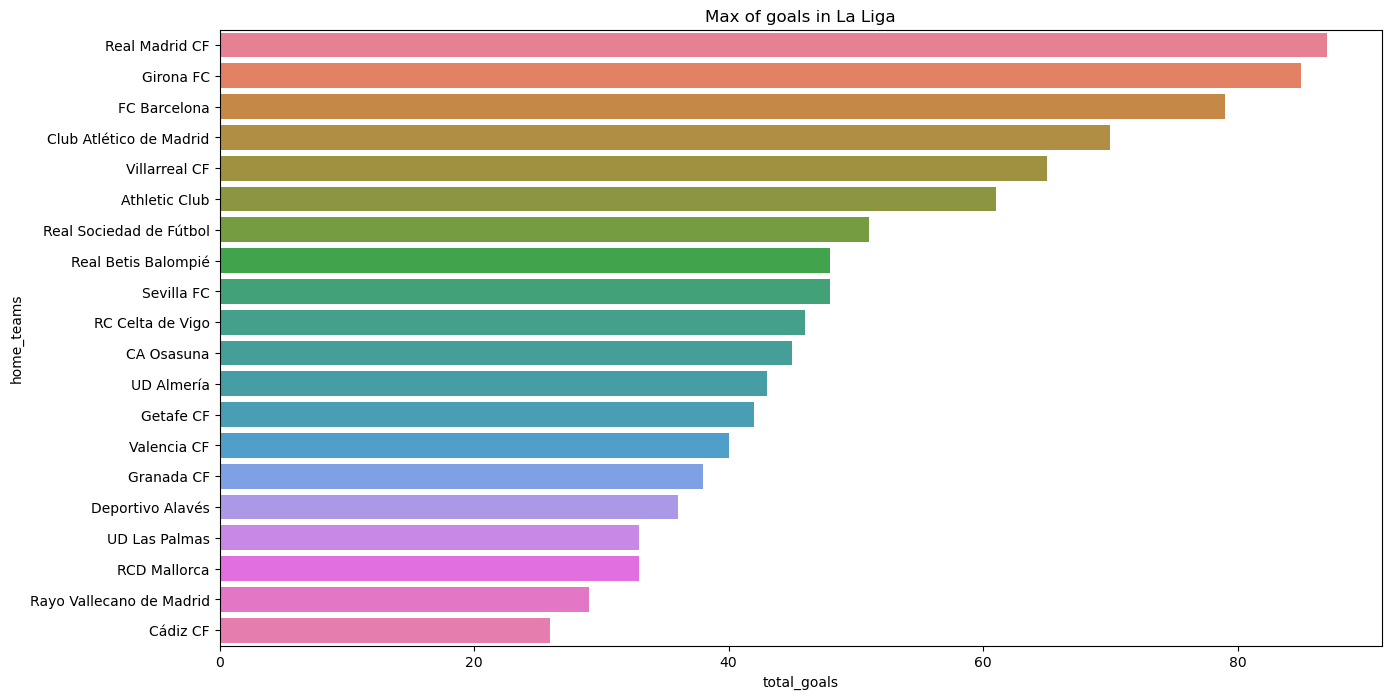

In [92]:
plt.figure(figsize=(15,8))
plt.title("Max of goals in La Liga")
sns.barplot(data=df_laLiga,x="total_goals",y="home_teams",hue="home_teams");

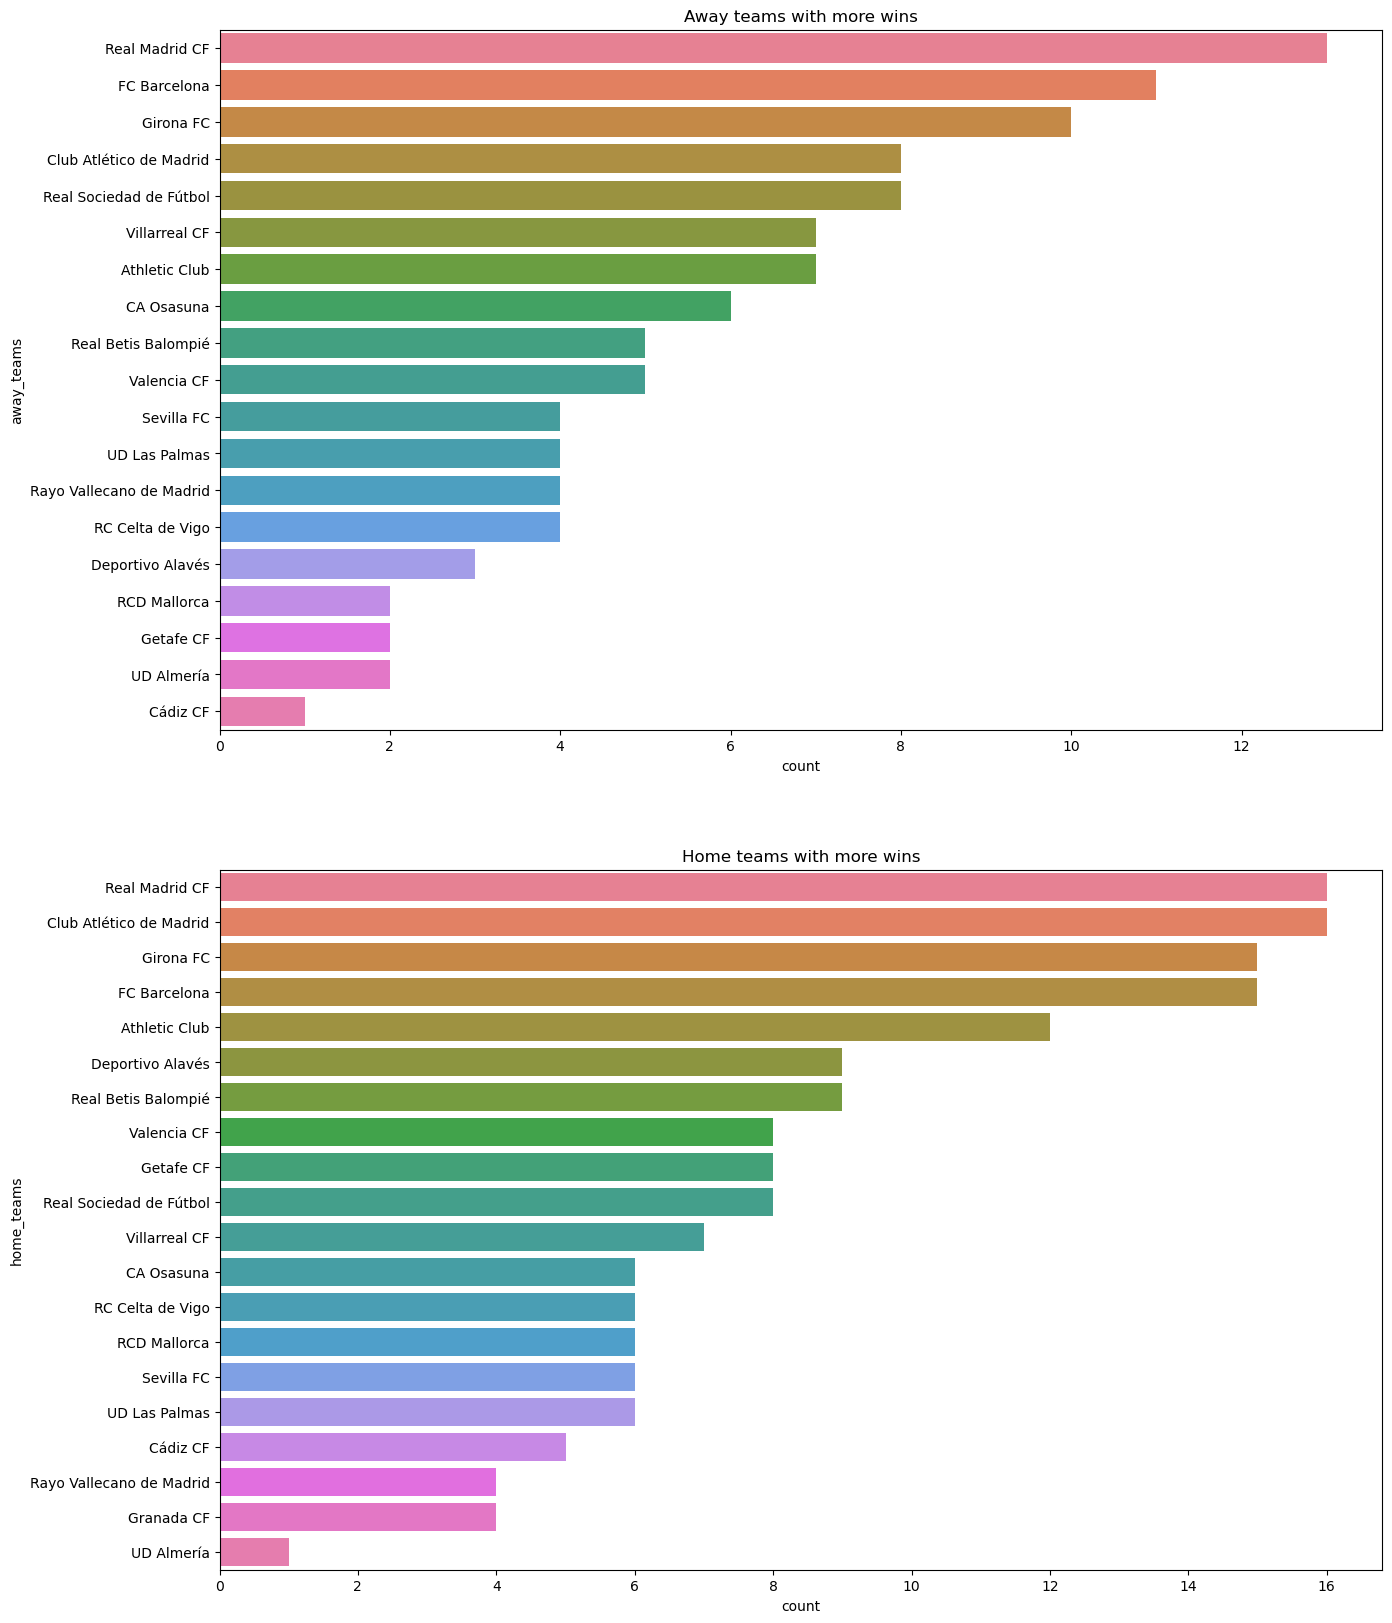

In [93]:
laLiga_away=laLiga[laLiga["winner"]=="AWAY_TEAM"]
laLiga_away=laLiga_away["away_teams"].value_counts().reset_index() 

laLiga_home=laLiga[laLiga["winner"]=="HOME_TEAM"]
laLiga_home=laLiga_home["home_teams"].value_counts().reset_index()

fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,20))
ax1=ax[0];ax2=ax[1];

ax1.set_title("Away teams with more wins")
sns.barplot(data=laLiga_away,x="count",y="away_teams",hue="away_teams",ax=ax1)

ax2.set_title("Home teams with more wins")
sns.barplot(data=laLiga_home,x="count",y="home_teams",hue="home_teams",ax=ax2);

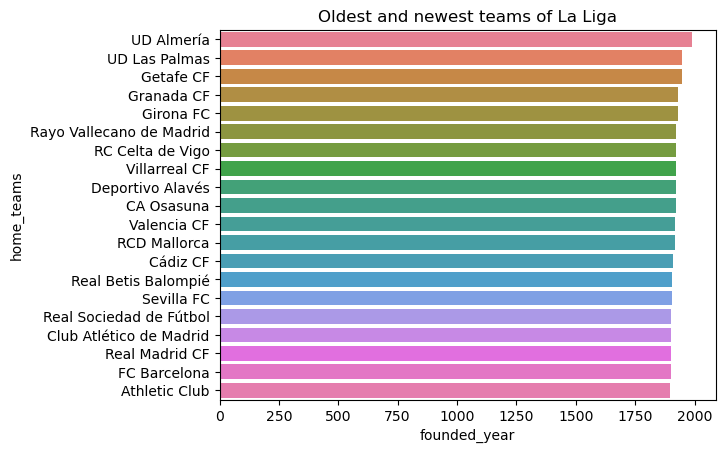

In [94]:
laLiga_year=laLiga.sort_values(by="founded_year",ascending=False)
laLiga_year.drop_duplicates(subset="home_teams",inplace=True)
plt.title("Oldest and newest teams of La Liga")
sns.barplot(data=laLiga_year,y="home_teams",x="founded_year",hue="home_teams");

#### BUNDESLIGA ANALYSIS

In [95]:
bundesliga=df_matches_all.loc[df_matches_all["league"]=="Bundesliga"].copy()
df_test = bundesliga.groupby(by="home_teams")["full_time_home"].sum().reset_index()
df_test2=bundesliga.groupby(by="away_teams")["full_time_away"].sum().reset_index()
df_bundesliga=df_test.copy()
df_bundesliga["full_time_away"]=df_test2["full_time_away"]
df_bundesliga["total_goals"]=df_bundesliga["full_time_home"]+df_bundesliga["full_time_away"]
df_bundesliga=df_bundesliga.sort_values(by="total_goals",ascending=False)

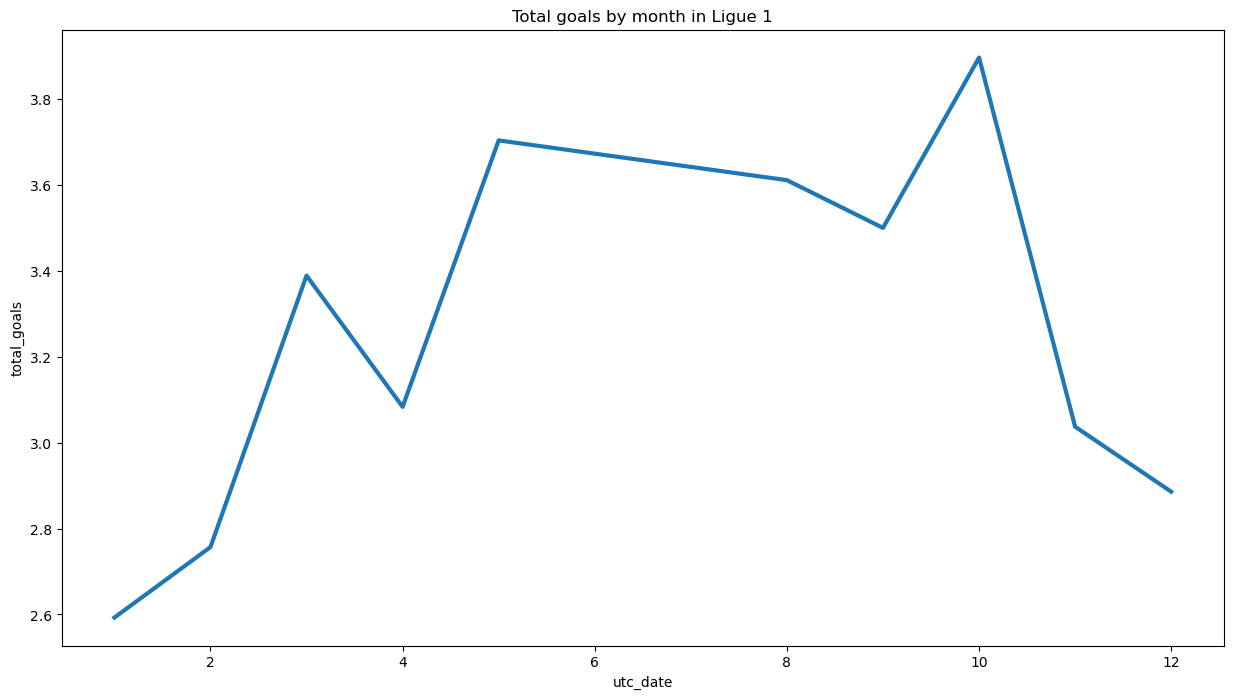

In [96]:
bundesliga.loc[:,"total_goals"]=(bundesliga["full_time_home"]+bundesliga["full_time_away"])
plt.figure(figsize=(15,8))
plt.title("Total goals by month in Ligue 1")
sns.lineplot(data=bundesliga,x=bundesliga["utc_date"].dt.month,y=bundesliga["total_goals"],linestyle="-",errorbar=None,linewidth=3);

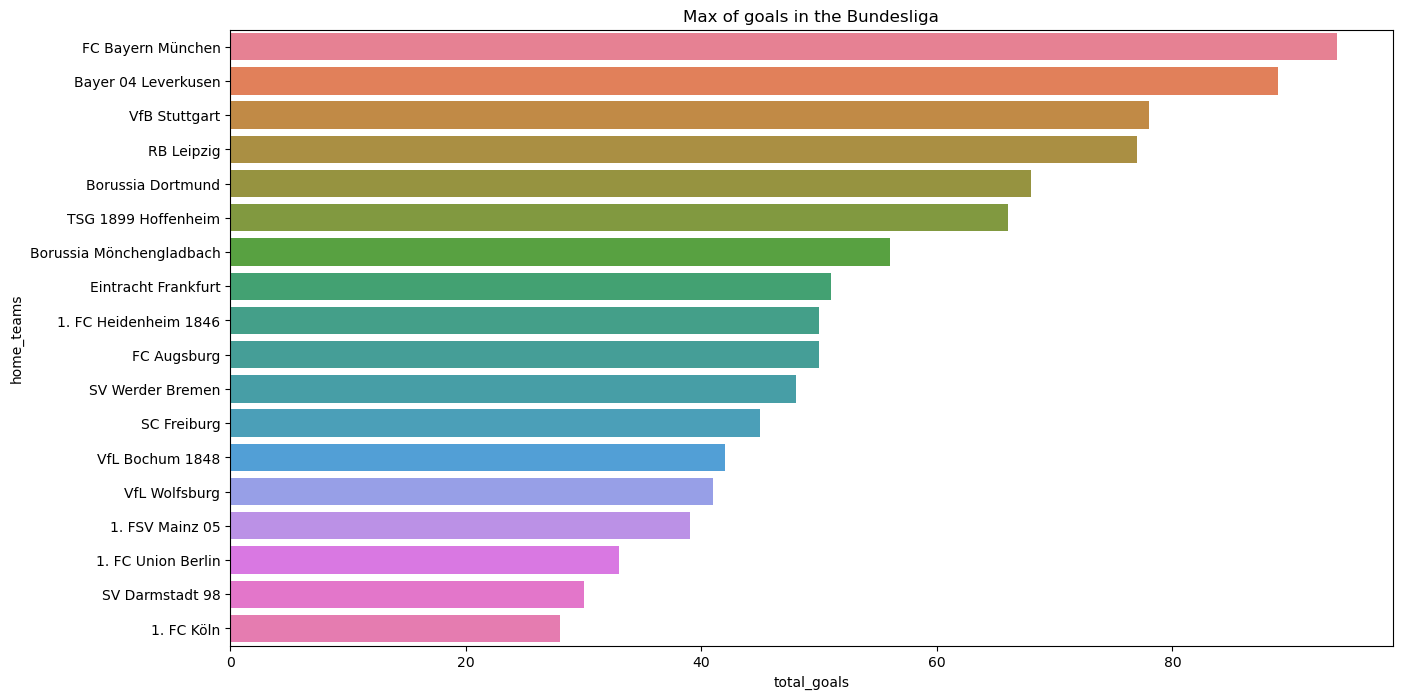

In [97]:
plt.figure(figsize=(15,8))
plt.title("Max of goals in the Bundesliga")
sns.barplot(data=df_bundesliga,x="total_goals",y="home_teams",hue="home_teams");

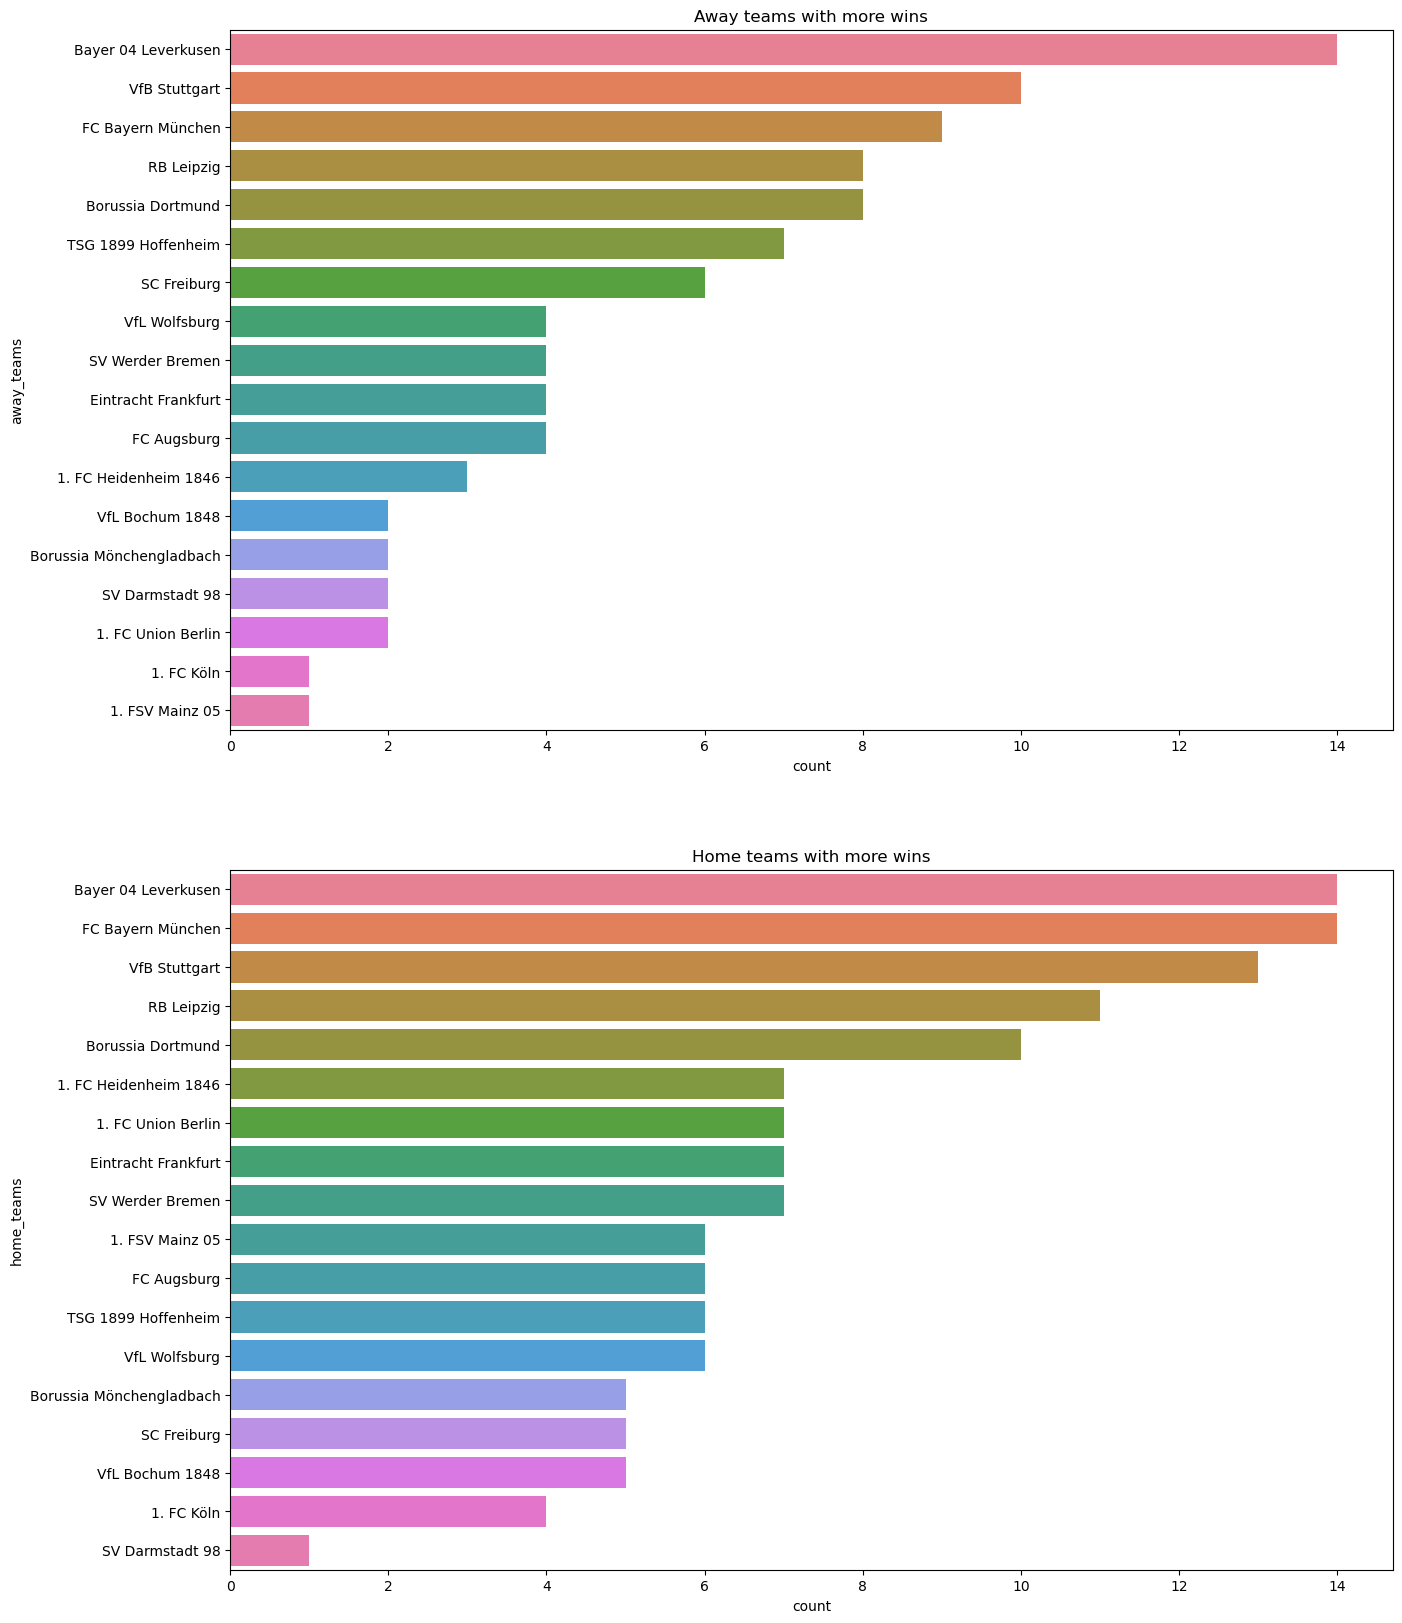

In [98]:
bundesliga_away=bundesliga[bundesliga["winner"]=="AWAY_TEAM"]
bundesliga_away=bundesliga_away["away_teams"].value_counts().reset_index() 

bundesliga_home=bundesliga[bundesliga["winner"]=="HOME_TEAM"]
bundesliga_home=bundesliga_home["home_teams"].value_counts().reset_index()

fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,20))
ax1=ax[0];ax2=ax[1];

ax1.set_title("Away teams with more wins")
sns.barplot(data=bundesliga_away,x="count",y="away_teams",hue="away_teams",ax=ax1)

ax2.set_title("Home teams with more wins")
sns.barplot(data=bundesliga_home,x="count",y="home_teams",hue="home_teams",ax=ax2);

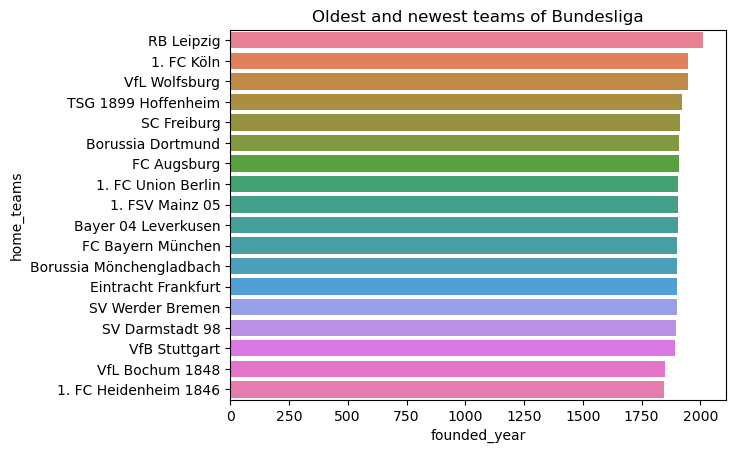

In [99]:
bundesliga_year=bundesliga.sort_values(by="founded_year",ascending=False)
bundesliga_year.drop_duplicates(subset="home_teams",inplace=True)
plt.title("Oldest and newest teams of Bundesliga")
sns.barplot(data=bundesliga_year,y="home_teams",x="founded_year",hue="home_teams");

#### LIGUE 1 ANALYSIS

In [100]:
ligue1=df_matches_all.loc[df_matches_all["league"]=="Ligue 1"].copy()
df_test = ligue1.groupby(by="home_teams")["full_time_home"].sum().reset_index()
df_test2=ligue1.groupby(by="away_teams")["full_time_away"].sum().reset_index()
df_ligue1=df_test.copy()
df_ligue1["full_time_away"]=df_test2["full_time_away"]
df_ligue1["total_goals"]=df_ligue1["full_time_home"]+df_ligue1["full_time_away"]
df_ligue1=df_ligue1.sort_values(by="total_goals",ascending=False)

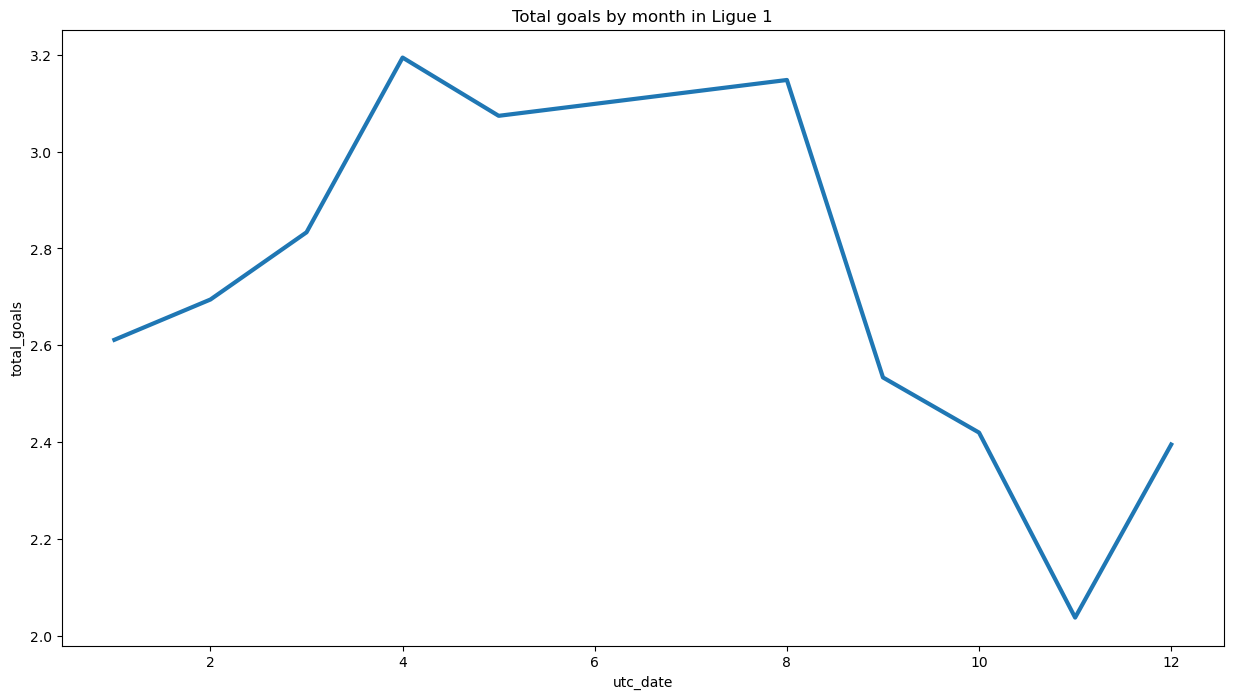

In [101]:
ligue1.loc[:,"total_goals"]=(ligue1["full_time_home"]+ligue1["full_time_away"])
plt.figure(figsize=(15,8))
plt.title("Total goals by month in Ligue 1")
sns.lineplot(data=ligue1,x=ligue1["utc_date"].dt.month,y=ligue1["total_goals"],linestyle="-",errorbar=None,linewidth=3);

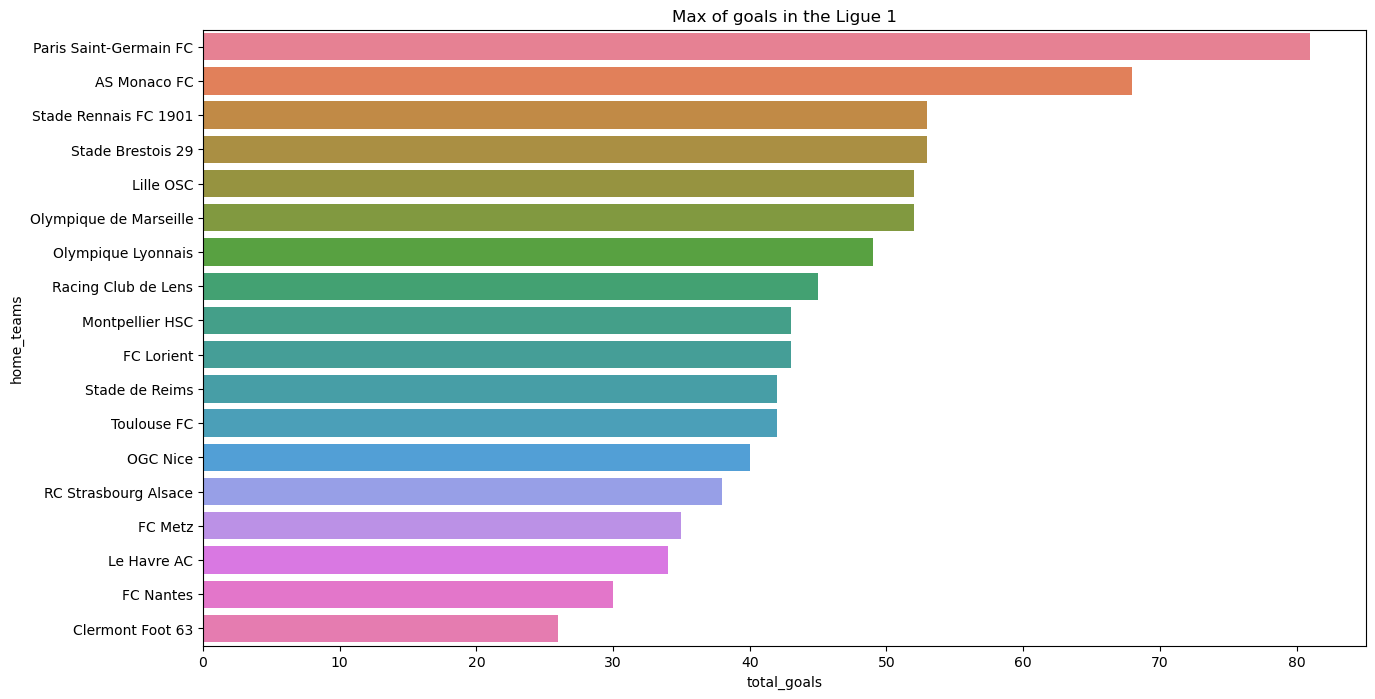

In [102]:
plt.figure(figsize=(15,8))
plt.title("Max of goals in the Ligue 1")
sns.barplot(data=df_ligue1,x="total_goals",y="home_teams",hue="home_teams");

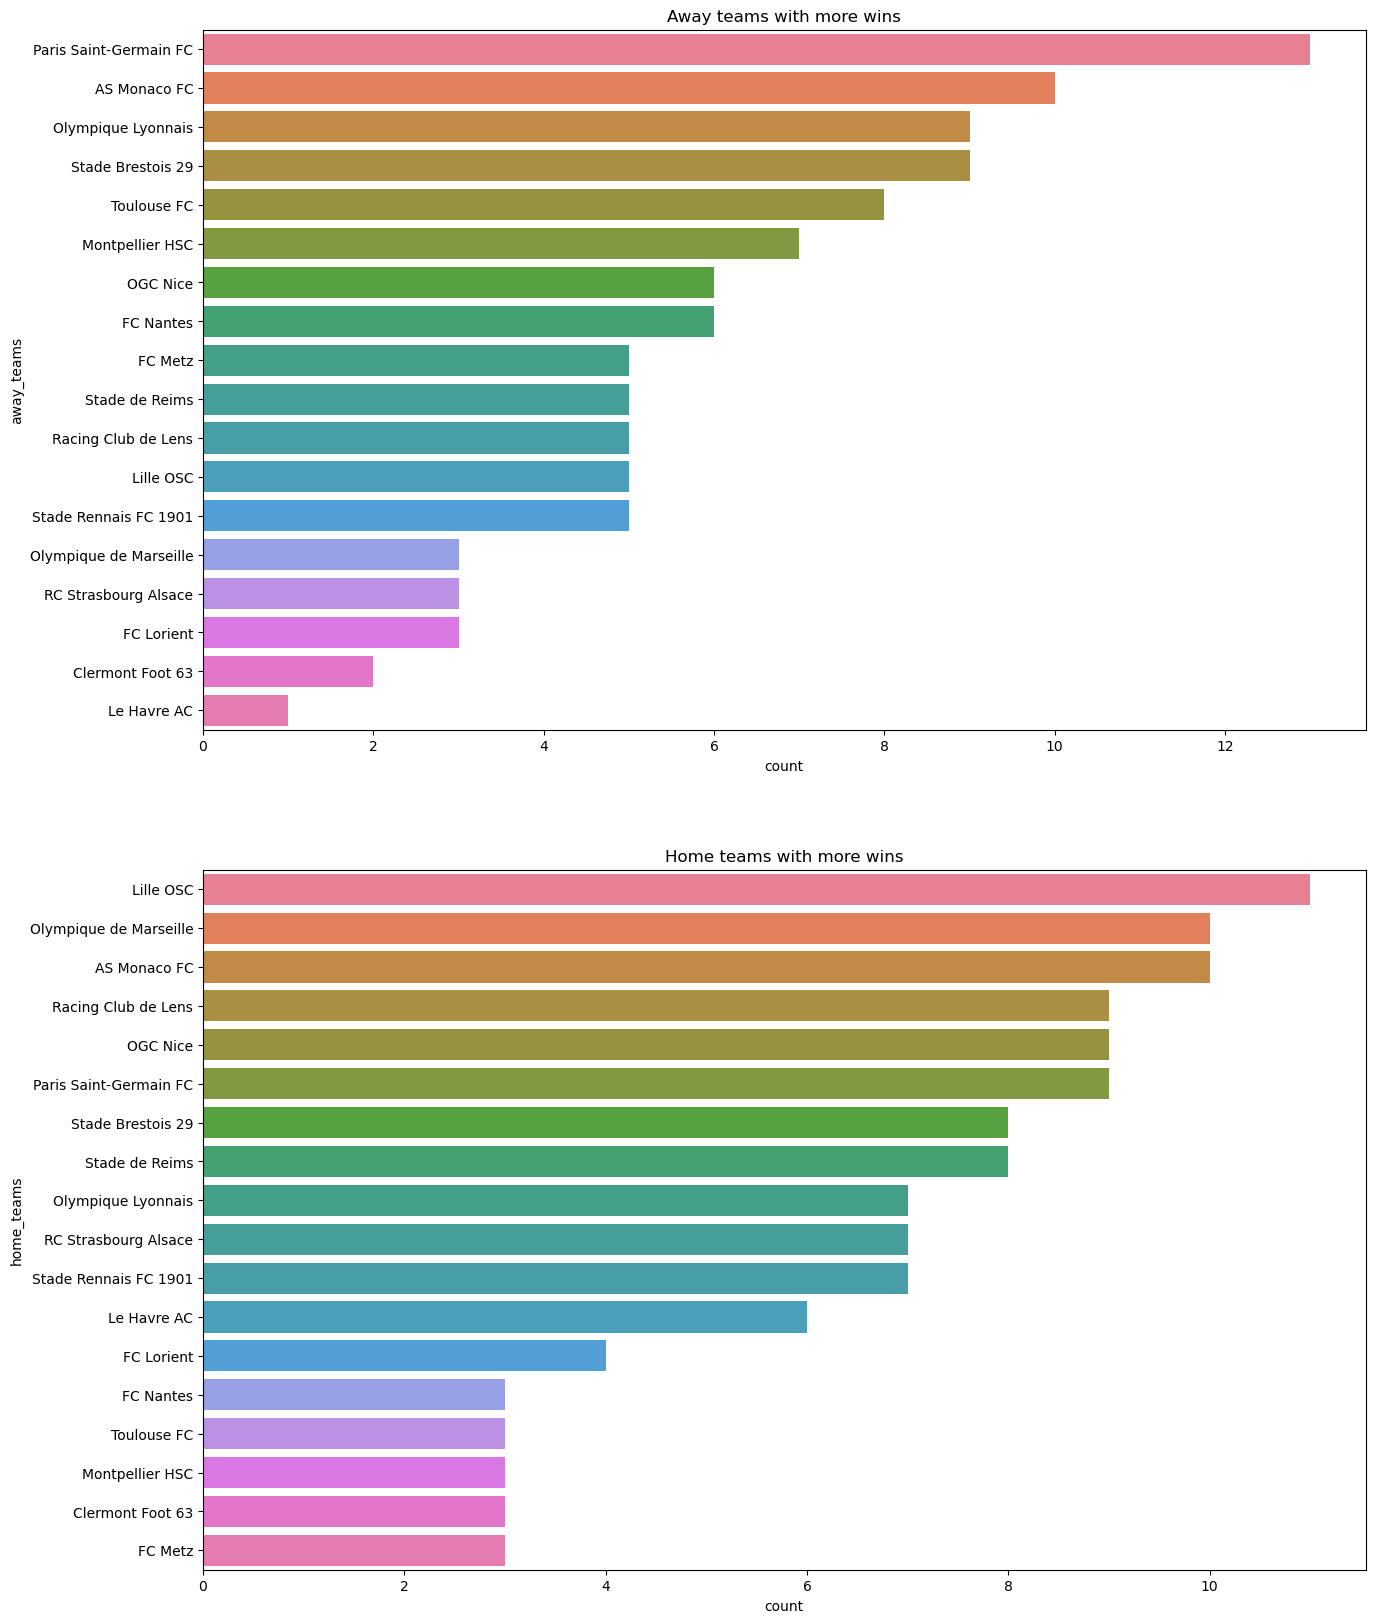

In [103]:
ligue1_away=ligue1[ligue1["winner"]=="AWAY_TEAM"]
ligue1_away=ligue1_away["away_teams"].value_counts().reset_index() 

ligue1_home=ligue1[ligue1["winner"]=="HOME_TEAM"]
ligue1_home=ligue1_home["home_teams"].value_counts().reset_index()

fig,ax=plt.subplots(nrows=2,ncols=1,figsize=(15,20))
ax1=ax[0];ax2=ax[1];

ax1.set_title("Away teams with more wins")
sns.barplot(data=ligue1_away,x="count",y="away_teams",hue="away_teams",ax=ax1)

ax2.set_title("Home teams with more wins")
sns.barplot(data=ligue1_home,x="count",y="home_teams",hue="home_teams",ax=ax2);

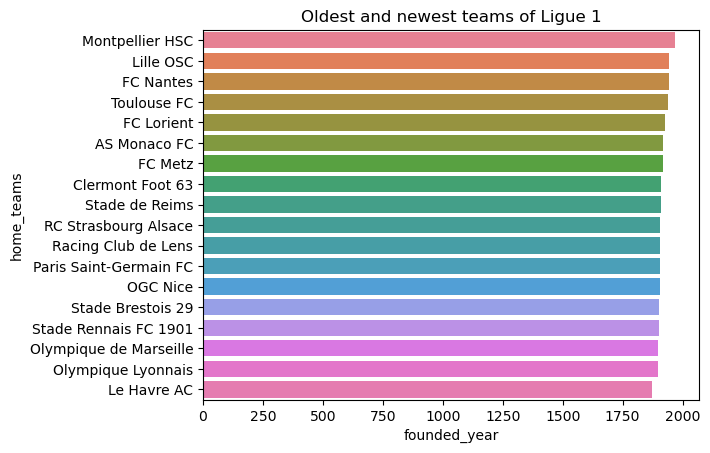

In [104]:
ligue1_year=ligue1.sort_values(by="founded_year",ascending=False)
ligue1_year.drop_duplicates(subset="home_teams",inplace=True)
plt.title("Oldest and newest teams of Ligue 1")
sns.barplot(data=ligue1_year,y="home_teams",x="founded_year",hue="home_teams");

## SUMMARY OF THE FOOTBALL DATASET

**full_time_home vs home_teams:** *Home teams with the most goals overall. "AC Milan" is in first place, followed by "AS Roma", "ACF Fiorentina", etc.*\
**full_time_away vs away_teams:** *Away teams with the most goals overall. "AC Milan" is in the first place again, followeb by "AS Monaco FC","AFC Bournemouth",etc.*\
**full_time_home vs home_teams:** *Home teams with the fewest goals overall. "US Salernitana 1919" has fewer number of goals in home, followed by "Valencia FC","Udinese Calcio",etc.*\
**full_time_away vs away_teams:** *Away teams with the fewest away goals overall. "US Salernitana 1919" has fewer number of goals away,followed by "Udinese Calcio","VFL Bochum 1848",etc.*
#### PREMIER LEAGUE
**months vs total_goals:** *There is a total number of goals each month. It is observed that the highest number of goals is recorded in January and February, and then it decreases.*\
**Max goals vs home_teams:** *Home teams with the most goals in the premier league. In first place is "Manchester City", followed by "Arsenal","Liverpool",etc.*\
**wins vs away_teams:** *Away teams with more victories. In first place is "Manchaster City",followed by "Arsenal","Liverpool",etc.*\
**wins vs home_teams:** *Home teams with more victories. In first place is "Arsenal", followed by "Liverpool","Manchaster City",etc.*\
**founded_year vs teams:** *Oldest teams in the premier league. The oldest team is "Sheffield United", followed by "Nottingham Forest","Aston Villa",etc.*
#### SERIE A
**months vs total_goals:** *There is a clear increase in goals in June, almost double the number of goals compared to the other months.*\
**total_goals vs home_teams:** *Maximum number of goals scored by each team. First place goes to FC Internazionale Milano, followed by AC Milan, Atalanta FC, etc.*\
**victories vs away_teams:** *The teams with the most away wins were “FC Internazionale Milano”, followed by “AC Milan”, “SS Lazio”, etc.*\
**victories vs home_teams:** *The home teams with the most wins were “FC Internazionale Milano”, followed by “Atalanta FC”, “AS Roma”, etc.*\
**teams vs founded_year:** *The oldest teams in Serie A were "Geona CFC", "Torino FC","Udinese Calcio",etc.*
#### LA LIGA 
**months vs total_goals:** *There are no major variations in the graph; the number of goals throughout the season remains between 2.4 and 3. There is a peak in October (3 goals) and a drop in December.*\
**total_goals vs home_teams:** *The home teams with the most goals in La Liga. In first place is Real "Madrid CF", followed by "Girona FC", "FC Barcelona",etc.*\
**victories vs away_teams:** *The teams with the most away wins were "Real Madri CF", "FC Barcelona","Girona FC",etc.*\
**victories vs home_teams:** *The teams with the most home wins were "Real Madrid CF","Club Atletico de Madrid",""Girona FC",etc.*\
**teams vs founded_year:** *Oldest teams in La Liga were "Athletic Club","FC Barcelona","Real Madrid",etc.*
#### BUDESLIGA
**months vs total_goals:** *A notable increase in goals is observed between March and October. October registers the highest number of goals of the entire season, while January and February are the months with the fewest goals.*\
**total_goals vs home_teams:** *The home teams with the most goals in La Liga. In first place is "FC Bayern München", followed by "Bayer 04 Leverkusen","VTB Stuttgart",etc.*\
**victories vs away_teams:** *The teams with the most away wins were "Bayer 04 Leverkusen", "VTB Stuttgard","FC Bayern München",etc.*\
**victories vs home_teams:** *The teams with the most home wins were "Bayer 04 Leverkusen","FC Bayern München","VTB Stuttgard",etc.*\
**teams vs founded_year:** *Oldest teams in La Liga were "FC Heidemheim 1846","VFL Bochum 1848","VTB Stuttgard",etc.*
#### LIGUE 1
**months vs total_goals:** *There is no a big movements between January and August because the goals keeping between 2.6 and 3.2, being April and August the top of goals. After August the goals decreased with a big movement, being November the month with less goals in Ligue 1.*\
**total_goals vs home_teams:** *The home teams with the most goals in Ligue 1. In first place is "Paris Saint-Germain FC", followed by "AS Monaco FC","Stade Rennais FC 1901",etc.*\
**victories vs away_teams:** *The teams with the most away wins were "Paris Saint-Germain FC", "AS Monaco FC","Olympique Lyonnais",etc.*\
**victories vs home_teams:** *The teams with the most home wins were "Lille OSC","Olympique de Marseille","AS Monaco",etc.*\
**teams vs founded_year:** *Oldest teams in Ligue 1 were "Le Havre AC","Olympique Lyonnais","Olympique de Marseille",etc.*

## ANALYZING STANDINGS DATASET

In [105]:
df_standings_all = pd.read_sql("""SELECT seasons.year,leagues.name AS leagues,teams.name AS teams,standings.played_games,standings.won,standings.draw,standings.lost,
                                standings.points,standings.goals_for,standings.goals_against,standings.goal_difference FROM standings 
                                LEFT JOIN seasons ON standings.season_id=seasons.season_id
                                LEFT JOIN leagues ON standings.league_id=leagues.league_id
                                LEFT JOIN teams ON standings.team_id=teams.team_id;
                                """,conn)
df_standings_all

year     leagues                teams  played_games  won  draw  lost  \
0   2023-2024  Bundesliga  Bayer 04 Leverkusen            34   28     6     0   
1   2023-2024  Bundesliga        VfB Stuttgart            34   23     4     7   
2   2023-2024  Bundesliga    FC Bayern München            34   23     3     8   
3   2023-2024  Bundesliga           RB Leipzig            34   19     8     7   
4   2023-2024  Bundesliga    Borussia Dortmund            34   18     9     7   
..        ...         ...                  ...           ...  ...   ...   ...   
91  2023-2024     Ligue 1            FC Nantes            34    9     6    19   
92  2023-2024     Ligue 1          Le Havre AC            34    7    11    16   
93  2023-2024     Ligue 1              FC Metz            34    8     5    21   
94  2023-2024     Ligue 1           FC Lorient            34    7     8    19   
95  2023-2024     Ligue 1     Clermont Foot 63            34    5    10    19   

    points  goals_for  goals_against  goal_difference  
0       90         89             24               65  
1       73         78             39               39  
2       72         94             45               49  
3       65         77             39               38  
4       63         68             43               25  
..     ...        ...            ...              ...  
91      33         30             55              -25  
92      32         34             45              -11  
93      29         35             58              -23  
94      29         43             66              -23  
95      25         26             60              -34  

[96 rows x 11 columns]

In [126]:
df_standings_dict=df_standings_all.to_dict(orient="records")
template=ChatPromptTemplate.from_messages([
    ("system","You are an expert data scientist who analyzes charts and data frames professionally and analytically. You are concise in your answers and provide recommendations and your professional perspective."),
    ("user","Explain the dataset to me clearly and also tell me how to analyze it; that is, what graphs and operations would be useful to apply. The dataset is: {dataset}")    
])
chain=template|llm
response=chain.invoke({"dataset":df_standings_dict})
display(Markdown(response.content))

C:\Users\EfrenMariscal\AppData\Local\Temp\ipykernel_6732\702456777.py:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  df_standings_dict=df_standings_all.to_dict(orient="records")


This dataset contains football (soccer) team statistics for the 2023-2024 season across multiple leagues. Each entry represents a single team's performance, summarizing their season-long results.

**Dataset Explanation:**

*   **`year`**: The football season (e.g., '2023-2024').
*   **`name`**: The name of the football club.
*   **`played_games`**: The total number of matches played by the team in the season.
*   **`won`**: The number of matches won.
*   **`draw`**: The number of matches drawn (tied).
*   **`lost`**: The number of matches lost.
*   **`points`**: Total points accumulated. Typically, 3 points for a win, 1 for a draw, and 0 for a loss.
*   **`goals_for`**: Total goals scored by the team.
*   **`goals_against`**: Total goals conceded by the team.
*   **`goal_difference`**: The difference between `goals_for` and `goals_against` (GF - GA).

**How to Analyze It (Graphs and Operations):**

**1. Initial Data Exploration & Segmentation:**
    *   **Operation:** Group the data by `played_games` to identify different leagues, as some leagues play 34 games (e.g., Bundesliga, Ligue 1) while others play 38 (e.g., Premier League, La Liga, Serie A). This is crucial for fair comparison.
    *   **Operation:** Calculate derived metrics like `Win Rate` (`won / played_games`), `Loss Rate` (`lost / played_games`), and `Points Per Game (PPG)` (`points / played_games`).

**2. Performance Ranking within Leagues:**
    *   **Operation:** Sort teams within each identified league by `points` (descending) to see the final league standings.
    *   **Graph:** **Bar Chart** of `points` per team, ranked, for each league. This immediately shows league winners and overall hierarchy.

**3. Offensive and Defensive Analysis:**
    *   **Graph:** **Grouped Bar Chart** or **Stacked Bar Chart** comparing `goals_for` and `goals_against` for teams within a league. This highlights teams with strong offense, strong defense, or a balanced approach.
    *   **Graph:** **Bar Chart** of `goal_difference` per team, ranked. This is a key indicator of overall strength and efficiency.
    *   **Graph:** **Scatter Plot** of `goals_for` vs. `goals_against` for all teams in a league. This helps visualize teams' offensive-defensive balance; teams in the top-left quadrant (high GF, low GA) are typically strongest.

**4. Correlation and Impact of Metrics:**
    *   **Graph:** **Scatter Plot** of `points` vs. `goal_difference`. You should observe a strong positive correlation, indicating that a higher goal difference generally leads to more points.
    *   **Graph:** **Scatter Plot** of `points` vs. `won` (or `win_rate`). Similarly, a strong positive correlation is expected.

**5. Comparative Analysis (Across Leagues - with caution):**
    *   **Operation:** Calculate average `PPG`, `GFPG` (Goals For Per Game), `GAPG` (Goals Against Per Game) for each league.
    *   **Graph:** **Bar Chart** comparing average `PPG` or `goal_difference` (normalized per game) across different leagues to get a high-level view of league competitiveness, though direct comparison should be made carefully due to varying league strengths.

**Professional Perspective & Recommendations:**

*   **Focus on League-Specific Analysis:** Given the mix of leagues, primary analysis should compare teams *within* their respective leagues. Direct comparison of raw points or goals between a team that played 34 games and one that played 38 is misleading. Always normalize metrics (e.g., points per game, goals per game) when attempting cross-league comparisons.
*   **Identify Outliers:** Look for teams with unusually high `won` counts but low `goals_for` (defensive strength) or vice-versa (attacking strength, weak defense).
*   **Performance vs. Efficiency:** Analyze not just total goals/points, but also `goals_for` per game and `goals_against` per game to understand efficiency.
*   **Top/Bottom Performers:** Clearly identify the champions, teams qualifying for European competitions (top few), and relegated teams (bottom few) within each league based on points and goal difference.

## EXPLORATORY DATA ANALYSIS (EDA)

In [106]:
df_standings_all.isnull().sum()

year               0
leagues            0
teams              0
played_games       0
won                0
draw               0
lost               0
points             0
goals_for          0
goals_against      0
goal_difference    0
dtype: int64

In [107]:
df_standings_all.describe()

played_games        won       draw       lost     points  goals_for  \
count     96.000000  96.000000  96.000000  96.000000  96.000000  96.000000   
mean      36.479167  13.416667   9.645833  13.416667  49.760417  52.593750   
std        1.935699   6.523910   2.923513   5.743035  18.501633  17.740574   
min       34.000000   2.000000   3.000000   0.000000  16.000000  26.000000   
25%       34.000000   9.000000   8.000000  10.000000  37.000000  40.000000   
50%       38.000000  12.500000   9.000000  14.000000  46.500000  49.000000   
75%       38.000000  18.000000  11.250000  17.000000  61.500000  62.000000   
max       38.000000  29.000000  19.000000  28.000000  95.000000  96.000000   

       goals_against  goal_difference  
count      96.000000        96.000000  
mean       52.593750         0.000000  
std        14.775213        27.207584  
min        22.000000       -69.000000  
25%        43.750000       -15.000000  
50%        51.000000        -5.500000  
75%        61.000000        15.750000  
max       104.000000        67.000000

In [108]:
df_standings_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   year             96 non-null     object
 1   leagues          96 non-null     object
 2   teams            96 non-null     object
 3   played_games     96 non-null     int64 
 4   won              96 non-null     int64 
 5   draw             96 non-null     int64 
 6   lost             96 non-null     int64 
 7   points           96 non-null     int64 
 8   goals_for        96 non-null     int64 
 9   goals_against    96 non-null     int64 
 10  goal_difference  96 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 8.4+ KB


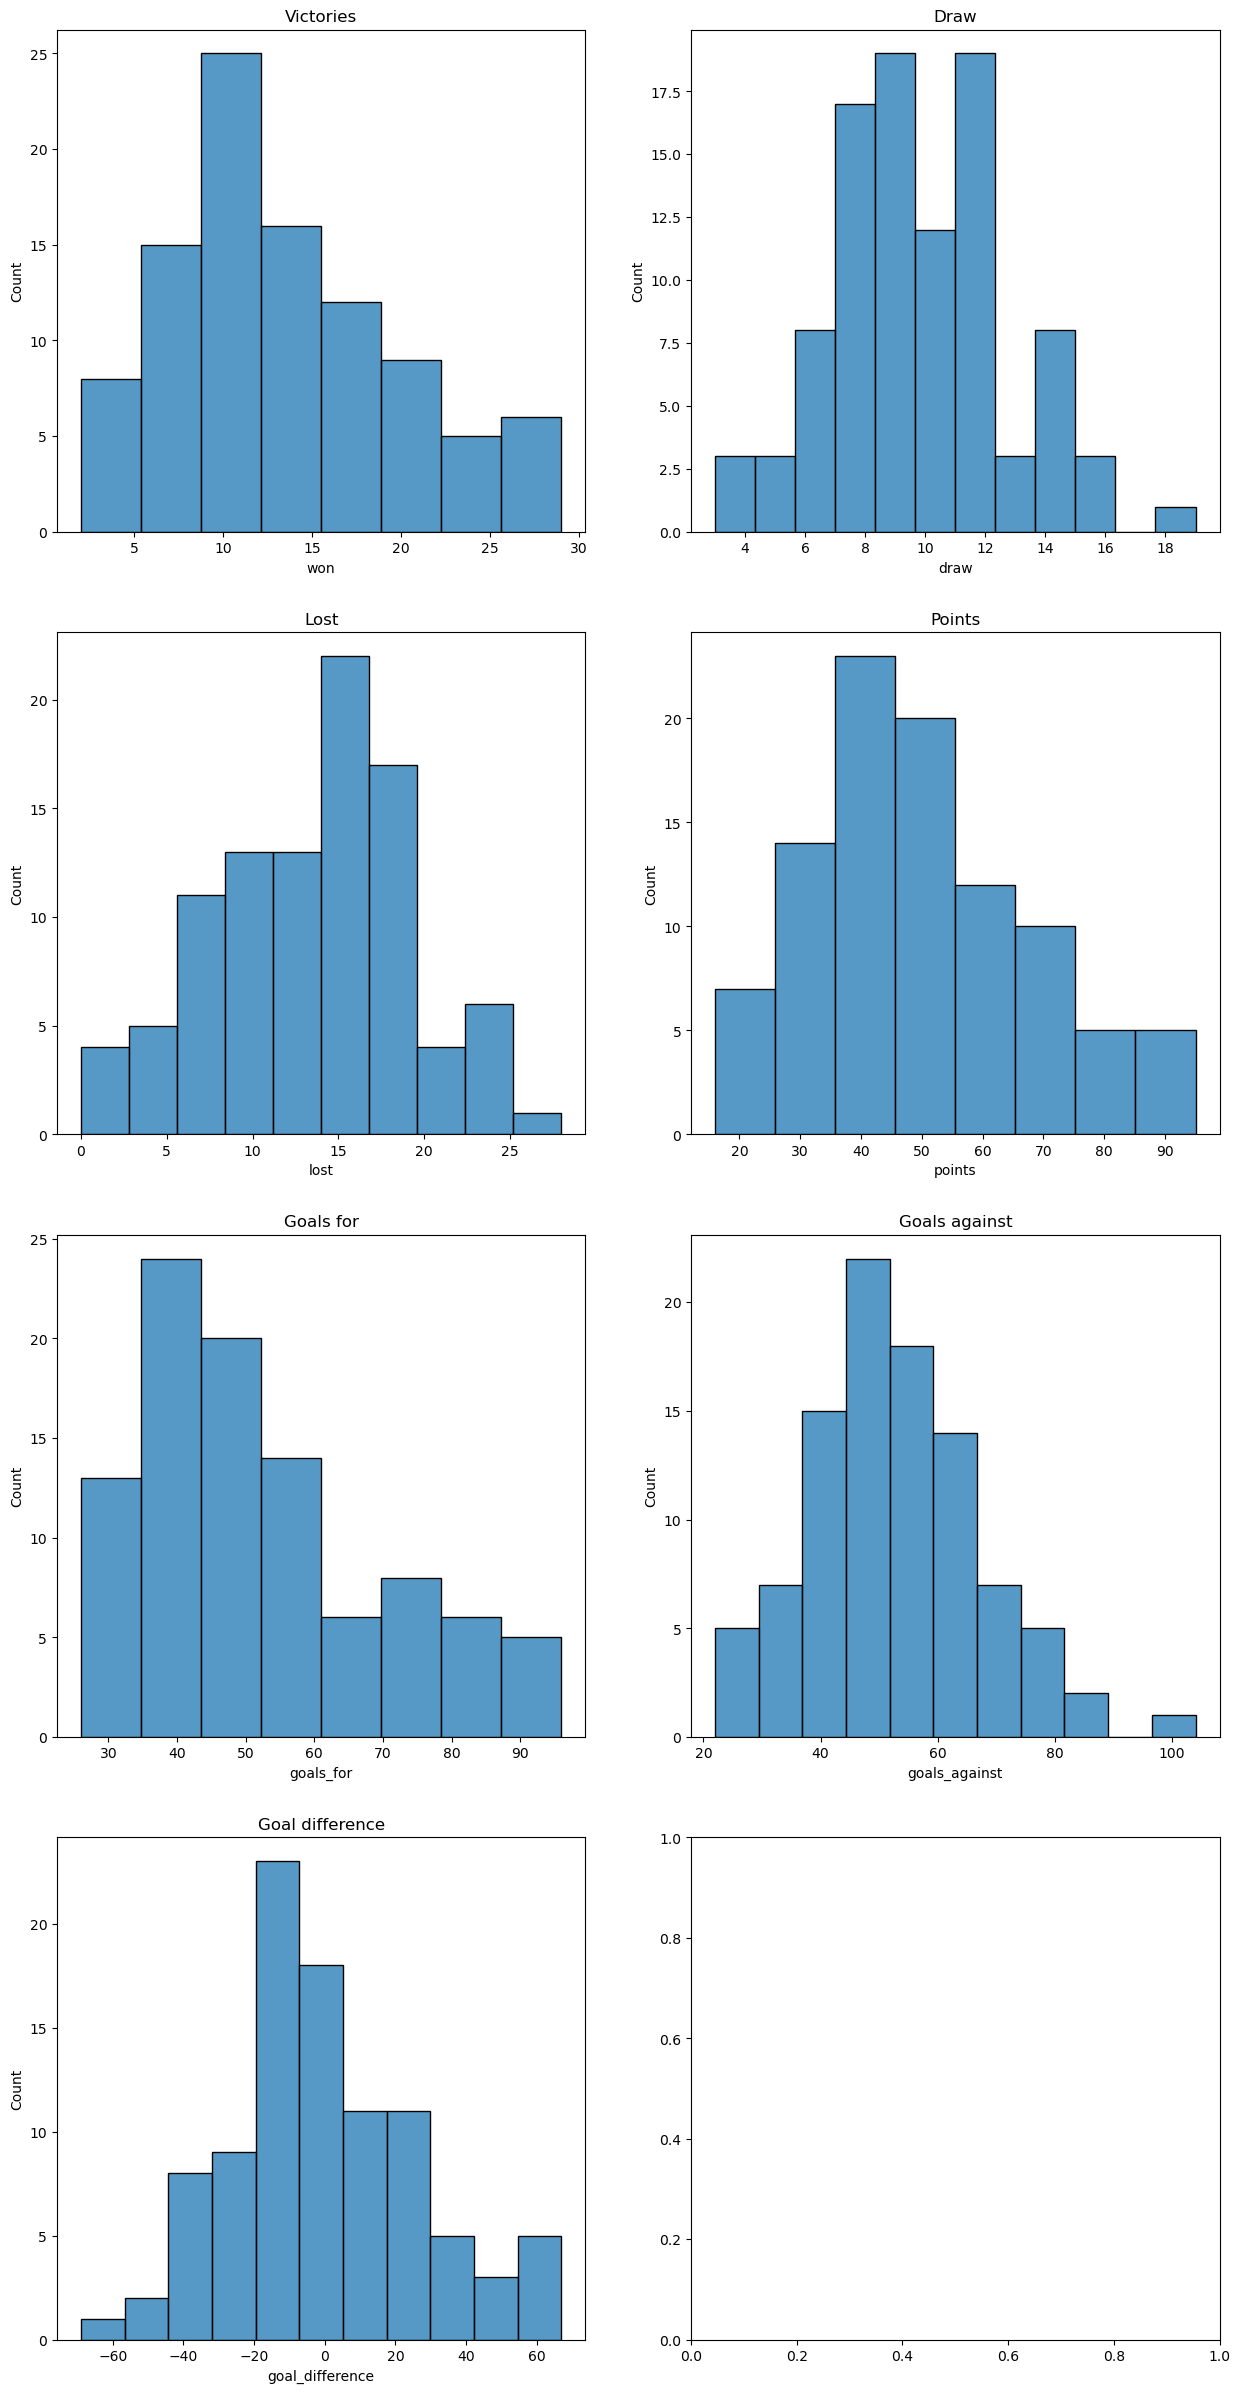

In [109]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(15,30))
ax1=ax[0,0];ax2=ax[0,1];ax3=ax[1,0];ax4=ax[1,1];ax5=ax[2,0];ax6=ax[2,1];ax7=ax[3,0];ax8=ax[3,1];

ax1.set_title("Victories")
sns.histplot(data=df_standings_all,x="won",ax=ax1)

ax2.set_title("Draw")
sns.histplot(data=df_standings_all,x="draw",ax=ax2)

ax3.set_title("Lost")
sns.histplot(data=df_standings_all,x="lost",ax=ax3)

ax4.set_title("Points")
sns.histplot(data=df_standings_all,x="points",ax=ax4)

ax5.set_title("Goals for")
sns.histplot(data=df_standings_all,x="goals_for",ax=ax5)

ax6.set_title("Goals against")
sns.histplot(data=df_standings_all,x="goals_against",ax=ax6)

ax7.set_title("Goal difference")
sns.histplot(data=df_standings_all,x="goal_difference",ax=ax7);

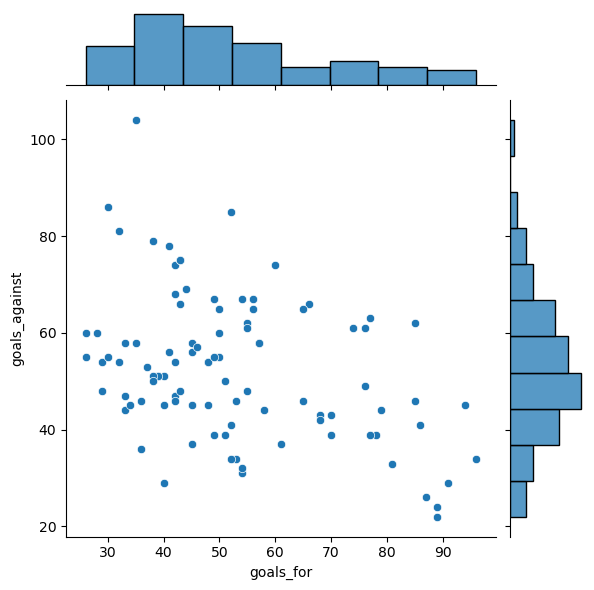

In [110]:
sns.jointplot(data=df_standings_all,x="goals_for",y="goals_against")

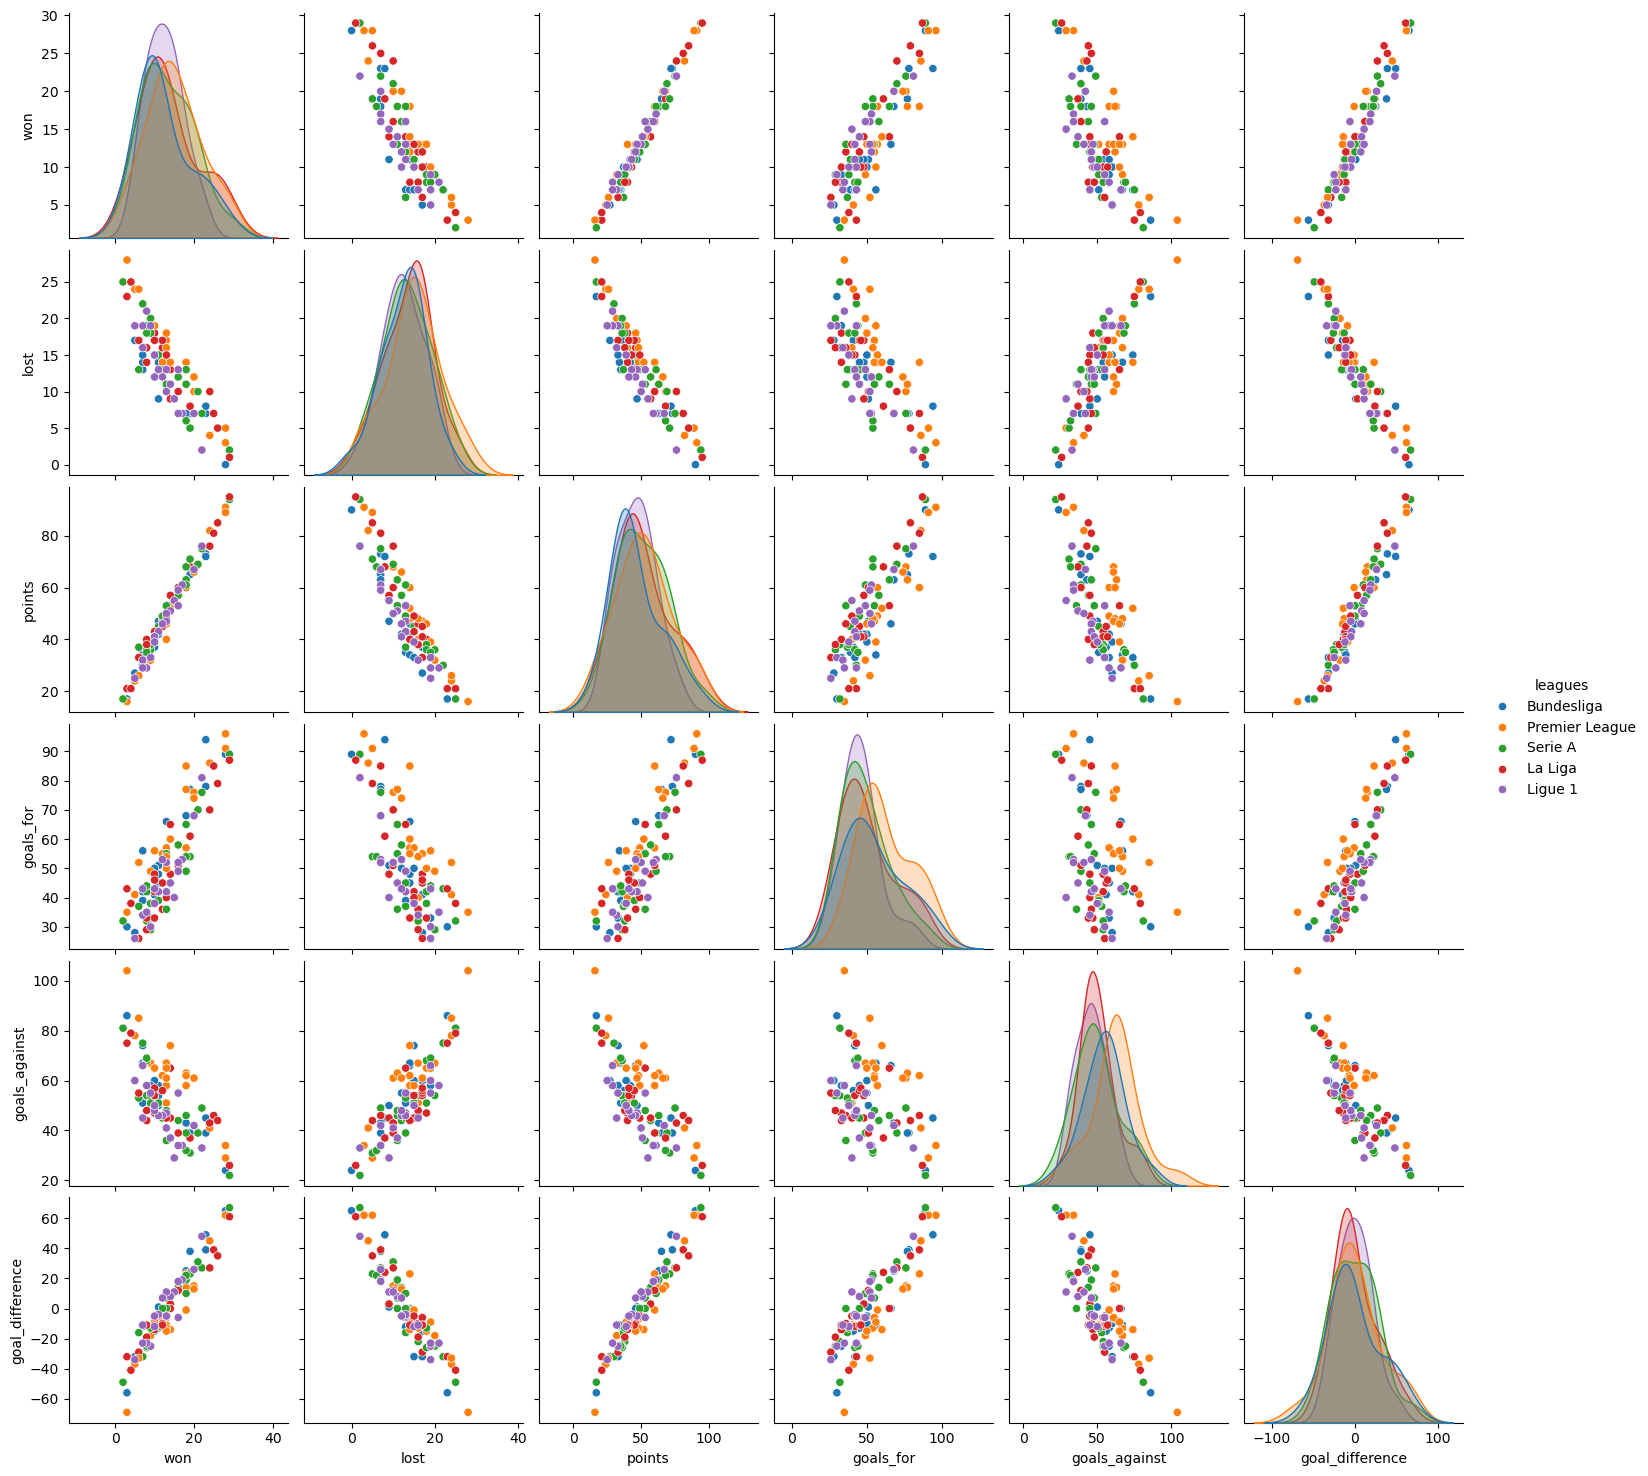

In [111]:
# DRAW WAS DELETED 
standings_new=df_standings_all[["leagues","won","lost","points","goals_for","goals_against","goal_difference"]].copy()
sns.pairplot(data=standings_new,hue="leagues");

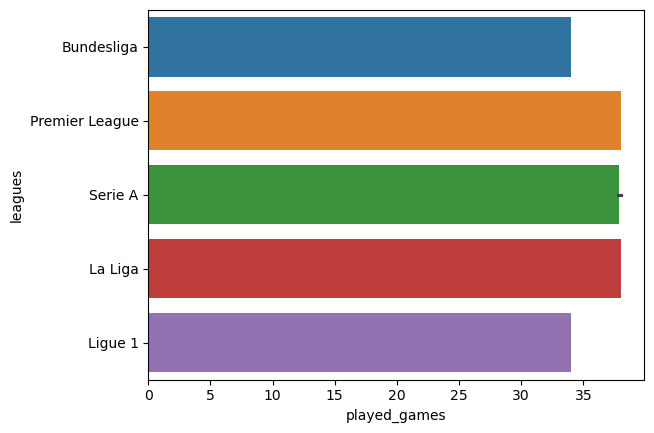

In [112]:
sns.barplot(data=df_standings_all,y="leagues",x="played_games",hue="leagues");

##### WIN, LOSS AND POINTS RATE

In [113]:
df_standings_all.loc[:,"win_rate"]=((df_standings_all["won"]/df_standings_all["played_games"])*100)
df_standings_all.loc[:,"loss_rate"]=((df_standings_all["lost"]/df_standings_all["played_games"])*100)
df_standings_all.loc[:,"points_per_game"]=(df_standings_all["points"]/df_standings_all["played_games"])
df_standings_all

year     leagues                teams  played_games  won  draw  lost  \
0   2023-2024  Bundesliga  Bayer 04 Leverkusen            34   28     6     0   
1   2023-2024  Bundesliga        VfB Stuttgart            34   23     4     7   
2   2023-2024  Bundesliga    FC Bayern München            34   23     3     8   
3   2023-2024  Bundesliga           RB Leipzig            34   19     8     7   
4   2023-2024  Bundesliga    Borussia Dortmund            34   18     9     7   
..        ...         ...                  ...           ...  ...   ...   ...   
91  2023-2024     Ligue 1            FC Nantes            34    9     6    19   
92  2023-2024     Ligue 1          Le Havre AC            34    7    11    16   
93  2023-2024     Ligue 1              FC Metz            34    8     5    21   
94  2023-2024     Ligue 1           FC Lorient            34    7     8    19   
95  2023-2024     Ligue 1     Clermont Foot 63            34    5    10    19   

    points  goals_for  goals_against  goal_difference   win_rate  loss_rate  \
0       90         89             24               65  82.352941   0.000000   
1       73         78             39               39  67.647059  20.588235   
2       72         94             45               49  67.647059  23.529412   
3       65         77             39               38  55.882353  20.588235   
4       63         68             43               25  52.941176  20.588235   
..     ...        ...            ...              ...        ...        ...   
91      33         30             55              -25  26.470588  55.882353   
92      32         34             45              -11  20.588235  47.058824   
93      29         35             58              -23  23.529412  61.764706   
94      29         43             66              -23  20.588235  55.882353   
95      25         26             60              -34  14.705882  55.882353   

    points_per_game  
0          2.647059  
1          2.147059  
2          2.117647  
3          1.911765  
4          1.852941  
..              ...  
91         0.970588  
92         0.941176  
93         0.852941  
94         0.852941  
95         0.735294  

[96 rows x 14 columns]

In [114]:
leagues_goals=df_standings_all.groupby(by="leagues")["goals_for"].sum().reset_index()
leagues_goals.sort_values(by="goals_for",ascending=False,inplace=True)
leagues_goals

leagues  goals_for
3  Premier League       1246
1         La Liga       1005
4         Serie A        987
0      Bundesliga        985
2         Ligue 1        826

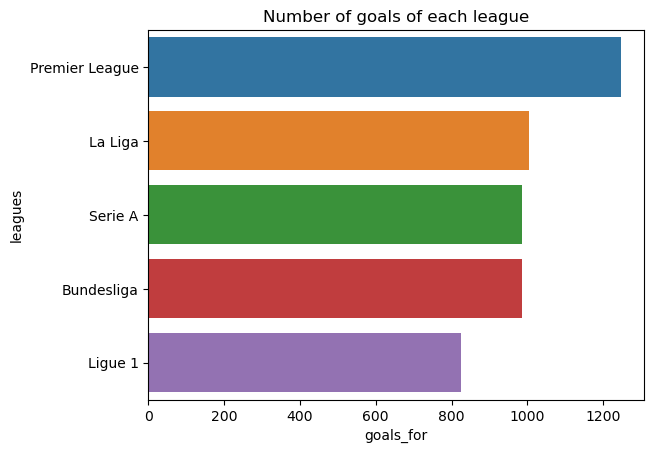

In [115]:
plt.title("Number of goals of each league")
sns.barplot(data=leagues_goals,y="leagues",x="goals_for",hue="leagues");

In [116]:
premier_league=df_standings_all.loc[df_standings_all["leagues"]=="Premier League"].copy()
premier_league.sort_values(by="goals_against",ascending=False,inplace=True)
laLiga=df_standings_all.loc[df_standings_all["leagues"]=="La Liga"].copy()
laLiga.sort_values(by="goals_against",ascending=False,inplace=True)
serieA=df_standings_all.loc[df_standings_all["leagues"]=="Serie A"].copy()
serieA.sort_values(by="goals_against",ascending=False,inplace=True)
bundesliga=df_standings_all.loc[df_standings_all["leagues"]=="Bundesliga"].copy()
bundesliga.sort_values(by="goals_against",ascending=False,inplace=True)
ligue1=df_standings_all.loc[df_standings_all["leagues"]=="Ligue 1"].copy()
ligue1.sort_values(by="goals_against",ascending=False,inplace=True)

### Goals against

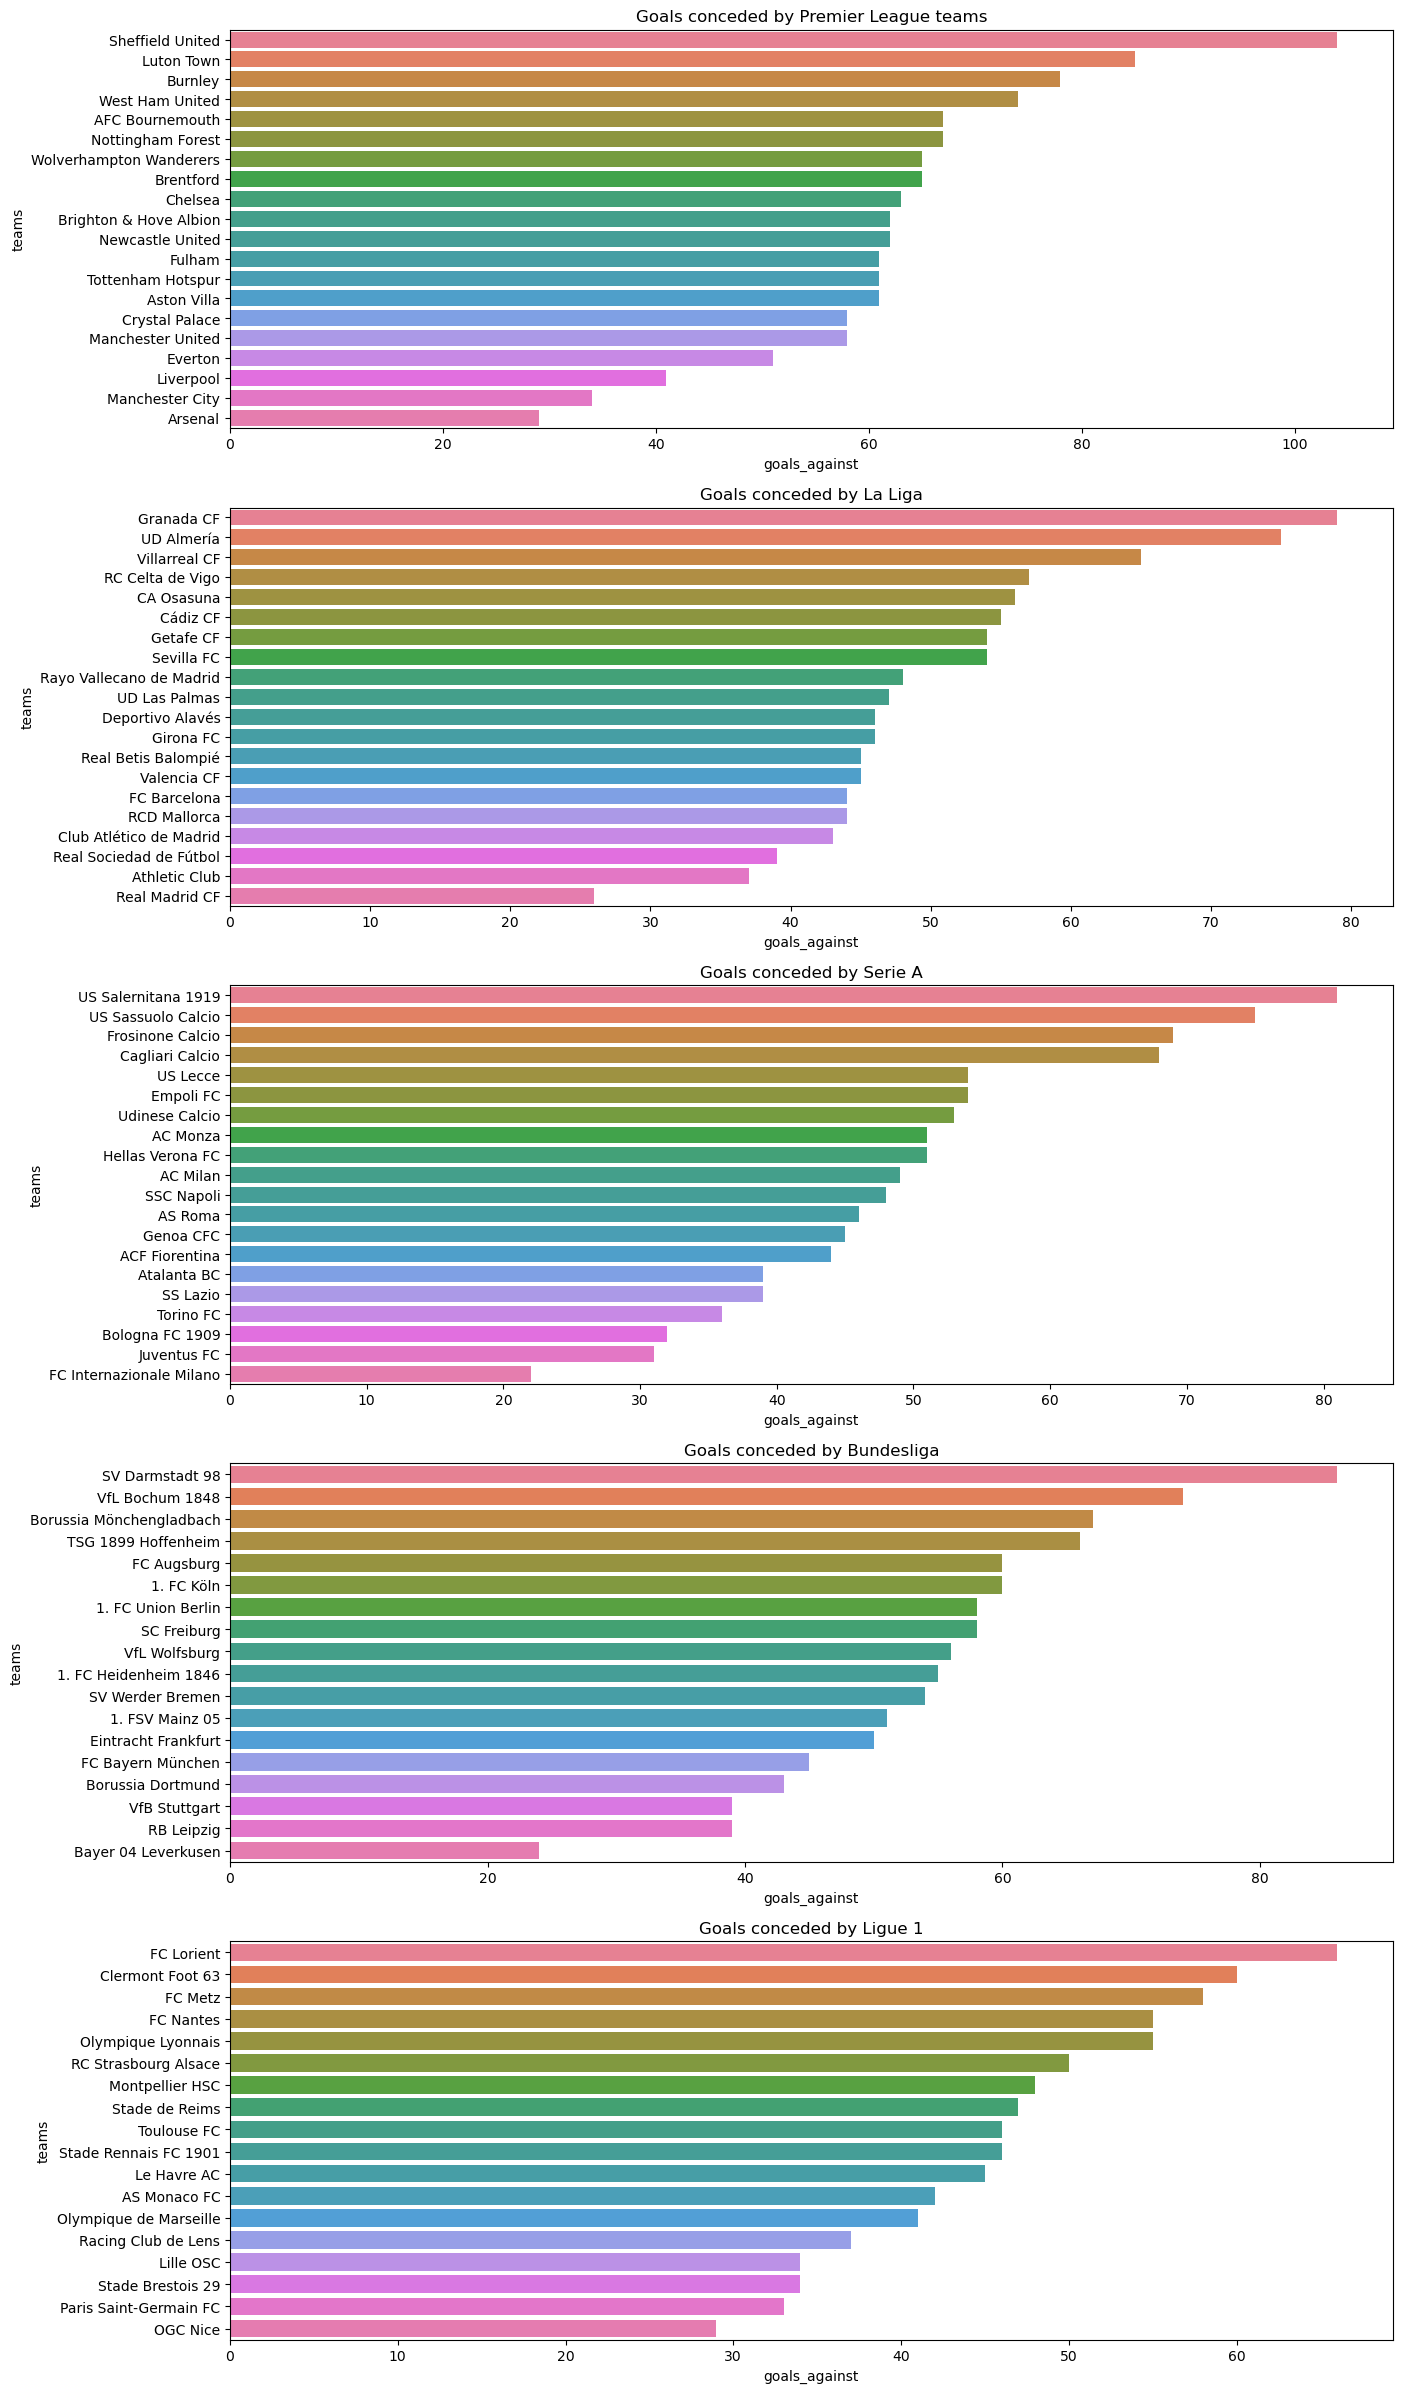

In [117]:
fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(15,30))
ax1=ax[0];ax2=ax[1];ax3=ax[2];ax4=ax[3];ax5=ax[4]

ax1.set_title("Goals conceded by Premier League teams")
sns.barplot(data=premier_league,y="teams",x="goals_against",hue="teams",ax=ax1)

ax2.set_title("Goals conceded by La Liga")
sns.barplot(data=laLiga,x="goals_against",y="teams",hue="teams",ax=ax2)

ax3.set_title("Goals conceded by Serie A")
sns.barplot(data=serieA,x="goals_against",y="teams",hue="teams",ax=ax3)

ax4.set_title("Goals conceded by Bundesliga")
sns.barplot(data=bundesliga,x="goals_against",y="teams",hue="teams",ax=ax4)

ax5.set_title("Goals conceded by Ligue 1")
sns.barplot(data=ligue1,x="goals_against",y="teams",hue="teams",ax=ax5);

### Goal difference

In [118]:
premier_league.sort_values(by="goal_difference",ascending=False,inplace=True)
laLiga.sort_values(by="goal_difference",ascending=False,inplace=True)
serieA.sort_values(by="goal_difference",ascending=False,inplace=True)
bundesliga.sort_values(by="goal_difference",ascending=False,inplace=True)
ligue1.sort_values(by="goal_difference",ascending=False,inplace=True)

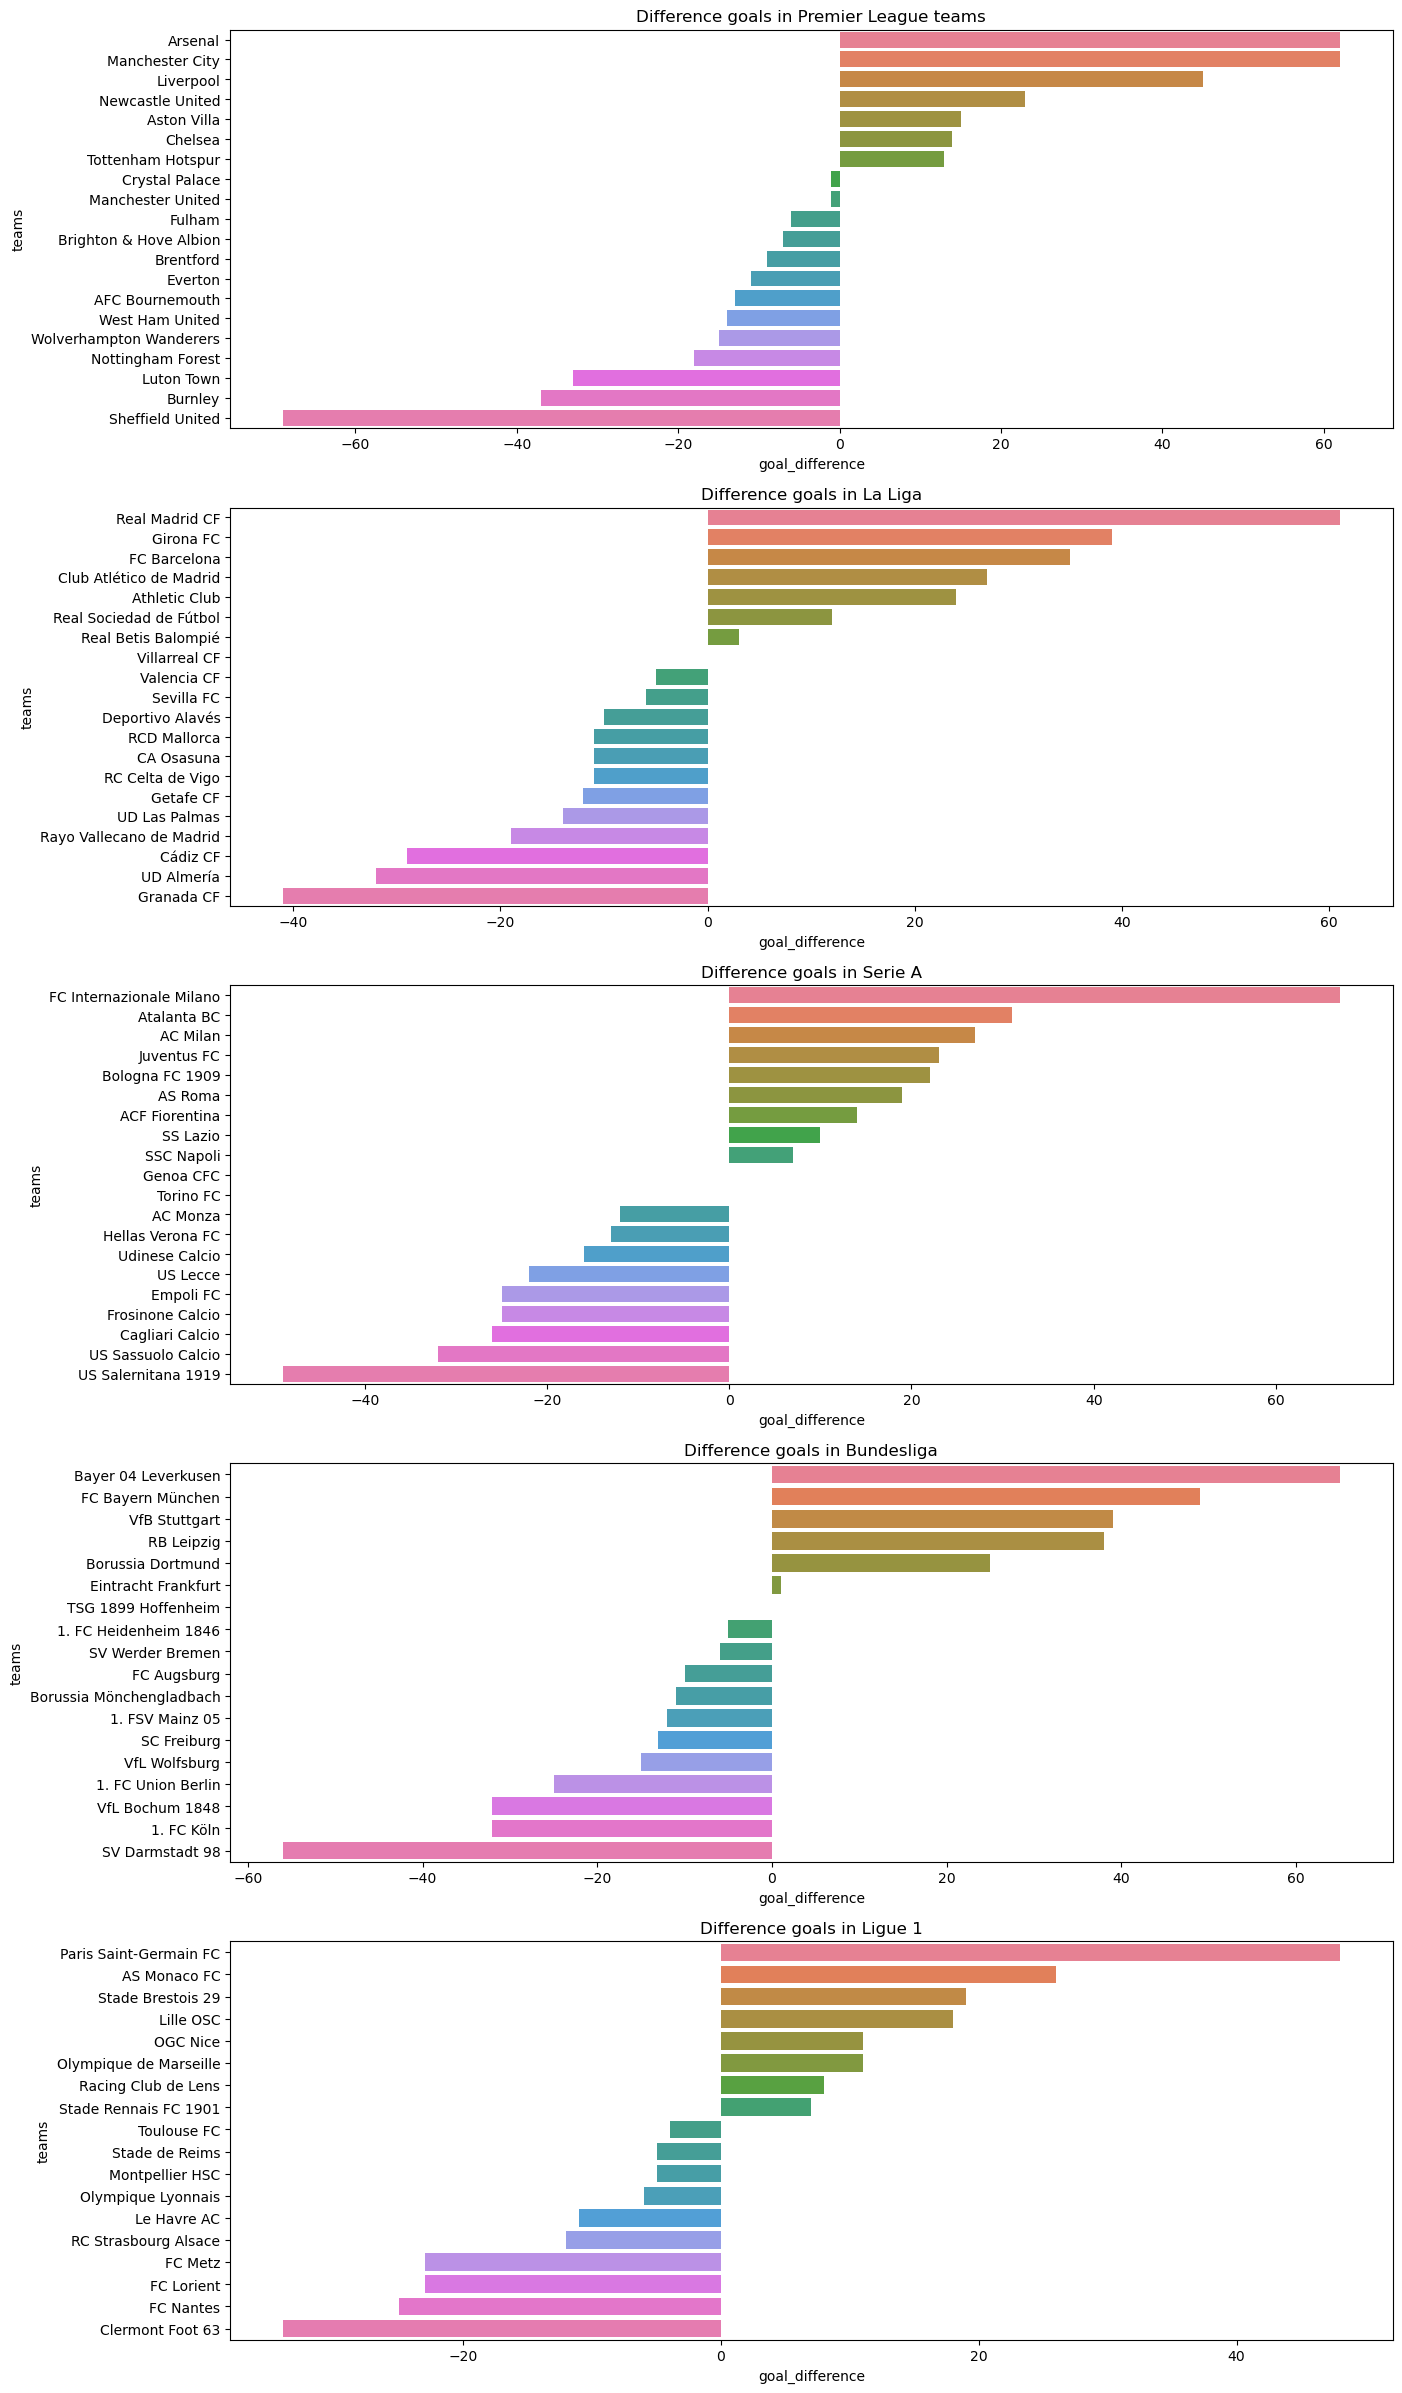

In [119]:
fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(15,30))
ax1=ax[0];ax2=ax[1];ax3=ax[2];ax4=ax[3];ax5=ax[4]

ax1.set_title("Difference goals in Premier League teams")
sns.barplot(data=premier_league,y="teams",x="goal_difference",hue="teams",ax=ax1)

ax2.set_title("Difference goals in La Liga")
sns.barplot(data=laLiga,x="goal_difference",y="teams",hue="teams",ax=ax2)

ax3.set_title("Difference goals in Serie A")
sns.barplot(data=serieA,x="goal_difference",y="teams",hue="teams",ax=ax3)

ax4.set_title("Difference goals in Bundesliga")
sns.barplot(data=bundesliga,x="goal_difference",y="teams",hue="teams",ax=ax4)

ax5.set_title("Difference goals in Ligue 1")
sns.barplot(data=ligue1,x="goal_difference",y="teams",hue="teams",ax=ax5);

### Lost matches 

In [120]:
premier_league.sort_values(by="lost",ascending=False,inplace=True)
laLiga.sort_values(by="lost",ascending=False,inplace=True)
serieA.sort_values(by="lost",ascending=False,inplace=True)
bundesliga.sort_values(by="lost",ascending=False,inplace=True)
ligue1.sort_values(by="lost",ascending=False,inplace=True)

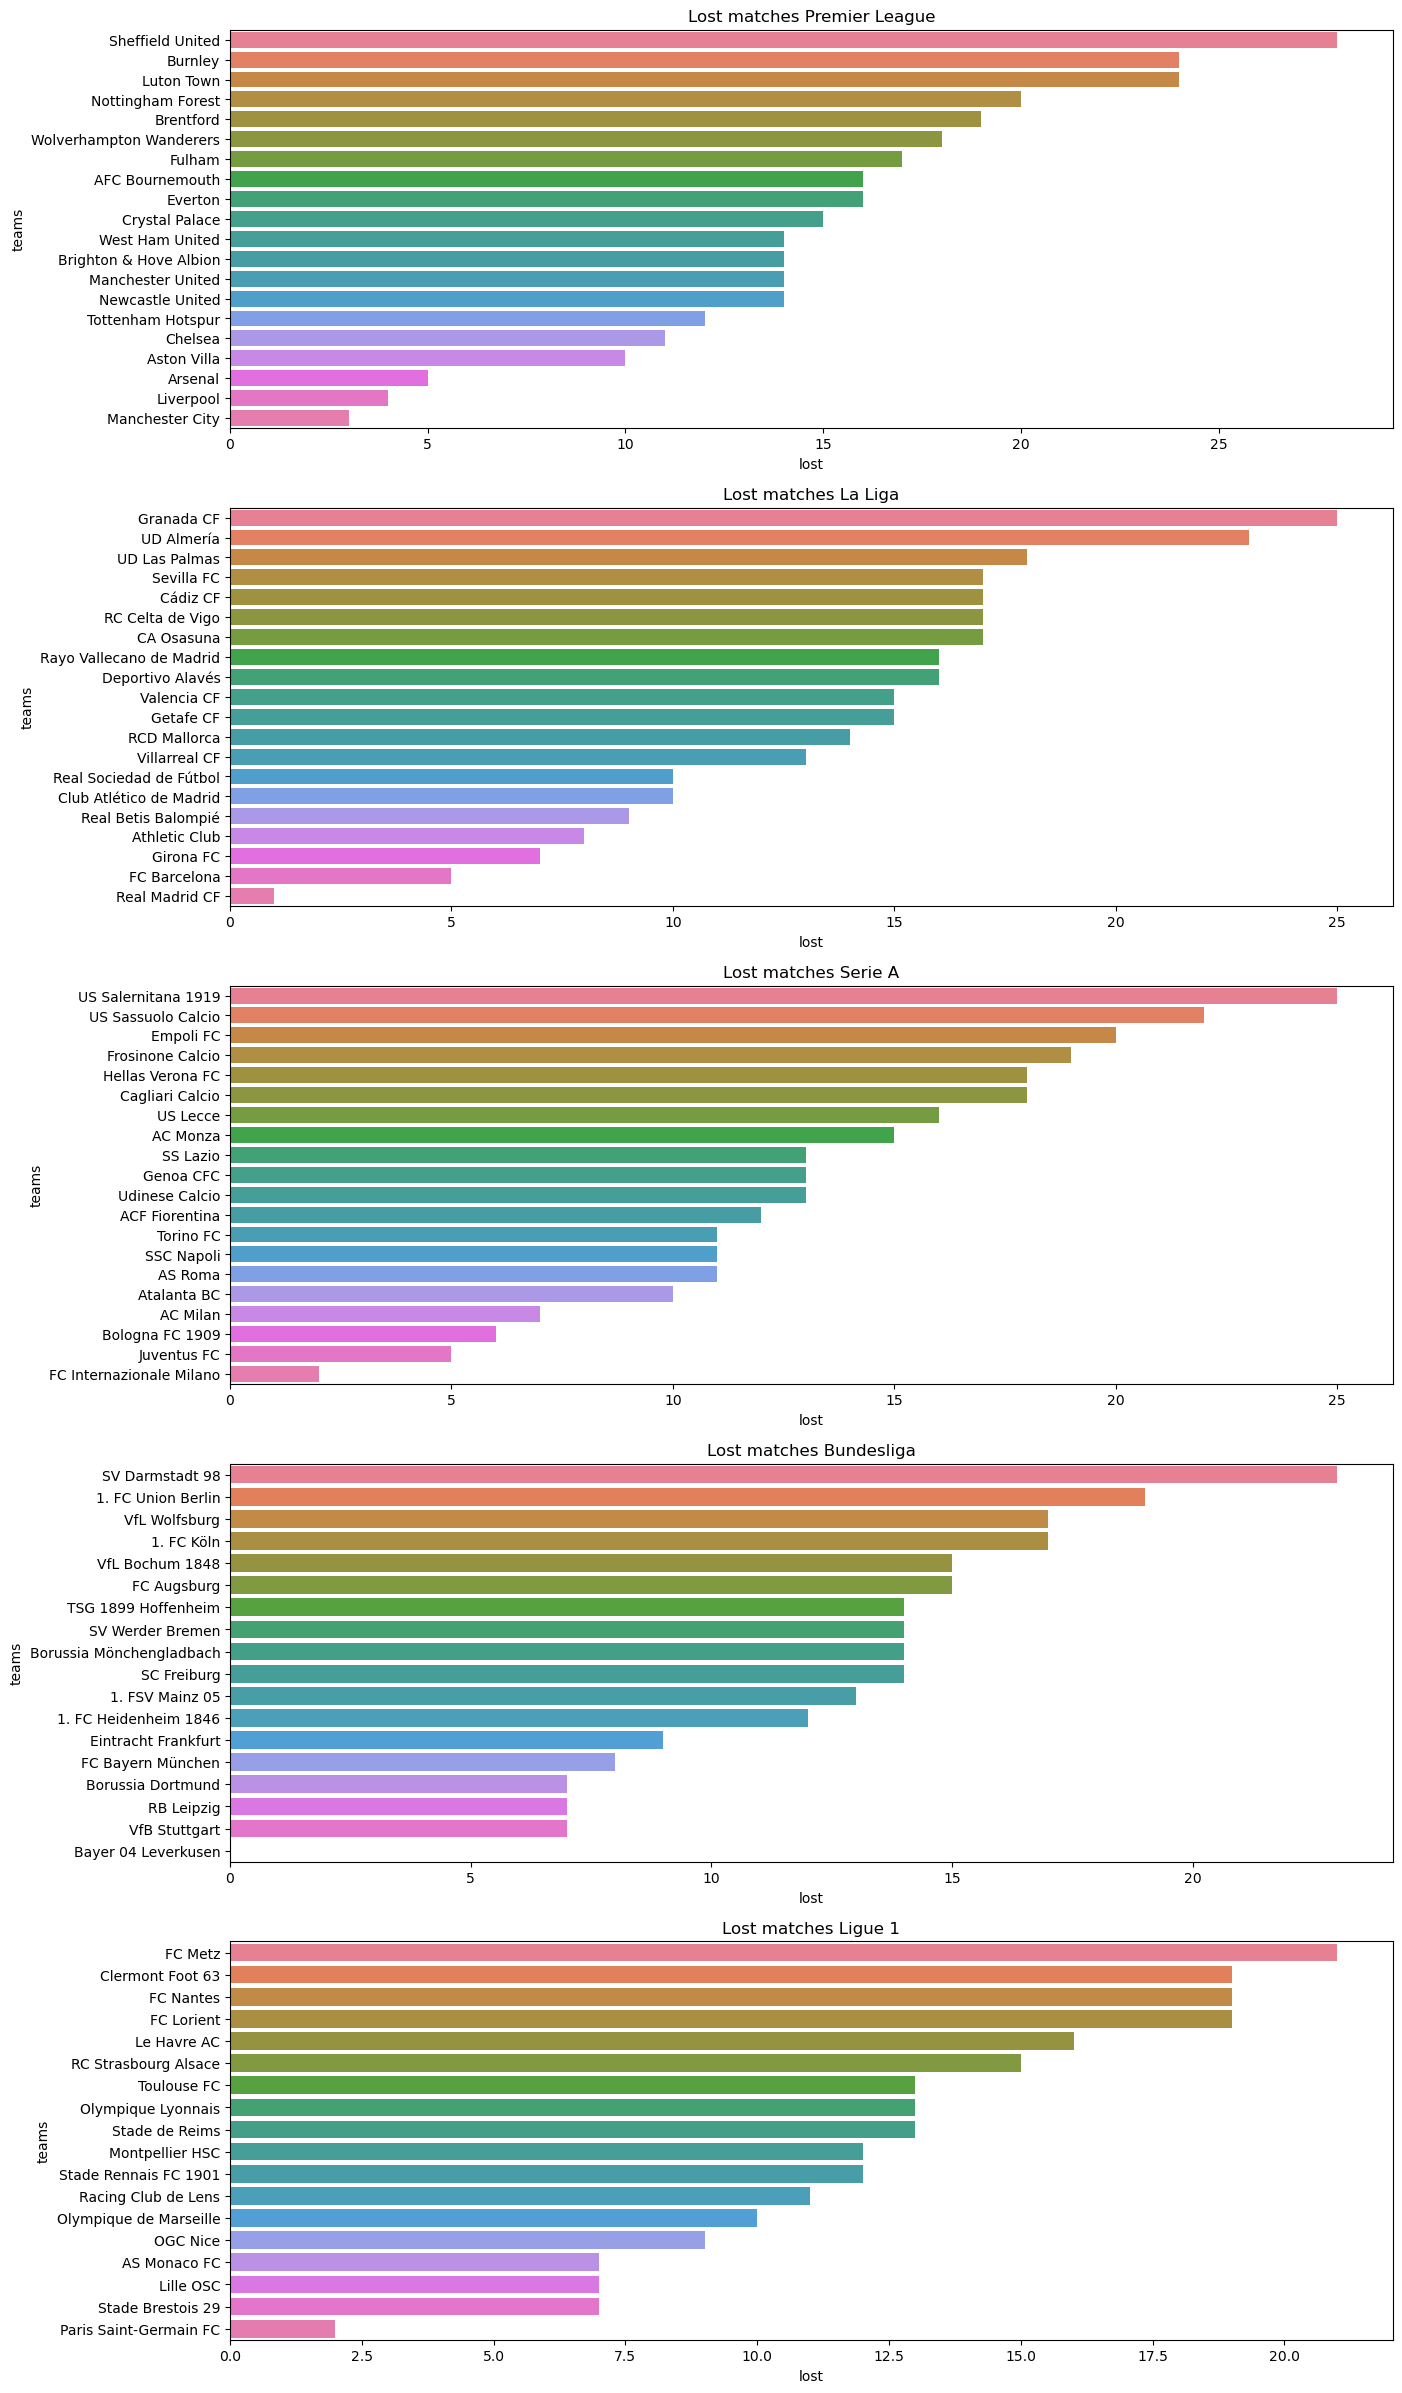

In [121]:
fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(15,30))
ax1=ax[0];ax2=ax[1];ax3=ax[2];ax4=ax[3];ax5=ax[4]

ax1.set_title("Lost matches Premier League")
sns.barplot(data=premier_league,y="teams",x="lost",hue="teams",ax=ax1)

ax2.set_title("Lost matches La Liga")
sns.barplot(data=laLiga,x="lost",y="teams",hue="teams",ax=ax2)

ax3.set_title("Lost matches Serie A")
sns.barplot(data=serieA,x="lost",y="teams",hue="teams",ax=ax3)

ax4.set_title("Lost matches Bundesliga")
sns.barplot(data=bundesliga,x="lost",y="teams",hue="teams",ax=ax4)

ax5.set_title("Lost matches Ligue 1")
sns.barplot(data=ligue1,x="lost",y="teams",hue="teams",ax=ax5);

### Won matches

In [122]:
premier_league.sort_values(by="won",ascending=False,inplace=True)
laLiga.sort_values(by="won",ascending=False,inplace=True)
serieA.sort_values(by="won",ascending=False,inplace=True)
bundesliga.sort_values(by="won",ascending=False,inplace=True)
ligue1.sort_values(by="won",ascending=False,inplace=True)

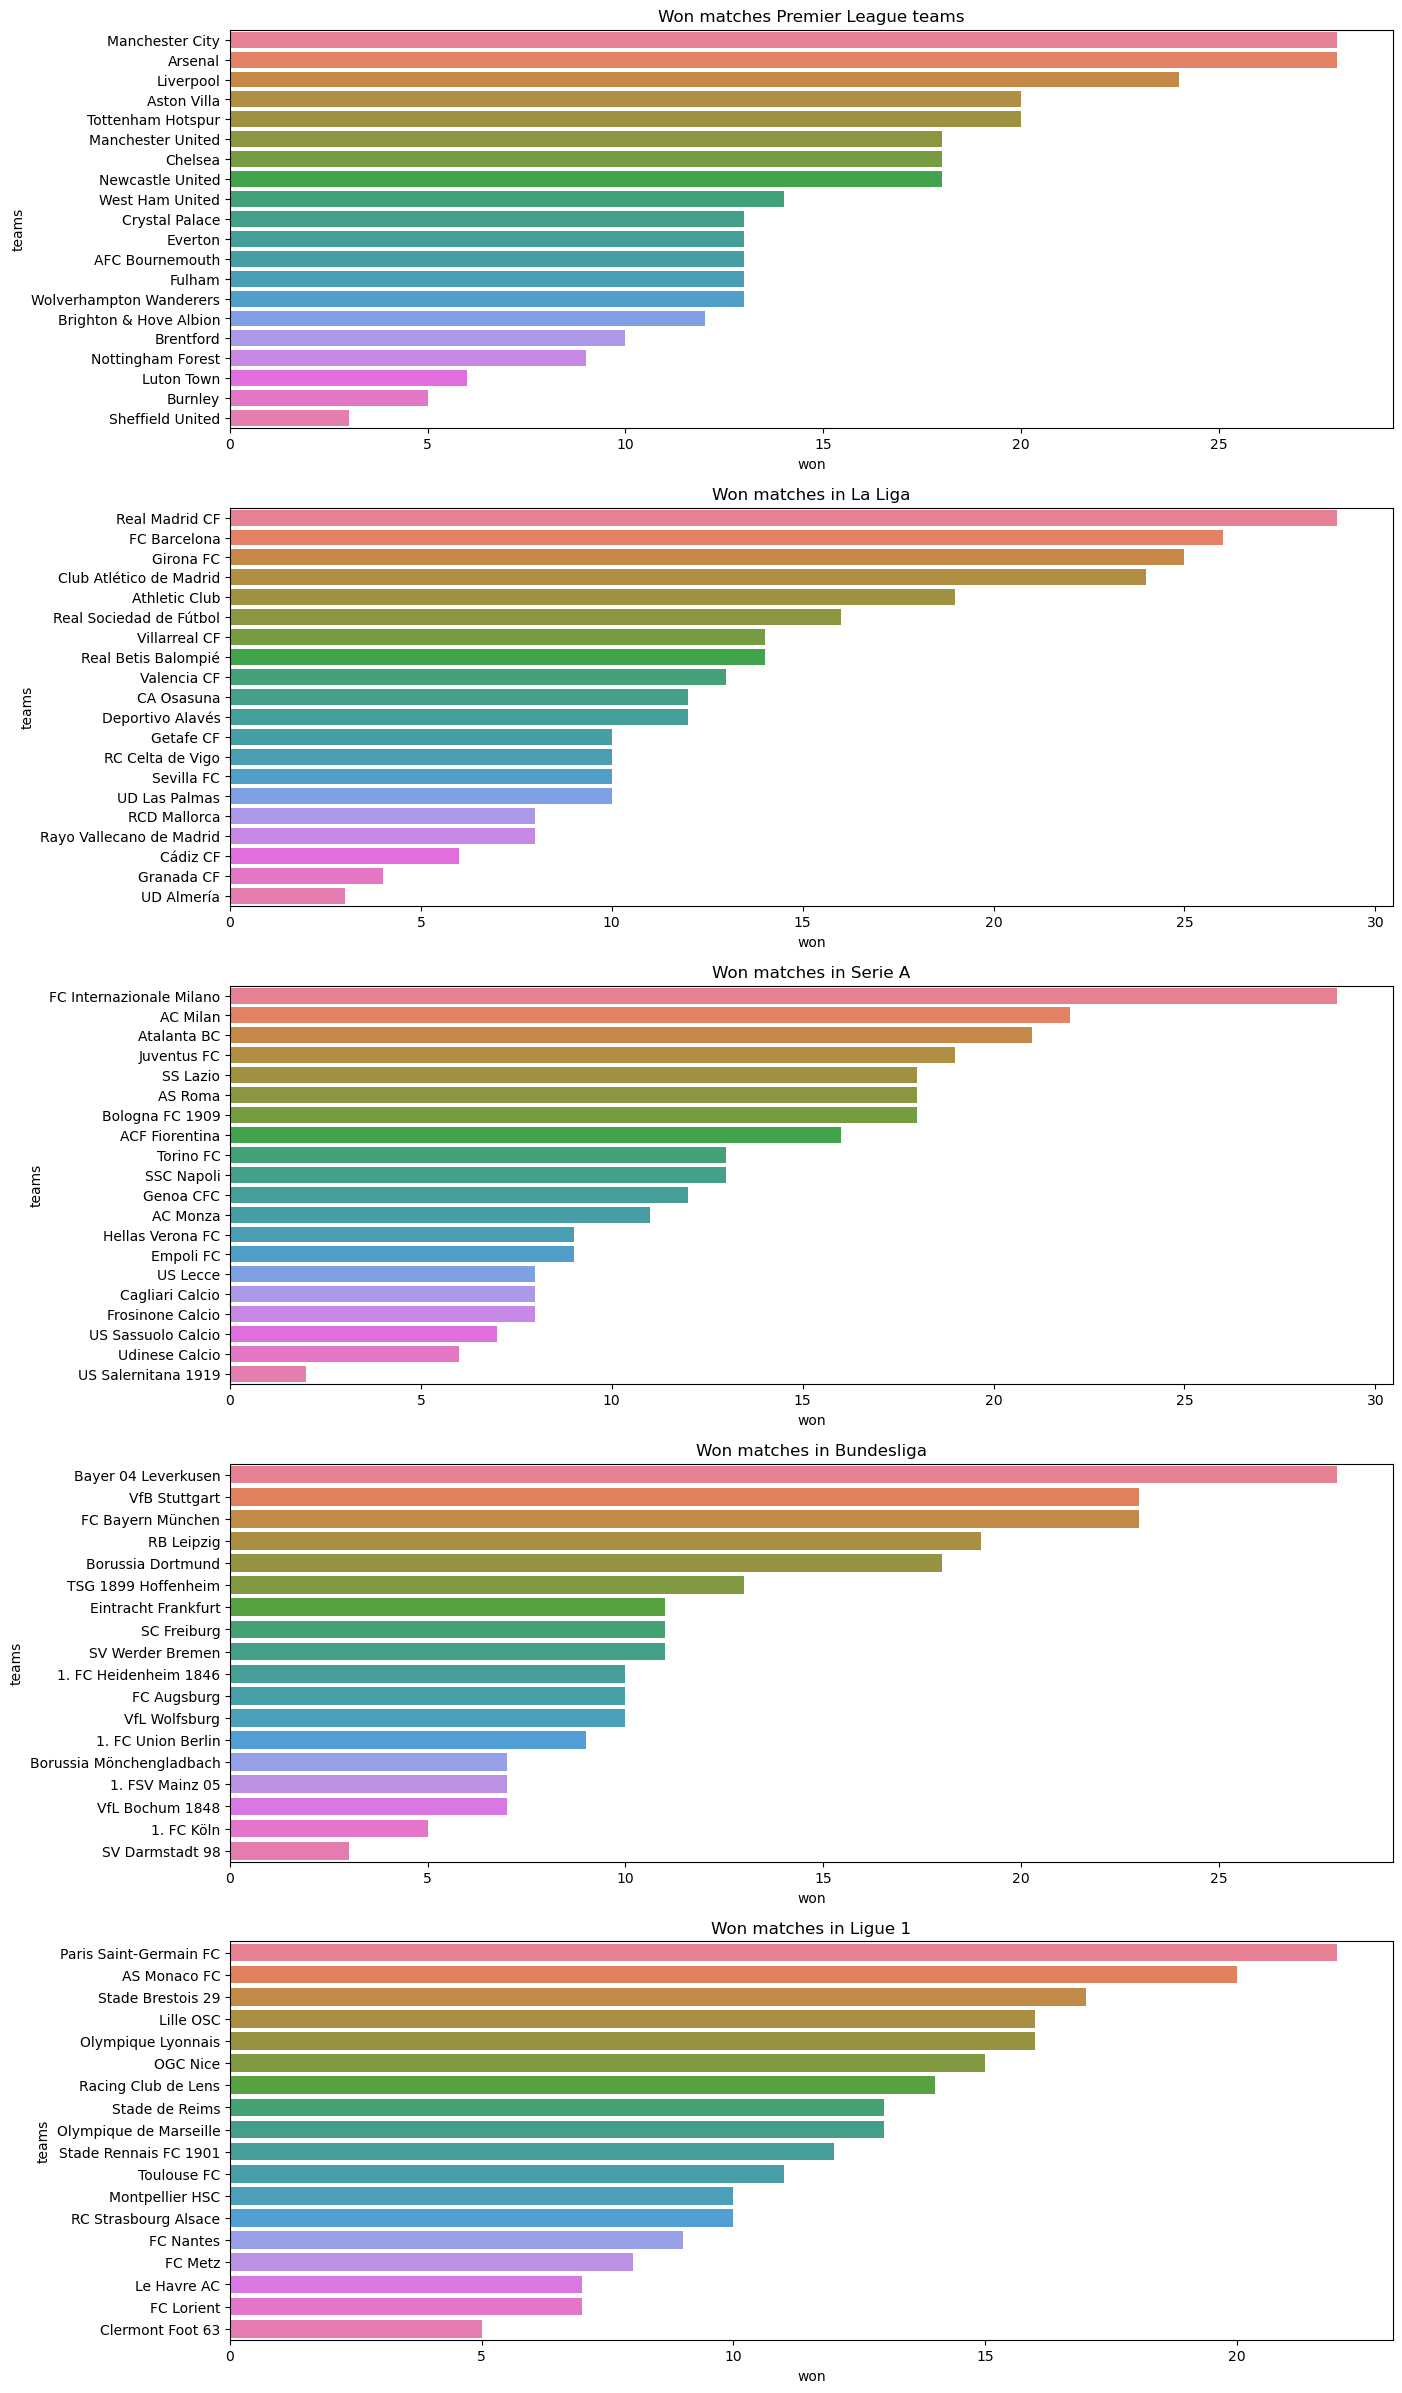

In [123]:
fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(15,30))
ax1=ax[0];ax2=ax[1];ax3=ax[2];ax4=ax[3];ax5=ax[4]

ax1.set_title("Won matches Premier League teams")
sns.barplot(data=premier_league,y="teams",x="won",hue="teams",ax=ax1)

ax2.set_title("Won matches in La Liga")
sns.barplot(data=laLiga,x="won",y="teams",hue="teams",ax=ax2)

ax3.set_title("Won matches in Serie A")
sns.barplot(data=serieA,x="won",y="teams",hue="teams",ax=ax3)

ax4.set_title("Won matches in Bundesliga")
sns.barplot(data=bundesliga,x="won",y="teams",hue="teams",ax=ax4)

ax5.set_title("Won matches in Ligue 1")
sns.barplot(data=ligue1,x="won",y="teams",hue="teams",ax=ax5);

### Points

In [124]:
premier_league.sort_values(by="points",ascending=False,inplace=True)
laLiga.sort_values(by="points",ascending=False,inplace=True)
serieA.sort_values(by="points",ascending=False,inplace=True)
bundesliga.sort_values(by="points",ascending=False,inplace=True)
ligue1.sort_values(by="points",ascending=False,inplace=True)

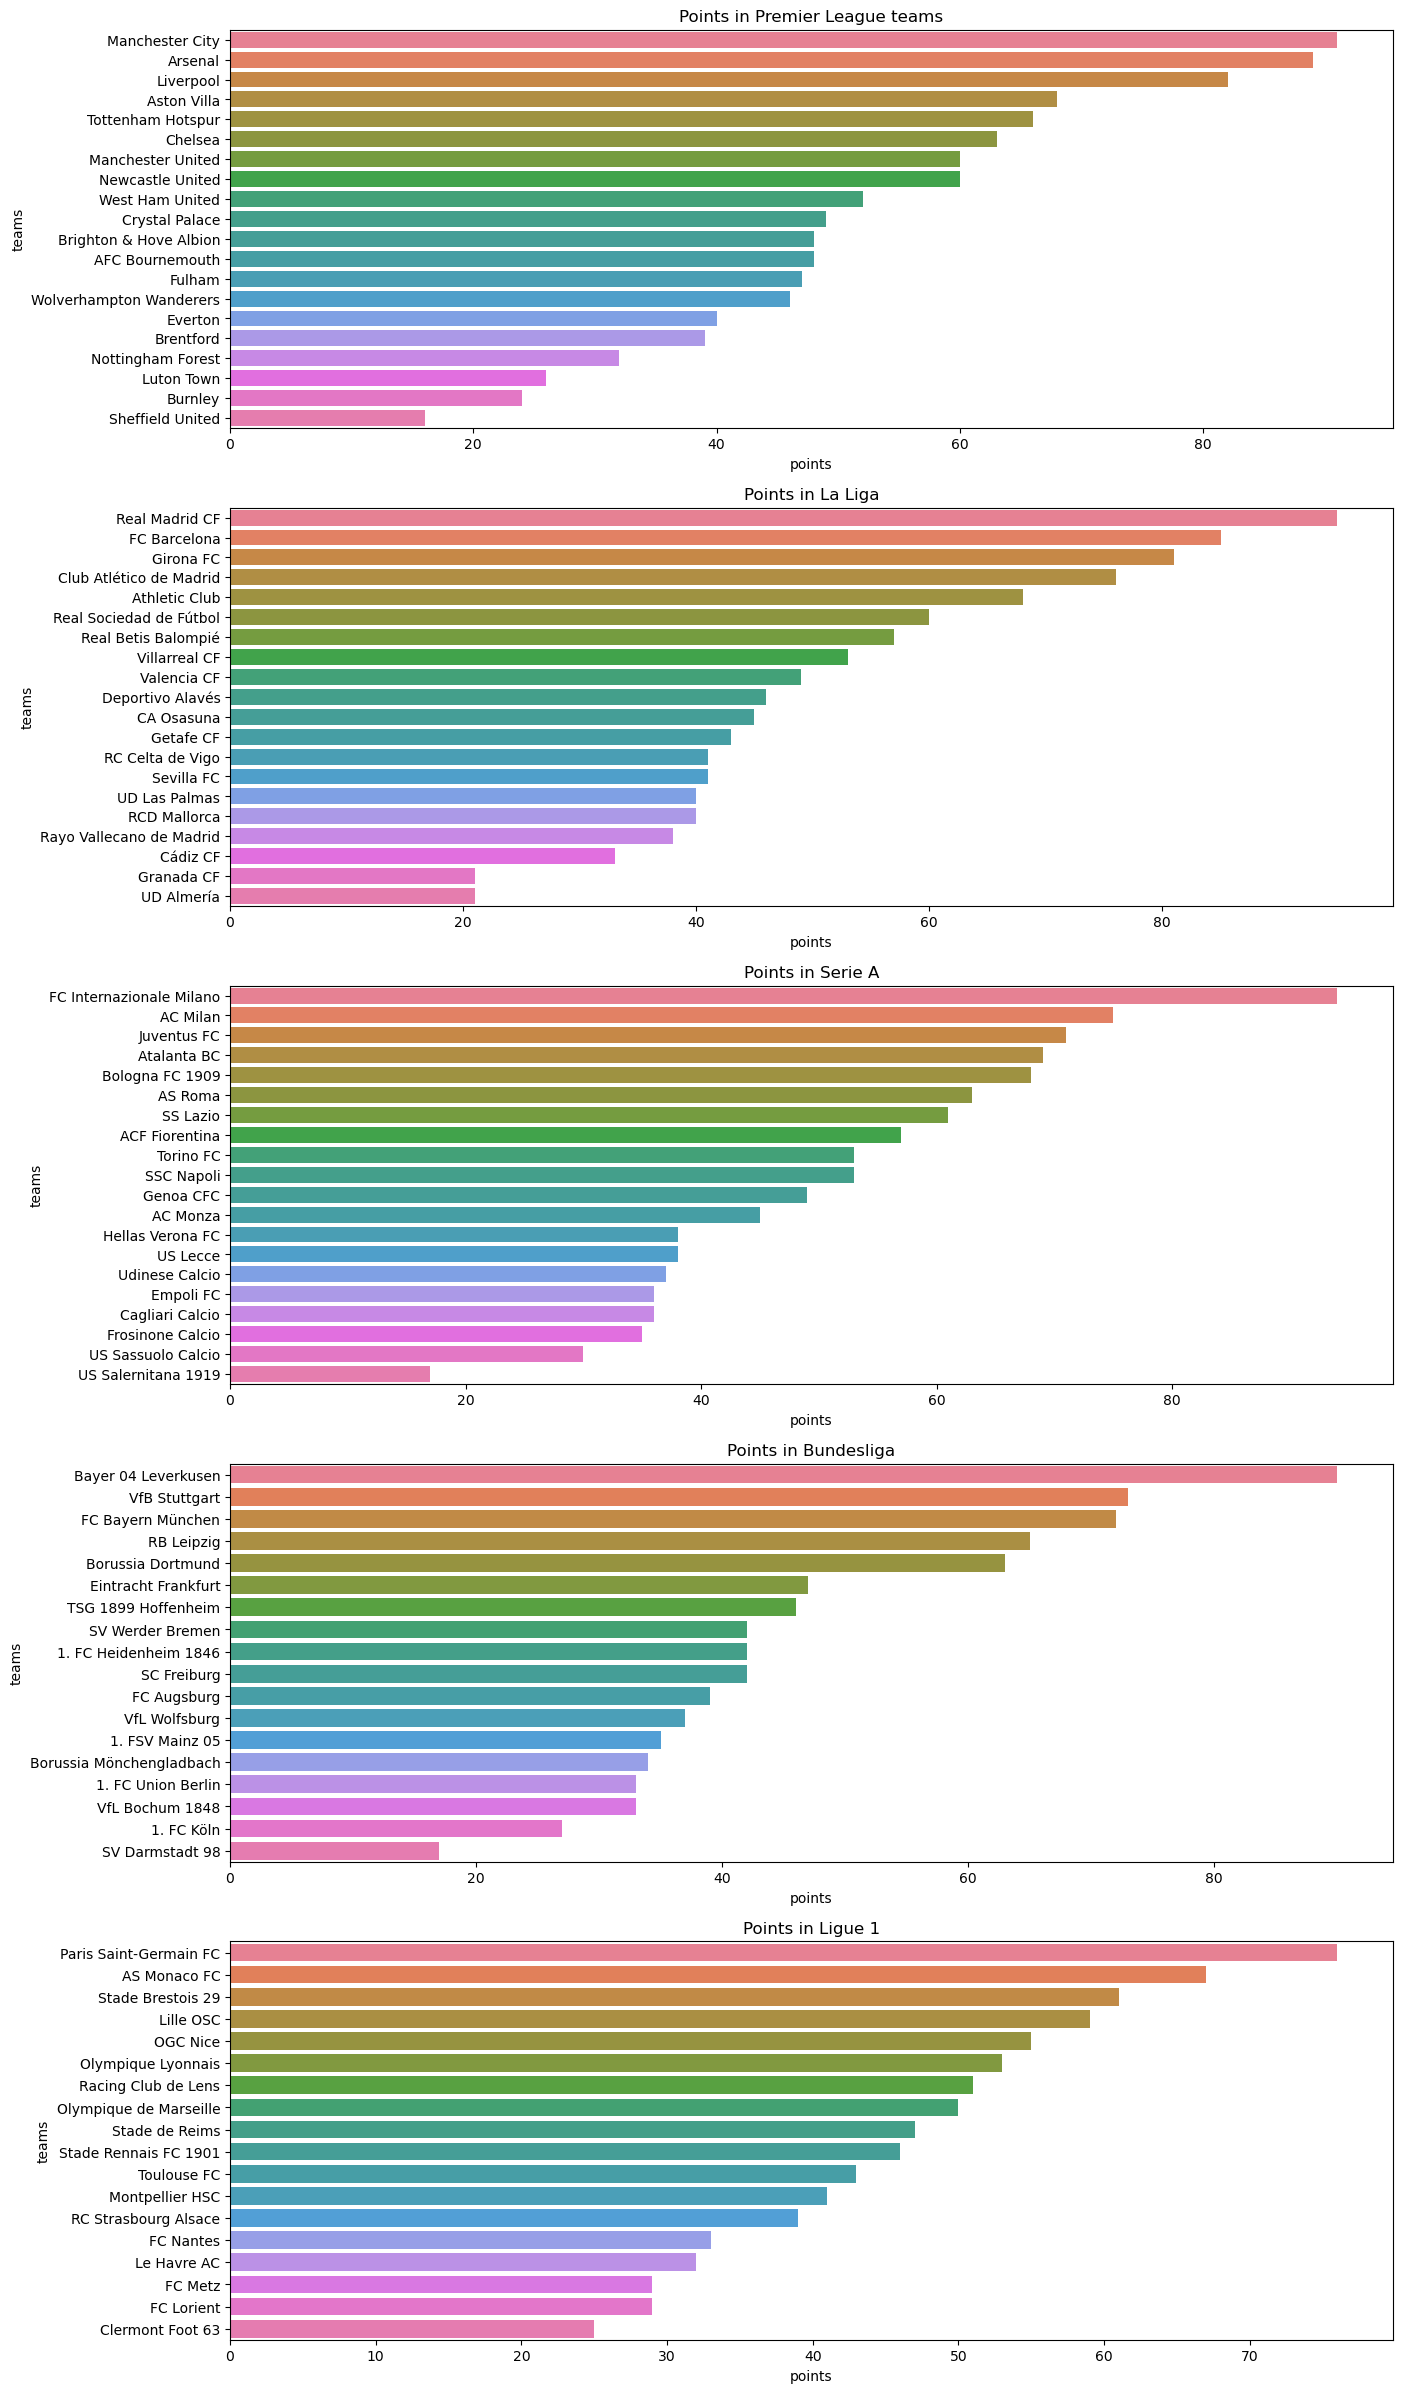

In [125]:
fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(15,30))
ax1=ax[0];ax2=ax[1];ax3=ax[2];ax4=ax[3];ax5=ax[4]

ax1.set_title("Points in Premier League teams")
sns.barplot(data=premier_league,y="teams",x="points",hue="teams",ax=ax1)

ax2.set_title("Points in La Liga")
sns.barplot(data=laLiga,x="points",y="teams",hue="teams",ax=ax2)

ax3.set_title("Points in Serie A")
sns.barplot(data=serieA,x="points",y="teams",hue="teams",ax=ax3)

ax4.set_title("Points in Bundesliga")
sns.barplot(data=bundesliga,x="points",y="teams",hue="teams",ax=ax4)

ax5.set_title("Points in Ligue 1")
sns.barplot(data=ligue1,x="points",y="teams",hue="teams",ax=ax5);

### Win rate

In [126]:
premier_league.sort_values(by="win_rate",ascending=False,inplace=True)
laLiga.sort_values(by="win_rate",ascending=False,inplace=True)
serieA.sort_values(by="win_rate",ascending=False,inplace=True)
bundesliga.sort_values(by="win_rate",ascending=False,inplace=True)
ligue1.sort_values(by="win_rate",ascending=False,inplace=True)

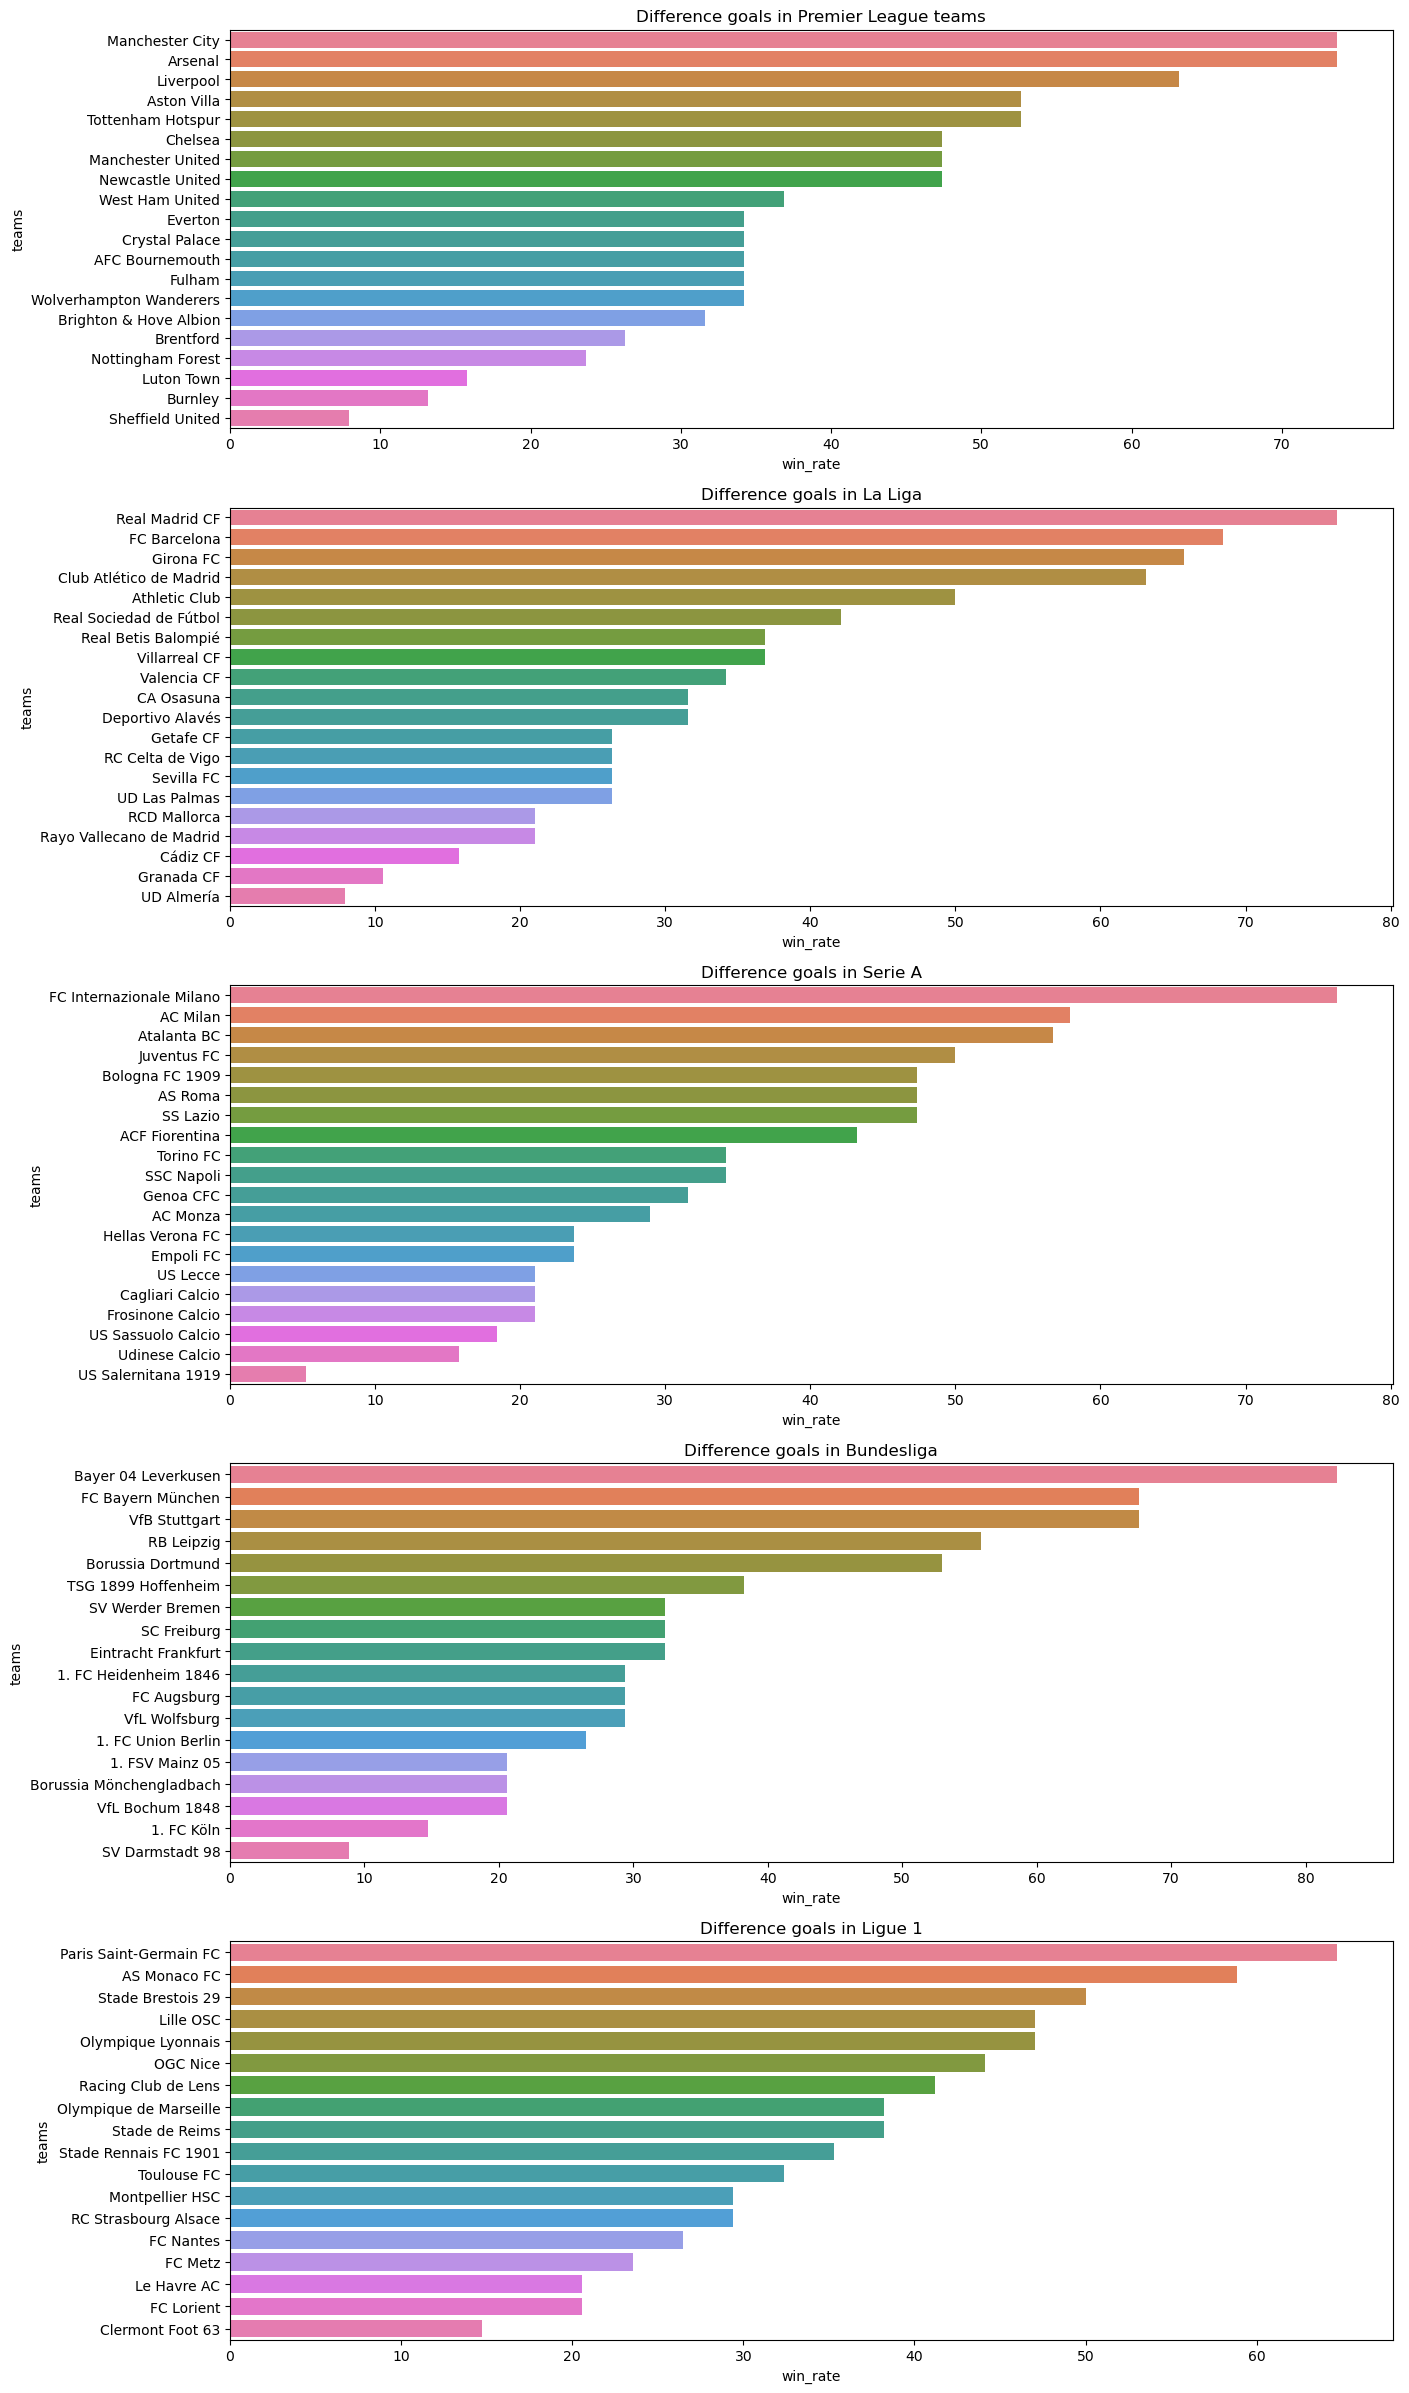

In [127]:
fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(15,30))
ax1=ax[0];ax2=ax[1];ax3=ax[2];ax4=ax[3];ax5=ax[4]

ax1.set_title("Difference goals in Premier League teams")
sns.barplot(data=premier_league,y="teams",x="win_rate",hue="teams",ax=ax1)

ax2.set_title("Difference goals in La Liga")
sns.barplot(data=laLiga,x="win_rate",y="teams",hue="teams",ax=ax2)

ax3.set_title("Difference goals in Serie A")
sns.barplot(data=serieA,x="win_rate",y="teams",hue="teams",ax=ax3)

ax4.set_title("Difference goals in Bundesliga")
sns.barplot(data=bundesliga,x="win_rate",y="teams",hue="teams",ax=ax4)

ax5.set_title("Difference goals in Ligue 1")
sns.barplot(data=ligue1,x="win_rate",y="teams",hue="teams",ax=ax5);

### Loss rate

In [128]:
premier_league.sort_values(by="loss_rate",ascending=False,inplace=True)
laLiga.sort_values(by="loss_rate",ascending=False,inplace=True)
serieA.sort_values(by="loss_rate",ascending=False,inplace=True)
bundesliga.sort_values(by="loss_rate",ascending=False,inplace=True)
ligue1.sort_values(by="loss_rate",ascending=False,inplace=True)

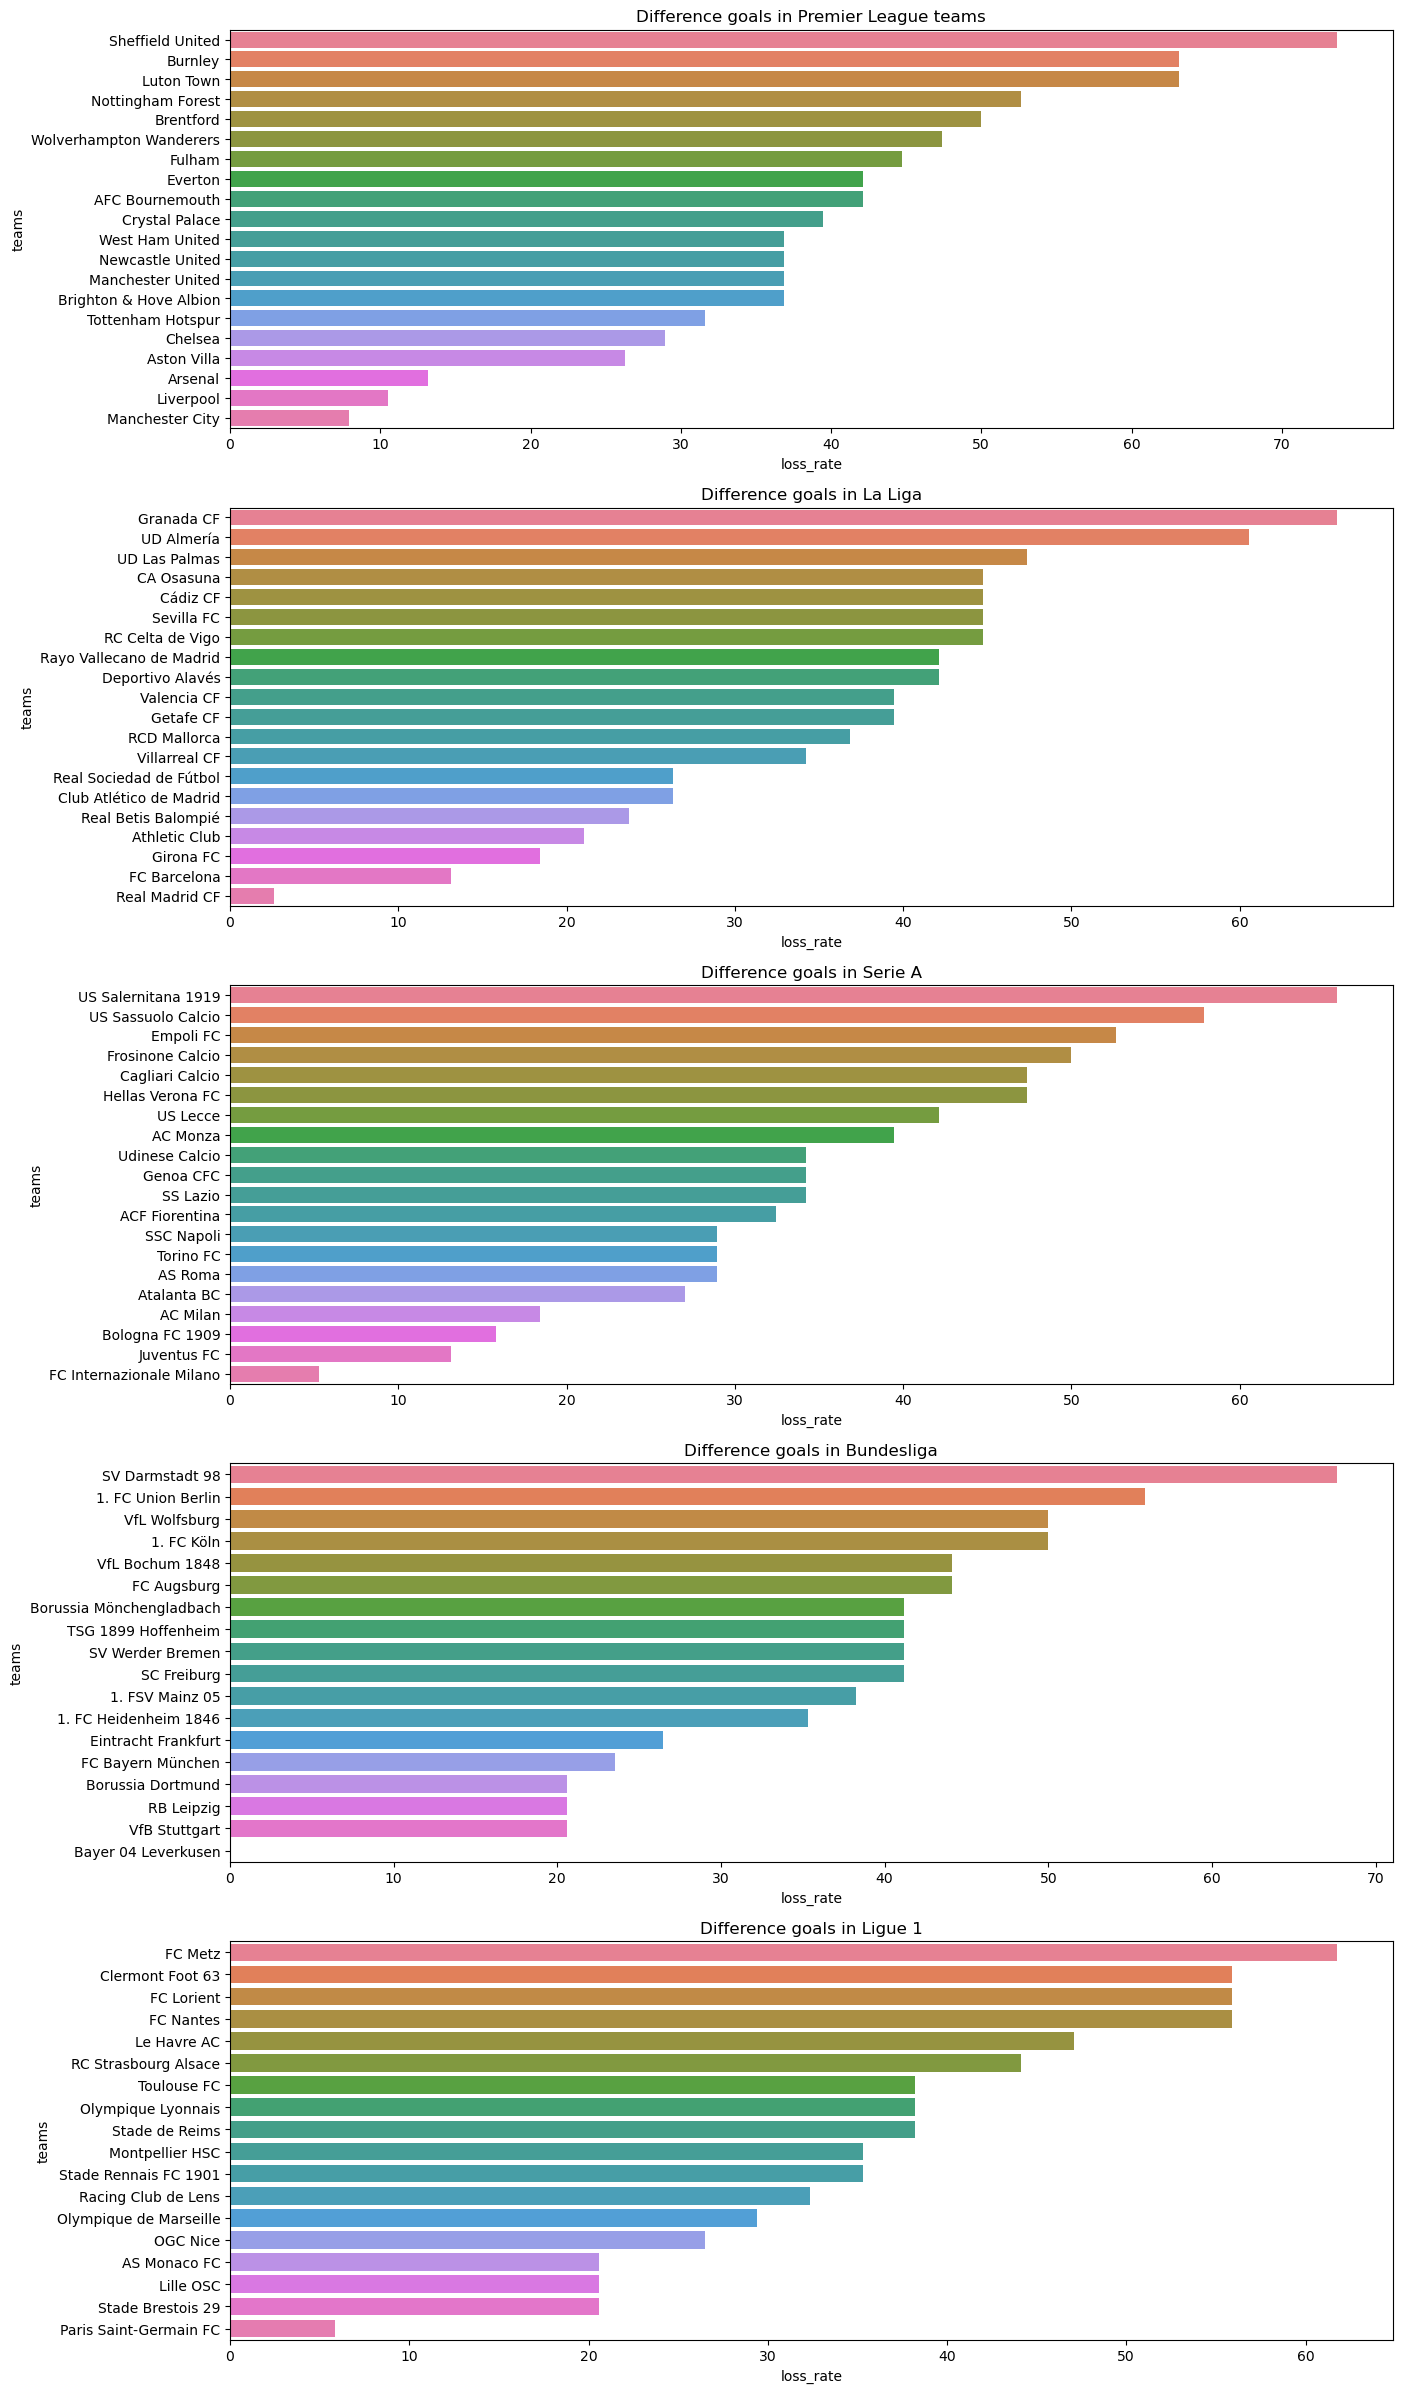

In [129]:
fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(15,30))
ax1=ax[0];ax2=ax[1];ax3=ax[2];ax4=ax[3];ax5=ax[4]

ax1.set_title("Difference goals in Premier League teams")
sns.barplot(data=premier_league,y="teams",x="loss_rate",hue="teams",ax=ax1)

ax2.set_title("Difference goals in La Liga")
sns.barplot(data=laLiga,x="loss_rate",y="teams",hue="teams",ax=ax2)

ax3.set_title("Difference goals in Serie A")
sns.barplot(data=serieA,x="loss_rate",y="teams",hue="teams",ax=ax3)

ax4.set_title("Difference goals in Bundesliga")
sns.barplot(data=bundesliga,x="loss_rate",y="teams",hue="teams",ax=ax4)

ax5.set_title("Difference goals in Ligue 1")
sns.barplot(data=ligue1,x="loss_rate",y="teams",hue="teams",ax=ax5);

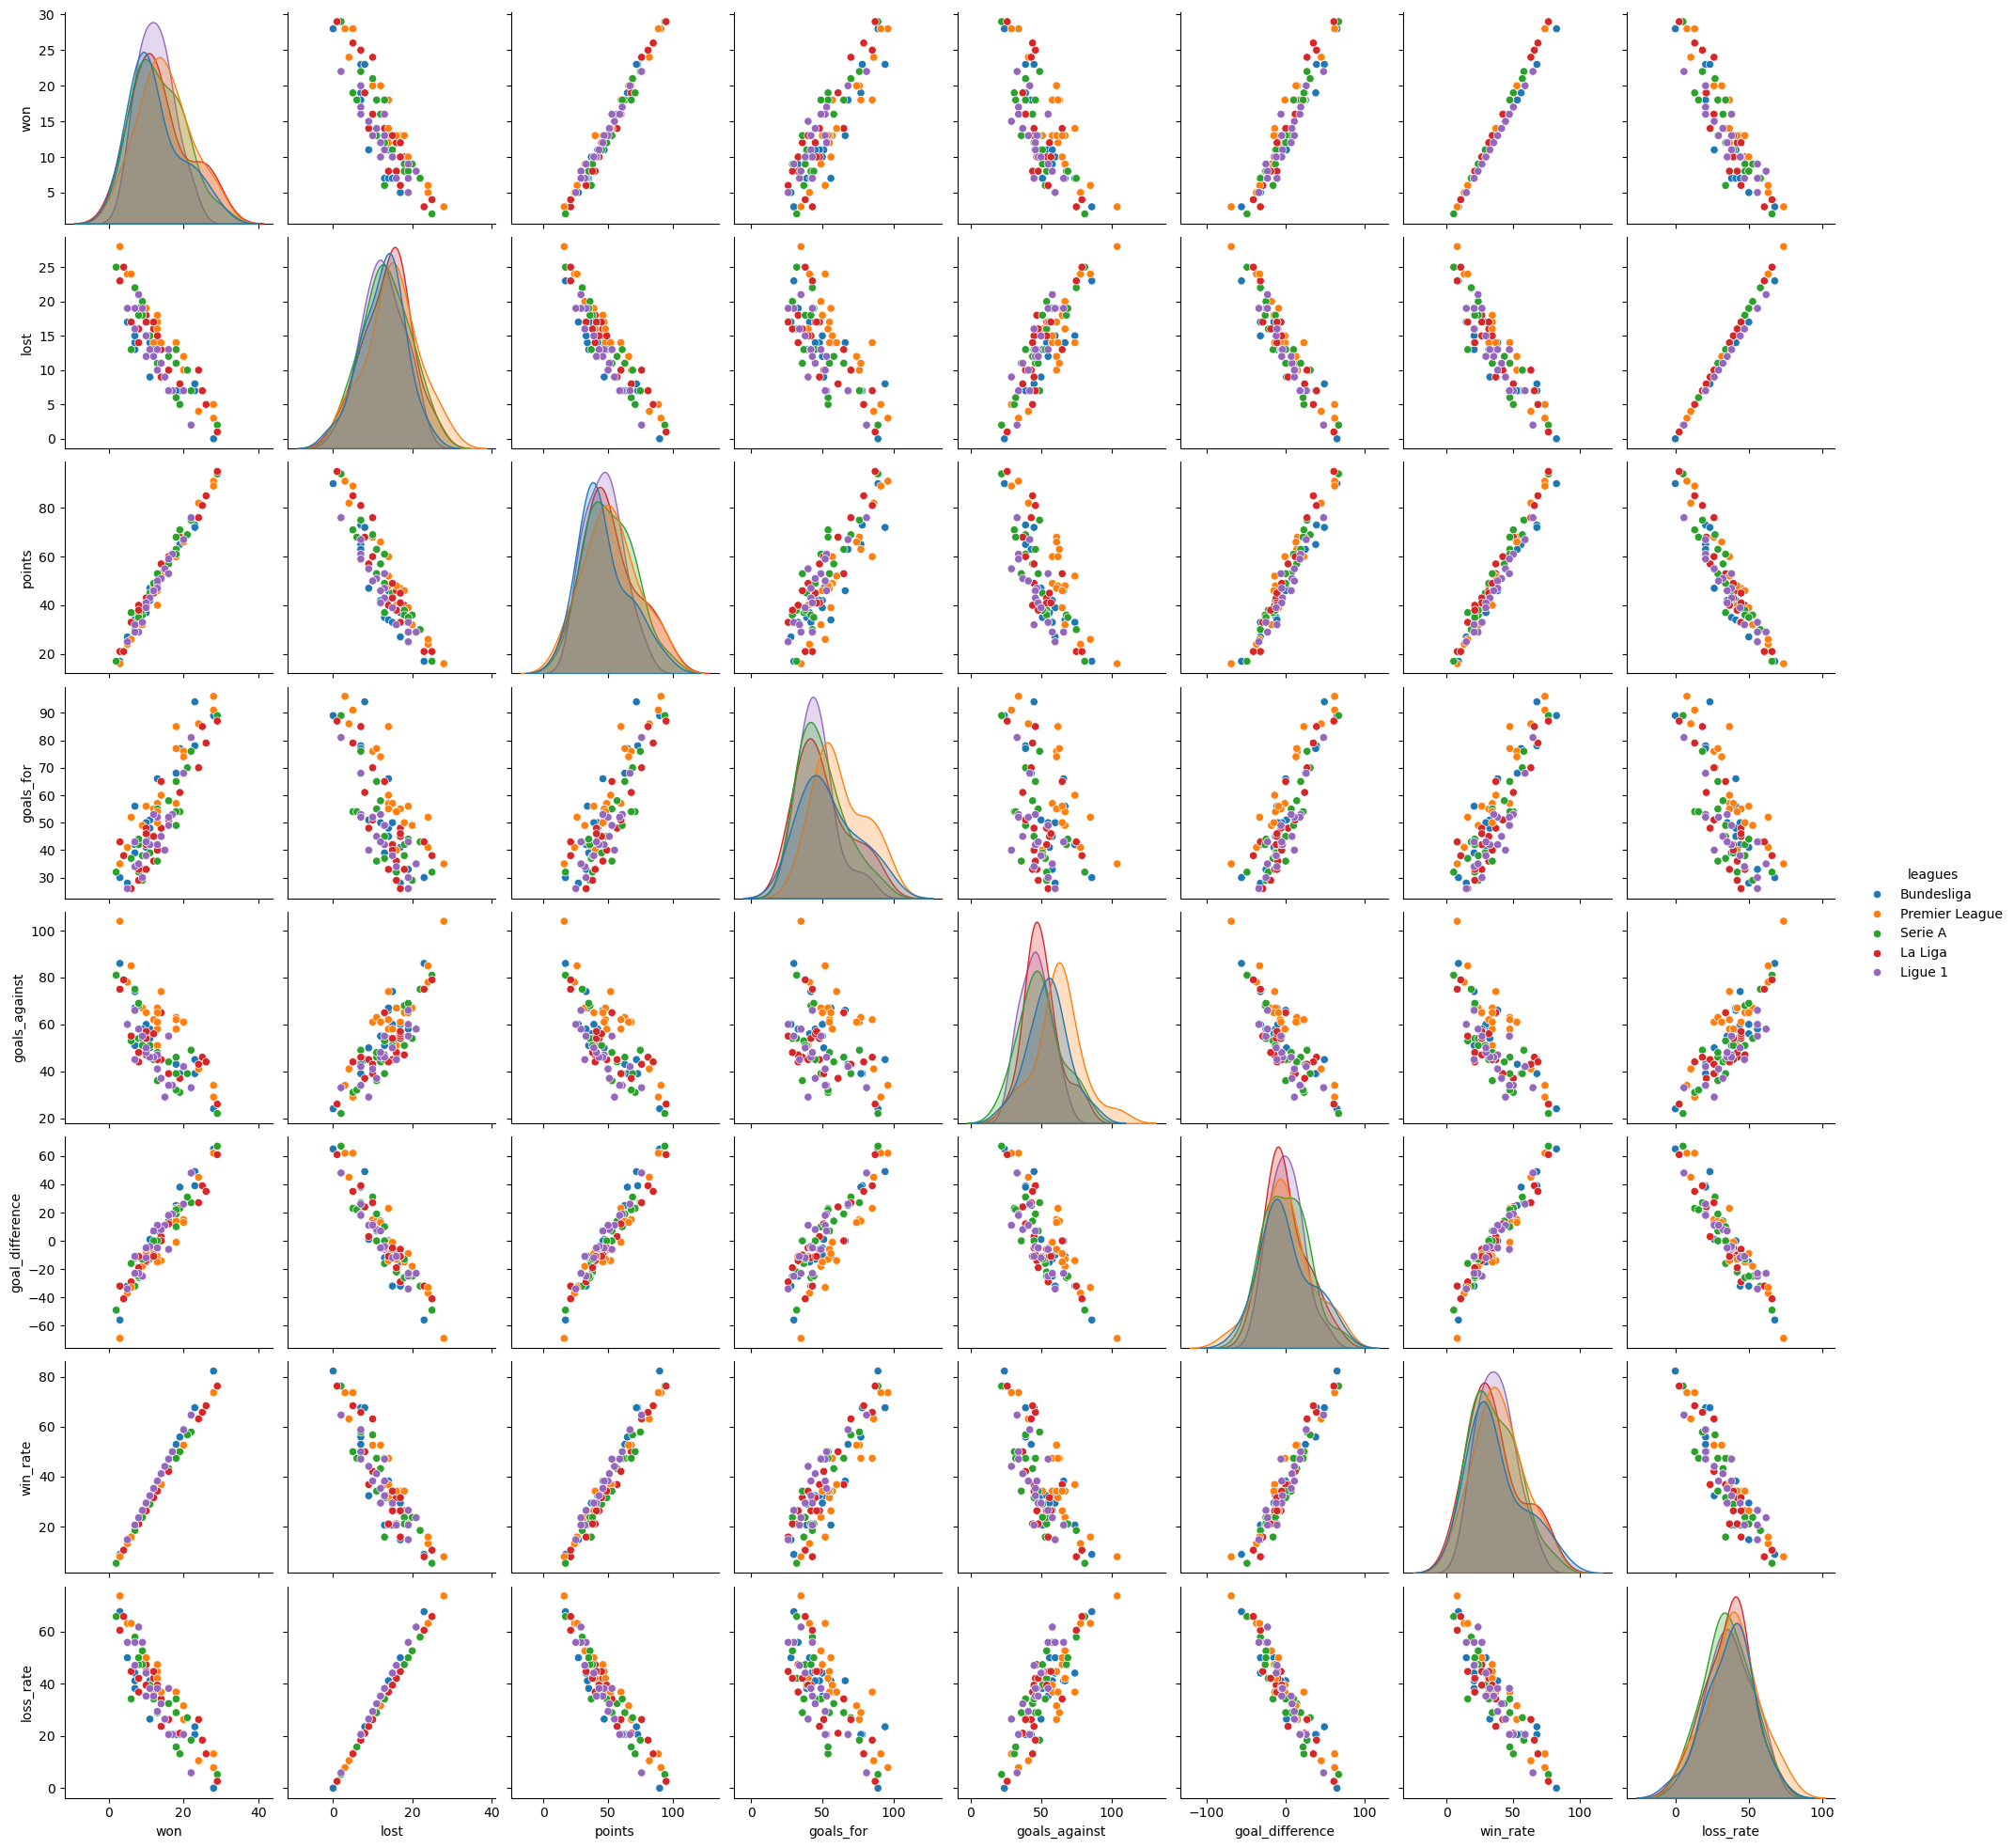

In [130]:
a=df_standings_all[["leagues","won","lost","points","goals_for","goals_against","goal_difference","win_rate","loss_rate"]]
sns.pairplot(data=a,hue="leagues")


## SUMMARY OF THE UNION BETWEEN STANDINGS,SEASONS,LEAGUES AND TEAMS TABLES  
**won:** *The chart shows that, in general, teams have a median of 12.5 wins per season, with a minimum of 2 wins and a maximum of 29.*\
**draw:** *The chart shows that, in general, teams have an average of 9 draws throughout the season, with a minimum of 3 drawn matches and a maximum of 19.*\
**lost:** *The chart shows that, in general, teams have an average of 14 lost games throughout the season, with a minimum of 0 lost games and a maximum of 28.*\
**points:** *The chart shows that, in general, teams have an average of 46 points throughout the season, with a minimum of 16 points and a maximum of 95 points.*\
**goals_for:** *The chart shows that, in general, teams average 49 goals scored throughout the season, with a minimum of 26 goals scored and a maximum of 96.*\
**goals_against:** *The chart shows that, in general, teams have an average of 51 goals scored against them throughout the season, with a minimum of 22 goals scored against and a maximum of 104.*\
**goal_difference:** *The chart shows that, overall, teams have an average goal difference of -5.5 goals, meaning they scored more goals than they conceded. The minimum difference was -69 goals and the maximum was 67, meaning they conceded more goals than they scored.*\

### MULTIVARIABLE DATA ANALYSIS
**won vs goal_difference:** *The graph shows that a higher number of wins results in a higher goal difference (fewer goals conceded). Conversely, a higher number of losses results in a lower goal difference (more goals conceded).*\
**won vs goals_against** *The graph shows that when teams have more games won, it means they have fewer goals against, and vice versa, when teams have fewer games won, they have more goals against.*\
**won vs goals_for:** *The graph shows that when teams win more matches, it means they score more goals. Conversely, when they win fewer matches, they score fewer goals.*\
**won vs points:** *The graph shows the relationship between points and games won. Teams with more games won get more points, and vice versa.*\
**won vs lost:** *The graph shows that teams with more wins have fewer losses, and when they have more losses it means they have fewer wins.*\
**lost vs goals_difference:** *Teams that lose fewer games tend to score more goals; goals scored decrease when teams lose more games.*\
**lost vs goals_against:** *Teams that have lost more games tend to have more goals against; goals against decrease when they have won more games.*\
**lost vs goals_for:** *Teams that have lost more games tend to score more goals; goals scored decrease when teams lose more games.*\
**lost vs points:** *Teams have more points when they win more games and fewer points when they lose more games.*\
**points vs goal_difference:** *The graphic shows a strong relationship between points and difference of goals. This mean that teams have more points  when teams scored more goals instead of have against goals.*\
**points vs goals_against:** *Teams have fewer points when they have conceded more goals.*\
**points vs goals_for:** *Teams have more points when they have scored more goals.*\
**goals_for vs goal_difference:** *Teams with more goals scored have a greater goal difference and vice versa.*\
**goals_for vs goals_againts:** *There is a moderate relationship between goals scored and goals conceded. Teams with more goals scored tend to concede fewer goals, and vice versa.*\
**goals_against vs goals_difference:** *TThere is a strong relationship between goals conceded and goal difference, and this is obvious because when teams have more goals conceded they have less goal difference and vice versa.*\
**leagues vs playued_games:** *The leagues with the most matches played are the Premier League, Serie A, and La Liga. On the other hand, there are the Bundesliga and Ligue 1.*\
**Leagues with more goals:** *Premier A has more goals with 1246, followed by La liga with 1005 goals, Serie A 987 goals, Bundesliga with 985 and finally Ligue 1 with 826 goals.*\
**All the graphics shows a relationship between the differents variables in the table.**


##### PREMIER LEAGUE
**goals_against:** *The teams with the fewest goals against are Arsenal, Manchester City, Liverpool, etc., and the teams with the most goals against are Sheffield United, Luton Town, Burnley, etc.*\
**goal_difference:** *The teams with the greatest goal difference were Arsenal, Manchester City, Liverpool, etc., and the teams with the least goal difference were Sheffield United, Burnley, Luton Town, etc.*\
**Lost matches:** *The teams with the fewest defeats were Manchester City, Liverpool, and Arsenal. On the other hand, the teams with the most defeats were Sheffield United, Burnley, Luton Town, and others.*\
**Won matches:** *The teams with the most wins were Manchester City, Arsenal, Liverpool, etc.*\
**Points:** *The teams with more points along the season were Manchester City,Arsenal,Liverpool,etc.*

##### LA LIGA
**goals_against:** *The teams with the fewest goals against are Real Madrid FC, Athletic Club, Real Sociedad de Futbol, etc., and the teams with the most goals against are Granada FC, UD Almeria, Villareal FC, etc.*\
**goal_difference:** *The teams with the greatest goal difference were Real Madrid FC, Girona FC, FC Barcelona, etc., and the teams with the least goal difference were Granada FC, UD Almeria, Cadiz FC, etc.*\
**Lost matches:** *The teams with the fewest defeats were Real Madrid FC, FC Barcelona, and Girona FC. On the other hand, the teams with the most defeats were Granada FC, UD Almeria ,UD Las Palmas, and others.*\
**Won matches:** *The teams with the most wins were Real Madrid FC, FC Barcelona, Girona FC, etc.*\
**Points:** *The teams with more points along the season were Real Madrid FC, FC Barcelona, Girona FC, etc.*

##### Serie A
**goals_against:** *The teams with the fewest goals against are FC Internazionale Milano, Juventus FC, Bologna FC 1909, etc., and the teams with the most goals against are US Salernitana 1919, US Sassuolo Calcio,Frosinone Calcio, etc.*\
**goal_difference:** *The teams with the greatest goal difference were FC Internazionale Milano, Atlanta FC, AC Milan, etc., and the teams with the least goal difference were US Salernitana 1919, US Sassuolo Calcio, Cagliari Calcio, etc.*\
**Lost matches:** *The teams with the fewest defeats were FC Internazionale Milano, Juventus FC, and Bologna FC 1909. On the other hand, the teams with the most defeats were US Salernitana 1919, US Sassuolo Calcio ,Empoli FC, and others.*\
**Won matches:** *The teams with the most wins were FC Internazionale Milano, AC Milan, Atlanta BC, etc.*\
**Points:** *The teams with more points along the season were FC Internazionale Milano, AC Milan, Juventus FC, etc.*

##### BUNDESLIGA
**goals_against:** *The teams with the fewest goals against are Bayer 04 Leverkusen, RB Leipzing, VFB Stuttgart, etc., and the teams with the most goals against are SV Darmstadt 98, VFL Bochum 1848, etc.*\
**goal_difference:** *The teams with the greatest goal difference were Bayer 04 Leverkusen, FC Bayern Munchen, VFB Stuttgart, etc., and the teams with the least goal difference were SV Darmstadt 98, FC Koln, VFL Bochum 1848, etc.*\
**Lost matches:** *The teams with the fewest defeats were Bayer 04 Leverkusen, VFB Stuttgart, and RB Leipzing. On the other hand, the teams with the most defeats were SV Darmstadt 98,FC Union Berlin ,VFL Wolfsburg, and others.*\
**Won matches:** *The teams with the most wins were Bayer 04 Leverkusen, VFB Stuttgart, FC Bayern Munchen, etc.*\
**Points:** *The teams with more points along the season were Bayer 04 Leverkusen, VFB Stuttgart, FC Bayern Munchen, etc.*

##### LIGUE 1
**goals_against:** *The teams with the fewest goals against are OGC Nice, Paris Saint-Germain FC, Stade Brestois FC, etc., and the teams with the most goals against are FC Lorient, Clermont Foot 63, FC Mentz, etc.*\
**goal_difference:** *The teams with the greatest goal difference were Paris Saint-Germain FC, AS Monaco FC, Stade Brestois 29, etc., and the teams with the least goal difference were Clermont Foot 63, FC Nantes, FC Lorient, etc.*\
**Lost matches:** *The teams with the fewest defeats were Paris Saint-Germain FC, Stade Brestois FCStade Brestois FC, and Lile OSC. On the other hand, the teams with the most defeats were FC Mentz,Clermont Foot 63, FC Lorient, and others.*\
**Won matches:** *The teams with the most wins were Paris Saint-Germain FC, AS Monaco, Stade Brestois 29, etc.*\
**Points:** *The teams with more points along the season were Paris Saint-Germain FC, AS Monaco, Stade Brestois 29, etc.*

## TEAMS FULL DATASET 

In [161]:
df_teams_all=pd.read_sql("""SELECT teams.team_id,teams.name AS team,teams.founded_year,leagues.name AS league,leagues.country,
            coaches.name AS coach,coaches.nationality AS coach_nation,players.name AS player,players.position,  
            players.date_of_birth,players.nationality AS player_nation FROM teams LEFT JOIN leagues 
            ON teams.league_id=leagues.league_id
            LEFT JOIN coaches ON teams.coach_id=coaches.coach_id
            RIGHT JOIN players ON teams.team_id=players.team_id;

""",conn)
df_teams_all

team_id                  team  founded_year   league country  \
0          77         Athletic Club        1898.0  La Liga   Spain   
1          77         Athletic Club        1898.0  La Liga   Spain   
2          77         Athletic Club        1898.0  La Liga   Spain   
3          77         Athletic Club        1898.0  La Liga   Spain   
4          77         Athletic Club        1898.0  La Liga   Spain   
...       ...                   ...           ...      ...     ...   
3145      576  RC Strasbourg Alsace        1906.0  Ligue 1  France   
3146      576  RC Strasbourg Alsace        1906.0  Ligue 1  France   
3147      576  RC Strasbourg Alsace        1906.0  Ligue 1  France   
3148      576  RC Strasbourg Alsace        1906.0  Ligue 1  France   
3149      576  RC Strasbourg Alsace        1906.0  Ligue 1  France   

                 coach coach_nation              player    position  \
0     Ernesto Valverde        Spain          Unai Simón  Goalkeeper   
1     Ernesto Valverde        Spain  Julen Agirrezabala  Goalkeeper   
2     Ernesto Valverde        Spain        Álex Padilla  Goalkeeper   
3     Ernesto Valverde        Spain      Yuri Berchiche     Defence   
4     Ernesto Valverde        Spain       Yeray Álvarez     Defence   
...                ...          ...                 ...         ...   
3145    Patrick Vieira       France        Jérémy Sebas     Offence   
3146    Patrick Vieira       France     Mohamed Bechikh     Offence   
3147    Patrick Vieira       France       Aboubacar Ali     Offence   
3148    Patrick Vieira       France       Vignon Ouotro     Offence   
3149    Patrick Vieira       France      Tidiane Diallo     Offence   

     date_of_birth player_nation  
0       1997-06-11         Spain  
1       2000-12-26         Spain  
2       2003-09-01         Spain  
3       1990-02-10         Spain  
4       1995-01-24         Spain  
...            ...           ...  
3145    2003-04-14    Martinique  
3146    2005-07-13        France  
3147    2006-04-02        France  
3148    2005-09-13   Ivory Coast  
3149    2006-05-28        France  

[3150 rows x 11 columns]

In [192]:
df_teams_all_dict=df_teams_all.sample(n=1000,random_state=42)
df_teams_all_dict=df_teams_all_dict.to_dict(orient="records")
template=ChatPromptTemplate.from_messages([
    ("system","You are an expert data scientist who analyzes charts and data frames professionally and analytically. You are concise in your answers and provide recommendations and your professional perspective."),
    ("user","Explain the dataset to me clearly and also tell me how to analyze it; that is, what graphs and operations would be useful to apply. The dataset is: {dataset}")    
])
chain=template|llm
response=chain.invoke({"dataset":df_teams_all_dict})
display(Markdown(response.content))

This dataset provides information about individual football players and their respective teams, coaches, and league affiliations. Each entry represents a single player with details about their team, the team's founding year, league, country, coach, coach's nationality, player's position, date of birth, and player's nationality.

**Dataset Description:**

*   **`team_id`**: Unique identifier for each team (numerical).
*   **`team`**: Name of the football club (categorical/string).
*   **`founded_year`**: Year the team was founded (numerical, some missing values).
*   **`league`**: The professional football league the team belongs to (categorical/string).
*   **`country`**: Country where the team is located (categorical/string).
*   **`coach`**: Name of the team's coach (categorical/string).
*   **`coach_nation`**: Nationality of the coach (categorical/string, some missing values).
*   **`player`**: Name of the player (categorical/string).
*   **`position`**: Player's primary playing position (categorical/string: Offence, Defence, Midfield, Goalkeeper).
*   **`date_of_birth`**: Player's date of birth (datetime object).
*   **`player_nation`**: Nationality of the player (categorical/string).

---

**How to Analyze the Dataset:**

**1. Data Preparation & Cleaning:**

*   **Handle Missing Values:** For `founded_year`, consider imputation (e.g., median or mean if appropriate, or a placeholder) or dropping rows if missing values are few. For `coach_nation`, treat `None` as 'Unknown' or 'N/A'.
*   **Derive Age:** Calculate the current age of each player from `date_of_birth`. This will be a crucial numerical feature.
*   **Data Types:** Ensure `founded_year` is numeric (integer) and `date_of_birth` is a datetime object.

**2. Useful Graphs and Operations (Exploratory Data Analysis):**

Here are key questions and corresponding analytical approaches:

*   **Overall Distributions:**
    *   **Player Positions:**
        *   *Operation:* Count occurrences of each `position`.
        *   *Graph:* Bar chart to visualize the distribution of players across positions.
    *   **Leagues:**
        *   *Operation:* Count occurrences of each `league`.
        *   *Graph:* Bar chart to show the number of players/teams from each league.
    *   **Countries (Team, Player, Coach):**
        *   *Operation:* Count occurrences for `country`, `player_nation`, `coach_nation`.
        *   *Graph:* Bar charts (for top N countries) to understand geographic representation.
    *   **Team Founding Years:**
        *   *Operation:* Histogram of `founded_year`.
        *   *Graph:* Histogram to see the distribution of team ages.
    *   **Player Age:**
        *   *Operation:* Calculate `age` from `date_of_birth`. Histogram of `age`.
        *   *Graph:* Histogram to understand the age profile of players in the dataset.

*   **Comparative Analysis:**
    *   **Average Player Age by Position:**
        *   *Operation:* Group by `position` and calculate the mean `age`.
        *   *Graph:* Bar chart or Box plot to compare age distributions across positions.
    *   **Player Nationalities per League:**
        *   *Operation:* Group by `league` and then count `player_nation`.
        *   *Graph:* Stacked bar chart or a series of bar charts for each league.
    *   **Coach Nationalities per League/Country:**
        *   *Operation:* Group by `league` or `country` and count `coach_nation`.
        *   *Graph:* Bar charts to see if certain leagues or countries prefer coaches of specific nationalities.
    *   **Team Founding Year vs. Player Age:**
        *   *Operation:* Scatter plot of `founded_year` vs. average `age` per team.
        *   *Graph:* Scatter plot to explore if older/newer teams tend to have older/younger players.
    *   **Player Age Distribution by League:**
        *   *Operation:* Box plots of `age` grouped by `league`.
        *   *Graph:* Box plots to compare player age ranges across different leagues.

*   **Relationships & Patterns:**
    *   **Coach Nationality vs. Player Nationality:**
        *   *Operation:* Create a cross-tabulation (contingency table) of `coach_nation` and `player_nation`.
        *   *Insight:* Identify if coaches tend to recruit players from their own nation.
    *   **Most Common Player-Coach Nationality Pairings:**
        *   *Operation:* Combine `player_nation` and `coach_nation` into a new categorical variable and count.
        *   *Insight:* Discover dominant nationality combinations.

---

**Professional Perspective & Recommendations:**

This dataset is rich for understanding the demographics of professional football.

1.  **Talent Scouting:** Analyze player age and position distributions to identify potential talent pools or where younger players are typically found (e.g., are certain leagues more youth-focused?).
2.  **Recruitment Strategy:** For clubs, understanding player and coach nationality trends in different leagues can inform recruitment strategies (e.g., if a league has a strong contingent of players from a particular country, it might indicate a good scouting ground).
3.  **League Characteristics:** Compare player age profiles, position distributions, and national diversity across leagues to understand unique characteristics or competitive strategies of each league.
4.  **Coaching Trends:** Investigate if there are dominant coaching nationalities or if certain countries produce more coaches for top leagues.
5.  **Historical Context:** The `founded_year` can offer insights into the historical depth of teams and if older clubs have different player profiles or coaching preferences compared to newer ones.

By applying these analytical steps, you can uncover meaningful insights and trends within the provided football dataset.

In [162]:
df_teams_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   team_id        3150 non-null   int64  
 1   team           3150 non-null   object 
 2   founded_year   3112 non-null   float64
 3   league         3150 non-null   object 
 4   country        3150 non-null   object 
 5   coach          3150 non-null   object 
 6   coach_nation   2878 non-null   object 
 7   player         3150 non-null   object 
 8   position       3150 non-null   object 
 9   date_of_birth  3150 non-null   object 
 10  player_nation  3150 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 270.8+ KB


In [163]:
df_teams_all["date_of_birth"]=pd.to_datetime(df_teams_all["date_of_birth"],format="ISO8601")

In [164]:
df_teams_all.isnull().sum()

team_id            0
team               0
founded_year      38
league             0
country            0
coach              0
coach_nation     272
player             0
position           0
date_of_birth      0
player_nation      0
dtype: int64

In [165]:
df_teams_all["coach_nation"].value_counts()

coach_nation
Italy          681
Spain          663
Germany        412
France         288
Portugal        97
Argentina       79
Uruguay         74
England         67
Croatia         67
Denmark         62
Austria         60
Chile           36
Netherlands     34
Switzerland     32
Greece          32
Mexico          31
Belgium         30
USA             29
Slovenia        29
Romania         29
Algeria         28
Mali            18
Name: count, dtype: int64

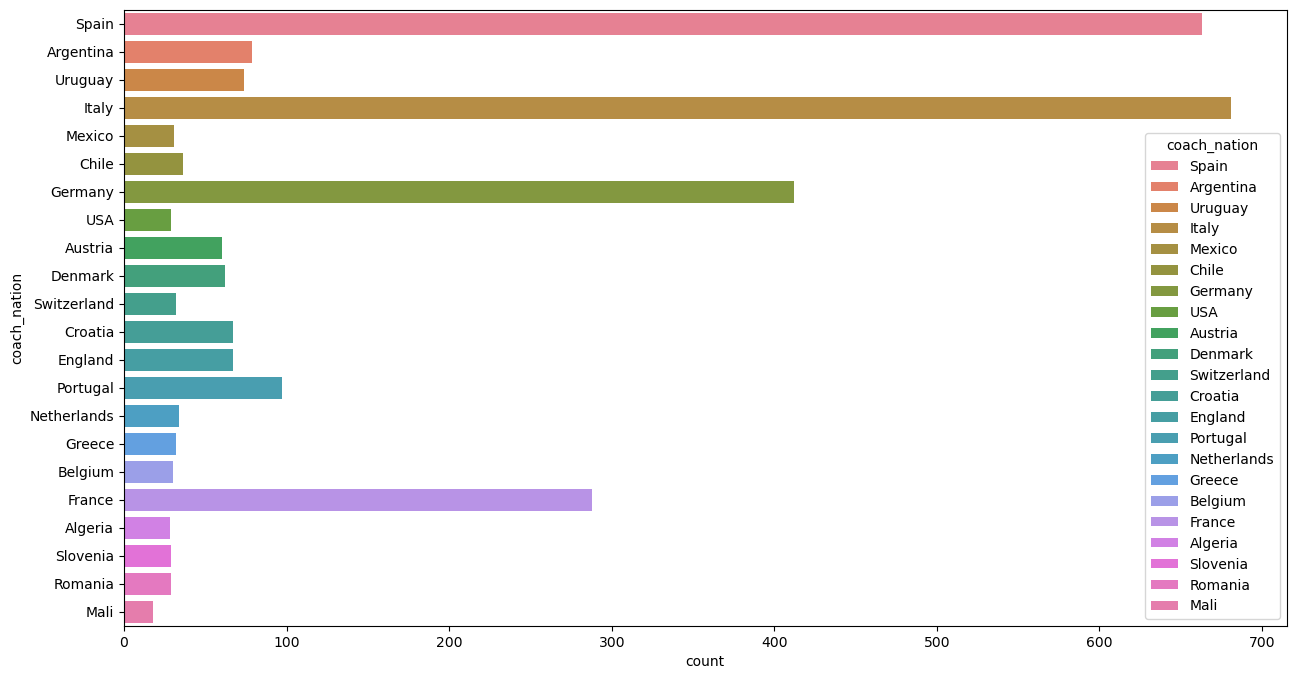

In [166]:
plt.figure(figsize=(15,8))
sns.countplot(data=df_teams_all,y="coach_nation",hue="coach_nation");

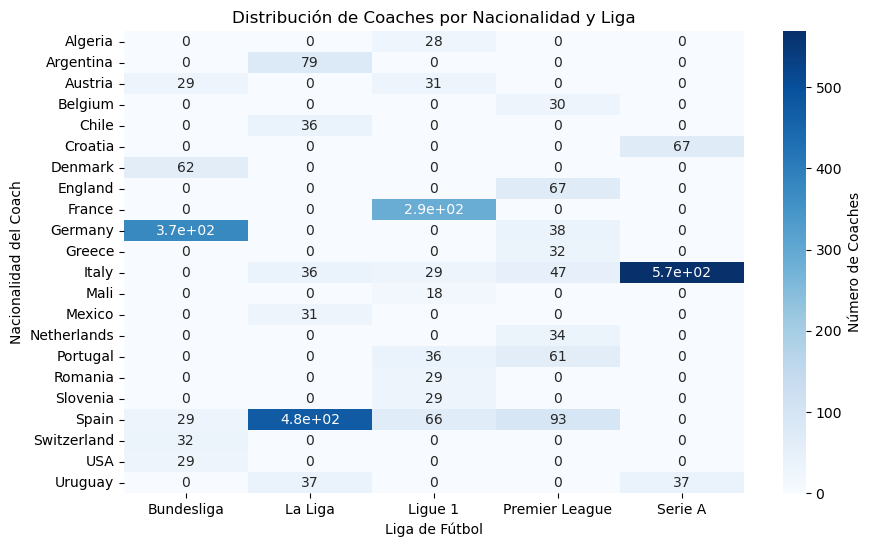

In [167]:
tabla_frecuencia_coach = pd.crosstab(df_teams_all['coach_nation'], df_teams_all['league'])
plt.figure(figsize=(10, 6))
sns.heatmap(tabla_frecuencia_coach, 
            annot=True,     # Muestra el conteo en el cuadro
            cmap="Blues",   # Escala de azules
            cbar_kws={'label': 'Número de Coaches'})

plt.title('Distribución de Coaches por Nacionalidad y Liga')
plt.ylabel('Nacionalidad del Coach')
plt.xlabel('Liga de Fútbol');

In [178]:
df_premier_league=df_teams_all.loc[df_teams_all["league"]=="Premier League"].copy()
premier_league=df_premier_league["player_nation"].value_counts().reset_index().head(15)

df_laLiga=df_teams_all.loc[df_teams_all["league"]=="La Liga"].copy()
laLiga=df_laLiga["player_nation"].value_counts().reset_index().head(15)

df_ligue1=df_teams_all.loc[df_teams_all["league"]=="Ligue 1"].copy()
ligue1=df_ligue1["player_nation"].value_counts().reset_index().head(15)

df_bundesliga=df_teams_all.loc[df_teams_all["league"]=="Bundesliga"].copy()
bundesliga=df_bundesliga["player_nation"].value_counts().reset_index().head(15)

df_serieA=df_teams_all.loc[df_teams_all["league"]=="Serie A"].copy()
serieA=df_serieA["player_nation"].value_counts().reset_index().head(15)

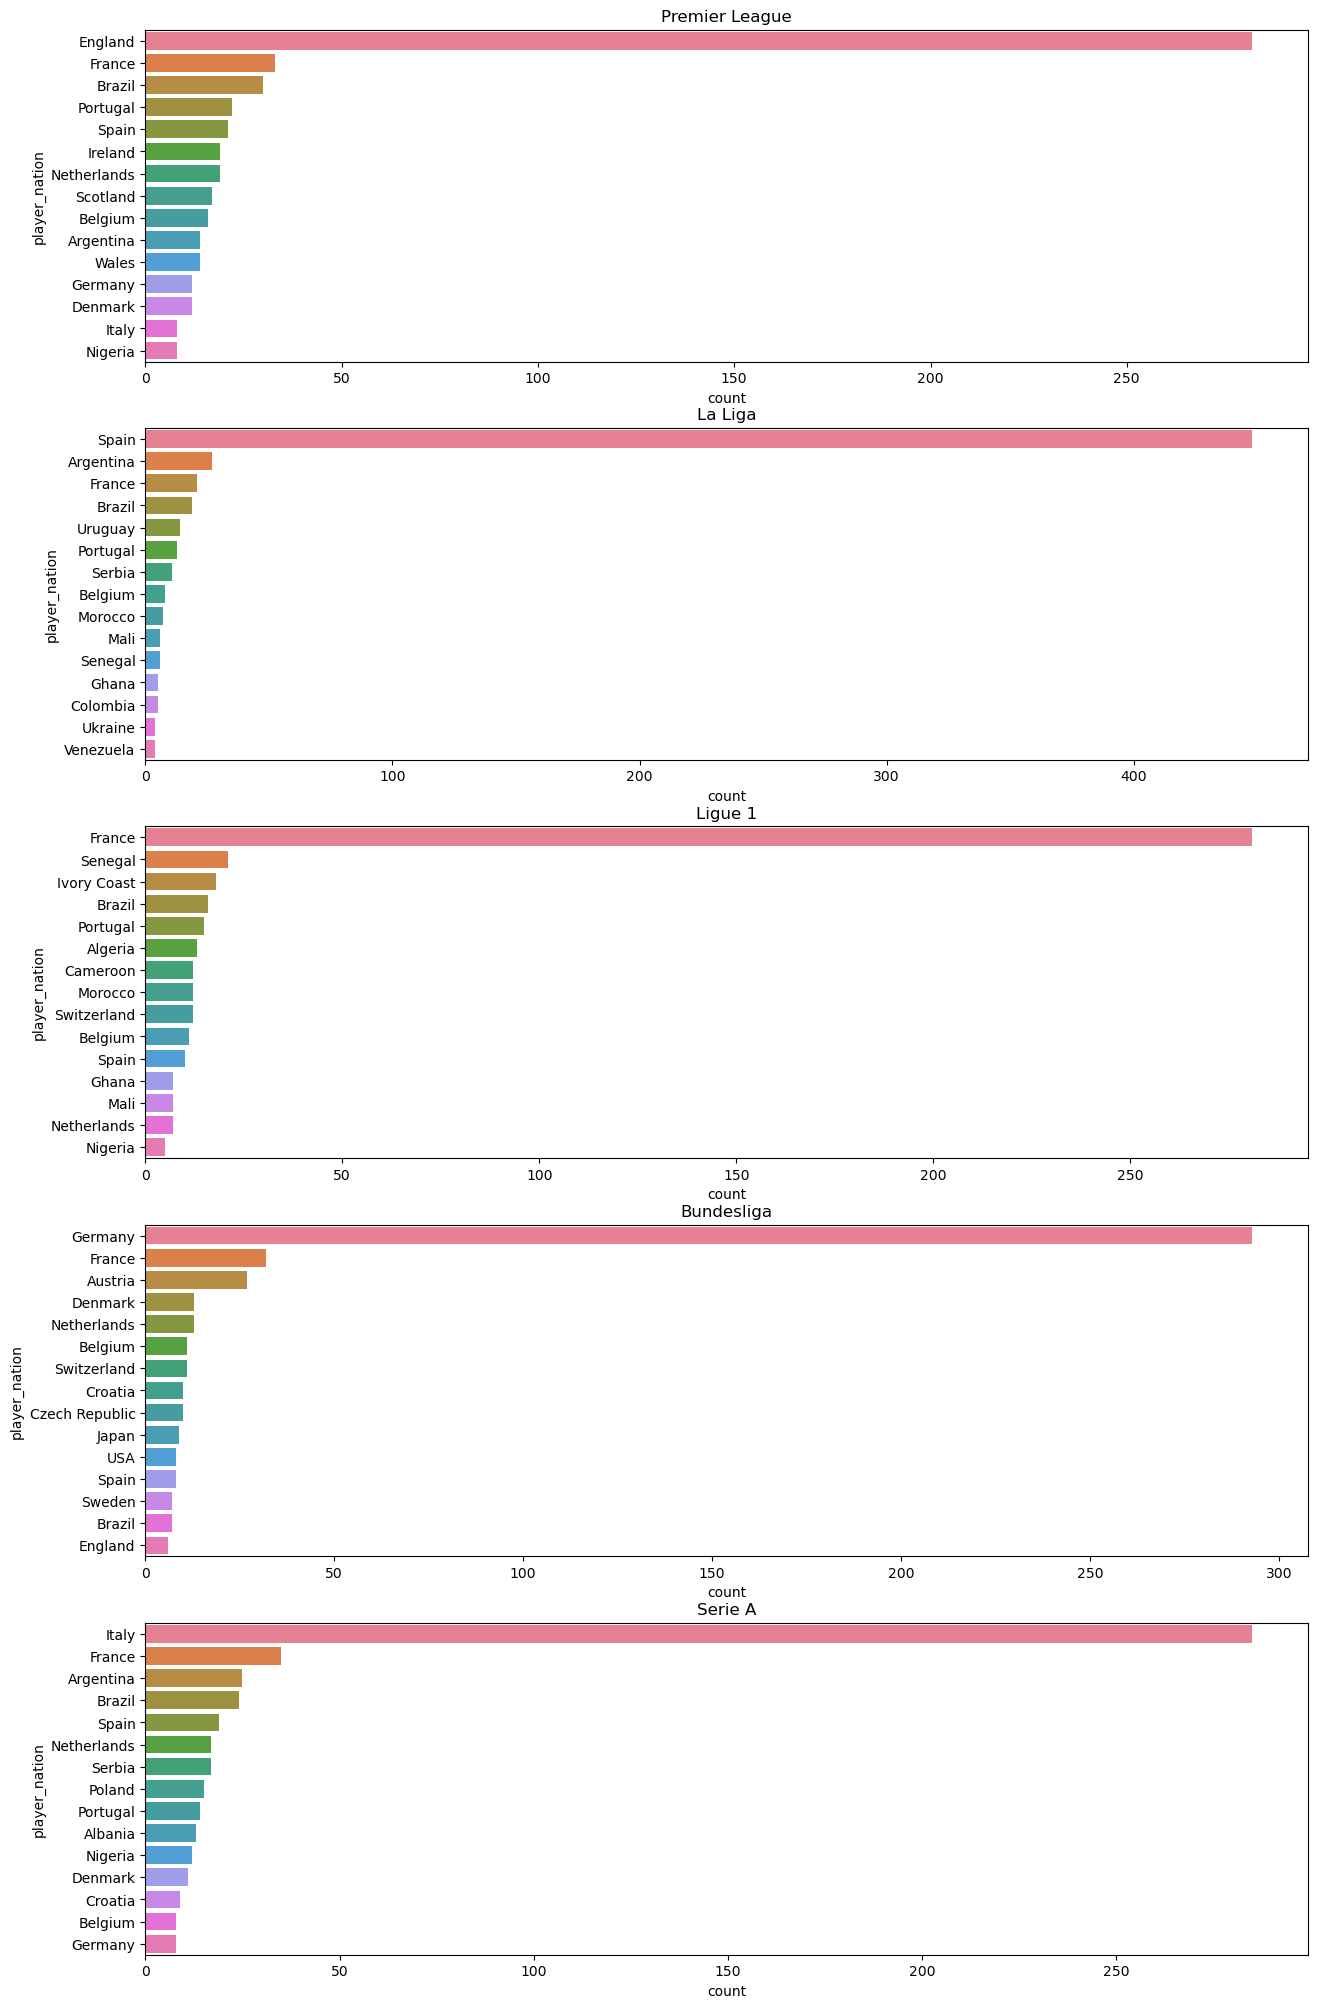

In [183]:
fig,ax=plt.subplots(nrows=5,ncols=1,figsize=(15,25))
ax1=ax[0];ax2=ax[1];ax3=ax[2];ax4=ax[3];ax5=ax[4]

ax1.set_title("Premier League")
sns.barplot(data=premier_league,y="player_nation",x="count",hue="player_nation",ax=ax1)

ax2.set_title("La Liga")
sns.barplot(data=laLiga,y="player_nation",x="count",hue="player_nation",ax=ax2)

ax3.set_title("Ligue 1")
sns.barplot(data=ligue1,y="player_nation",x="count",hue="player_nation",ax=ax3)

ax4.set_title("Bundesliga")
sns.barplot(data=bundesliga,y="player_nation",x="count",hue="player_nation",ax=ax4)

ax5.set_title("Serie A")
sns.barplot(data=serieA,y="player_nation",x="count",hue="player_nation",ax=ax5);


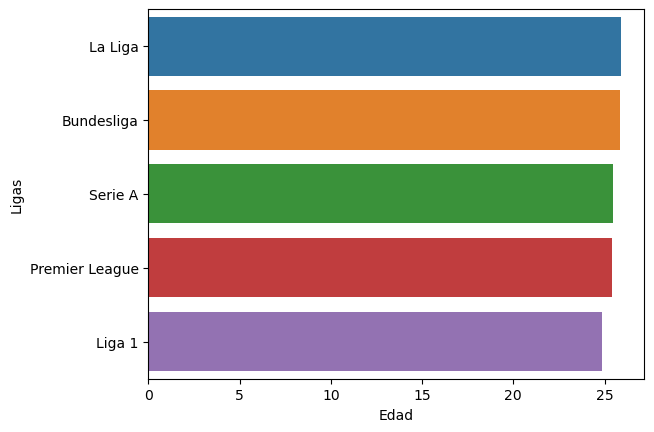

In [191]:
edades=pd.DataFrame({"Ligas":["Premier League","La Liga","Liga 1","Bundesliga","Serie A"],
                     "Edad":[(2024-(df_premier_league["date_of_birth"].dt.year.mean())),(2024-(df_laLiga["date_of_birth"].dt.year.mean())),(2024-(df_ligue1["date_of_birth"].dt.year.mean())),(2024-(df_bundesliga["date_of_birth"].dt.year.mean())),(2024-(df_serieA["date_of_birth"].dt.year.mean()))]})
edades.sort_values(by="Edad",ascending=False,inplace=True)
sns.barplot(data=edades,y="Ligas",x="Edad",hue="Ligas");